# **_CRYSTALS_** (**_CRYptographic SuiTe for Algebraic LatticeS_**): <br> &nbsp;&#x2022; **_Kyber_** (Study and Analysis)
***
***

## Introduction
***

<div style="text-align: justify;">
    <b><i>CRYSTALS-Kyber</i></b> is a <b>(classical) post-quantum asymmetric cryptosystem</b> included in the <b><i>CRYptographic SuiTe for Algebraic LatticeS (CRYSTALS)</i></b>, which is designed to be <b>quantum-resistant</b> to future cryptanalytic attacks performed by future powerful quantum computers, ensuring security in the classical contexts as well. This cryptographic primitive uses a variant of the <b>Learning With Errors (LWE) problem</b> on lattice algebraic structures as its primary trapdoor function. Namely, this asymmetric cryptosystem won the first spot in the <b><i>National Institute of Standards and Technology (NIST)</i></b>'s <b>Post-Quantum Cryptography Standardization project</b> and is already selected as a new standard to replace the currently used (classical) pre-quantum asymmetric cryptosystems that are vulnerable to attacks performed by quantum computers in the future.
</div>

TODO: Insert CRYSTALS-Kyber Logo

<div style="text-align: justify;">
    The design of the primitive <b><i>CRYSTALS-Kyber Cryptosystem</i></b> has its roots inspired by the <b>LWE-based Asymmetric Cryptosystem</b> previously proposed by Oded Regev in 2005. Namely, we can improve the practical efficiency of such cryptosystems by employing the same probability distribution used for the noise to build a secret (i.e., a private key) and using a square matrix rather than a rectangular one as the public key. Another improvement is to use polynomial rings rather than integer numbers, as originally used in the <b><i>Number Theorists 'R' Us (NTRU) Cryptosystem</i></b>, to define the <b>Ring-Learning With Errors (RLWE)</b> and <b>Module-Learning With Errors (MLWE)</b> <b>mathematical problems</b>. From these two main ideas, we build <b><i>CRYSTALS-Kyber Cryptosystem</i></b> as having its computational hardness assumption based on the <b>MLWE problem</b>. Since from the <b><i>CRYSTALS-Kyber Cryptosystem</i></b>, we construct the <b>INDistinguishable under Chosen Ciphertext Attack (IND-CCA) Key Encapsulation Method/Mechanism (KEM)</b> on top of the <b>INDistinguishable under Chosen Plaintext Attack (IND-CPA)</b> asymmetric encryption algorithm, the formal definition of the latter will come in the first place.
</div>

***

## Background
***

### Impact of Quantum Computing on Cryptography

#### Cryptography in the Post-Quantum Era

#### NIST (Classical) Post-Quantum Standardization Project

### Lattice-based Cryptography

#### What is a Lattice?

#### Lattice-based Problems

#### Algorithms for Lattice-based Problems

***

## Formal Definitions
***

### LWE Cryptosystem

### _CRYSTALS-Kyber_ IND-CPA Asymmetric Encryption Algorithm

<div style="text-align: justify;">
    Let $k$, ${d}_{t}$, ${d}_{u}$, and ${d}_{v}$ be positive integer parameters, and recall that $n = 256$. Additionally, let $\mathcal{M} = { \{0, 1\} }^{n} = { \{0, 1\} }^{256}$ denote the messages space, where every message $m \in \mathcal{M}$ can be viewed as a polynomial in the algebraic ring $\mathcal{R}$ with binary coefficients (i.e., in $\{0, 1\}$). Now, consider the public-key asymmetric encryption/decryption algorithm denoted by the abstract triplet ${\texttt{CRYSTALS}}_{\texttt{Kyber.Asym}\_\texttt{Enc}} = \big(\texttt{Key}\_\texttt{Gen},\ \texttt{Enc},\ \texttt{Dec}\big)$. Here, the ciphertexts are of the form $ct = (u, v) \in \big( { \{ 0, 1 \} }^{ ( n \cdot k \cdot {d}_{u} ) } \times { \{ 0, 1 \} }^{ ( n \cdot {d}_{v} ) } \big)$. Then, in order to properly define the ${\texttt{CRYSTALS}}_{\texttt{Kyber}}$ asymmetric encryption/decryption algorithm $\texttt{Asym}\_\texttt{Enc}$, the sub-routines $\texttt{Key}\_\texttt{Gen}$, $\texttt{Enc}$, and $\texttt{Dec}$ are defined as follows:

### _CRYSTALS-Kyber_ IND-CCA KEM

<div style="text-align: justify;">
    First, let $G: { \{ 0, 1 \} }^{*} \mapsto { \{ 0, 1 \} }^{ ( 2\ \times\ n ) } = { \{ 0, 1 \} }^{ ( 2\ \times\ 256 ) } = { \{ 0, 1 \} }^{ 512 }$ and $H: { \{ 0, 1 \} }^{*} \mapsto { \{ 0, 1 \} }^{ n } = { \{ 0, 1 \} }^{ 256 }$ be cryptographic hash functions. Then, consider the public-key asymmetric KEM denoted by the triplet $\texttt{CRYSTALS}_{\texttt{Kyber.KEM}} = \big(\texttt{Key}\_\texttt{Gen},\ \texttt{Encaps},\ \texttt{Decaps}\big)$, where $\texttt{Key}\_\texttt{Gen}$ is very similar to the sub-routine defined previously in ${\texttt{CRYSTALS}}_{\texttt{Kyber.Asym}\_\texttt{Enc}}$, with the difference that ${k}_{priv}$ also contains ${k}_{pub} = (t, \rho)$ and a secret random (i.e., a nonce or a seed) value $z$ with $n = 256$ bits as well. We obtain this asymmetric KEM ${\texttt{CRYSTALS}}_{\texttt{Kyber.KEM}}$ algorithm by applying a KEM variant with "implicit rejection" of the Fujisaki-Okamoto transform to the ${\texttt{CRYSTALS}}_{\texttt{Kyber.Asym}\_\texttt{Enc}}$ algorithm. The sub-routine ${\texttt{CRYSTALS}}_{\texttt{Kyber.KEM.Decaps}}$ never returns $\bot$ (i.e., <i>absurdum</i>). Instead, in the case of re-encryption failure, a pseudo-random key $K$ := $H(z, ct)$ is returned, where $z$ is a random secret seed. Then, in order to properly define the ${\texttt{CRYSTALS}}_{\texttt{Kyber}}$ KEM algorithm $\texttt{KEM}$, the sub-routines ${\texttt{Key}}\_{\texttt{Gen}}$, $\texttt{Encaps}$, and $\texttt{Decaps}$ are defined as follows:

***

## Demonstration of the CRYSTALS-Kyber Cryptosystem,<br>using Bouncy Castle library (version 1.73) for Java
***

### Environment setup for the Bouncy Castle Crypto library (version 1.73) for Java

In [1]:
// Empty comment just to initialize
// Javalin rendering plugin from SOS Notebook.

2023-08-21 17:38:12:886 +0100 [Thread-0] INFO  log - Logging initialized @762ms to org.eclipse.jetty.util.log.Slf4jLog
2023-08-21 17:38:12:906 +0100 [Thread-0] INFO  Javalin - Starting Javalin ...
2023-08-21 17:38:12:950 +0100 [Thread-0] INFO  Server - jetty-9.4.9.v20180320; built: 2018-03-20T12:21:10Z; git: 1f8159b1e4a42d3f79997021ea1609f2fbac6de5; jvm 1.8.0_121-b15
2023-08-21 17:38:12:969 +0100 [Thread-0] INFO  session - DefaultSessionIdManager workerName=node0
2023-08-21 17:38:12:969 +0100 [Thread-0] INFO  session - No SessionScavenger set, using defaults
2023-08-21 17:38:12:970 +0100 [Thread-0] INFO  session - Scavenging every 600000ms
2023-08-21 17:38:12:974 +0100 [Thread-0] INFO  ContextHandler - Started i.j.e.j.start$httpHandler$1@726abd43{/,null,AVAILABLE}
2023-08-21 17:38:12:988 +0100 [Thread-0] INFO  ContextHandler - Started o.e.j.s.ServletContextHandler@5f5b1b94{/,null,AVAILABLE}
2023-08-21 17:38:12:992 +0100 [Thread-0] INFO  AbstractConnector - Started ServerConnector@7dc49

null

In [2]:
// Import of the JAR file for the basic resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-jdk18on-173.jar

In [3]:
// Import of the JAR file for the extension resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-ext-jdk18on-173.jar

***

### Demonstration for the extraction of Execution and Security Parameter Sets<br>for the CRYSTALS-Kyber Cryptosystem

In [4]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.SecretWithEncapsulation;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the use of
// Key Encapsulation Methods/Mechanisms (KEMs).
import org.bouncycastle.jcajce.SecretKeyWithEncapsulation;
import org.bouncycastle.jcajce.spec.KEMExtractSpec;
import org.bouncycastle.jcajce.spec.KEMGenerateSpec;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber
// Public-Key Cryptosystem's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.KyberParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber Cryptosystem.
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPublicKeyParameters;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of the class of the cryptographic engine's parameters
// for the Public-Key (Asymmetric) Cryptosystem CRYSTALS-Kyber
// (CRYptographic SuiTe for Algebraic LatticeS - Kyber),
// which is a (Classical) Post-Quantum Cryptosystem
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class KyberEngineParams {
    
    // Definition of all the required constant values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the maximum degree n of
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_n = 256;
    
    // Definition of the numeric modulus q for
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_q = 3329;
    
    // Definition of the numeric inverse of modulus q
    // for the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_q_inv = 62209;

    // Definition of the compression factor d_t
    // to reduce/compress the size of the asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int compression_asymmetric_keys_factor_d_t = 12;
    
    // Definition of the numeric noise factor eta_2
    // used for the random error vectors e_1 and e_2 extracted
    // from a (Centered) Binomial Probability Distribution,
    // applied during the asymmetric encryption and generation of
    // the KEM (Key Encapsulation Method/Mechanism) procedures
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int param_eta_2 = 2;

    // Definition of the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int num_symmetric_bytes = 32;
    
    // Definition of the size of the symmetric
    // shared secret, in terms of bytes, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int num_shared_secret_bytes = 32;
    
    // Definition of the size a polynomial, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final static int num_polynomial_bytes = 
            ( ( compression_asymmetric_keys_factor_d_t * param_n ) / 
              BYTE_SIZE_IN_BITS );

    // Definition of the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final static int num_ind_cpa_message_bytes = 32;


    // Definition of all the required variable values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int param_k;
    
    // Definition of the size, in terms of bytes,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_polynomial_compressed_bytes;
    
    // Definition of the size, in terms of bytes,
    // of a polynomials vector in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_polynomials_vector_bytes;
    
    // Definition of the size, in terms of bytes,
    // of a polynomials vector compressed in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_polynomials_vector_compressed_bytes;
    
    // Definition of the numeric noise factor eta_1
    // used in the secret random coins vector r
    // extracted from a Binomial Probability Distribution,
    // dependent on the public key k_pub, and also
    // used for the error vector e and secret vector s,
    // regarding the polynomials representing a lattice
    // algebraic structure for the mathematical equation
    // A x s + e = t), representing a lattice-based problem in
    // the form of a MLWE (Module-Learning With Errors), to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int param_eta_1;
    
    // Definition of the compression factor d_u
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int compression_asymmetric_encryption_factor_d_u;

    // Definition of the compression factor d_v
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int compression_asymmetric_encryption_factor_d_v;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    private final int num_ind_cpa_public_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    private final int num_ind_cpa_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    private final int num_ind_cpa_polynomial_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    private final int num_ind_cca_kem_public_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    private final int num_ind_cca_kem_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    private final int num_ind_cca_kem_ciphertext_bytes;
    
    // Definition of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private final int num_session_key_bytes;
    
    
    // Constructors of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Constructor of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem,
    // and the initialization of the initial required parameters.
    //    Parameters:
    //    @param param_k: The number of polynomials k
    //                    per vector used in the matrix A
    //                    representing the lattice algebraic
    //                    structure, representing as well,
    //                    the size factor for that same
    //                    lattice algebraic structure.
    public KyberEngineParams( int param_k ) {

        // Setting of the number of polynomials k
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.param_k = param_k;
    
        
        // Setting a switch-case code block for all the possible values
        // for the number of polynomials k per vector used in the matrix A,
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        switch( this.param_k ) {
        
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is set as 2.
            case 2:
                
                // Setting of the numeric noise factor eta_1
                // used in the secret random coins vector r
                // extracted from a Binomial Probability Distribution,
                // dependent on the public key k_pub, and also
                // used for the error vector e and secret vector s,
                // regarding the polynomials representing a lattice
                // algebraic structure for the mathematical equation
                // A x s + e = t), representing a lattice-based problem in
                // the form of a MLWE (Module-Learning With Errors), to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.param_eta_1 = 3;
                
                // Setting of the compression factor d_u
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_u = 10;

                // Setting of the compression factor d_v
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_v = 4;
                
                // Setting of the size of the symmetric session key, in terms of bytes,
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.num_session_key_bytes = 16;
                
                // Breaking of the case code block.
                break;
            
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is set as 3.
            case 3:
                
                // Setting of the numeric noise factor eta_1
                // used in the secret random coins vector r
                // extracted from a Binomial Probability Distribution,
                // dependent on the public key k_pub, and also
                // used for the error vector e and secret vector s,
                // regarding the polynomials representing a lattice
                // algebraic structure for the mathematical equation
                // A x s + e = t), representing a lattice-based problem in
                // the form of a MLWE (Module-Learning With Errors), to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.param_eta_1 = 2;
                
                // Setting of the compression factor d_u
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_u = 10;

                // Setting of the compression factor d_v
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_v = 4;
                
                // Setting of the size of the symmetric session key, in terms of bytes,
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.num_session_key_bytes = 24;
                
                // Breaking of the case code block.
                break;
            
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is set as 4.
            case 4:
                
                // Setting of the numeric noise factor eta_1
                // used in the secret random coins vector r
                // extracted from a Binomial Probability Distribution,
                // dependent on the public key k_pub, and also
                // used for the error vector e and secret vector s,
                // regarding the polynomials representing a lattice
                // algebraic structure for the mathematical equation
                // A x s + e = t), representing a lattice-based problem in
                // the form of a MLWE (Module-Learning With Errors), to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.param_eta_1 = 2;
                
                // Setting of the compression factor d_u
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_u = 11;

                // Setting of the compression factor d_v
                // to reduce/compress the size of the ciphertext
                // generated from the asymmetric encryption and to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.compression_asymmetric_encryption_factor_d_v = 5;
                
                // Setting of the size of the symmetric session key, in terms of bytes,
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.num_session_key_bytes = 32;
                
                // Breaking of the case code block.
                break;
            
            // If the number of polynomials k per vector used in the matrix A,
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, has an invalid value.
            default:
                
                // Throwing of an IllegalArgumentException, regarding an invalid value
                // for the number of polynomials k per vector used in the matrix A,
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                throw new IllegalArgumentException("Error: k=" + this.param_k + " " +
                                                   "is not supported for CRYSTALS-Kyber (Asymmetric) " +
                                                   "Public-Key Cryptosystem!");
        
        }
        
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of a polynomial compressed in an array of bytes, to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.num_polynomial_compressed_bytes = 
            ( ( this.compression_asymmetric_encryption_factor_d_v * 
                this.param_k * this.param_n ) / BYTE_SIZE_IN_BITS );
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of a polynomials vector in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.num_polynomials_vector_bytes = 
            ( this.param_k * this.num_polynomial_bytes );
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of a polynomials vector compressed in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.num_polynomials_vector_compressed_bytes = 
            ( ( this.compression_asymmetric_encryption_factor_d_u * 
                this.param_k * this.param_n ) / BYTE_SIZE_IN_BITS );
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric public key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        this.num_ind_cpa_public_key_bytes = 
            ( this.num_polynomials_vector_bytes + this.num_symmetric_bytes );
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric private key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        this.num_ind_cpa_secret_key_bytes = this.num_polynomials_vector_bytes;
        
        // (Calculation) and setting of the size, in terms of bytes,
        // of the numeric polynomial, which is related to the asymmetric
        // encryption to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        this.num_ind_cpa_polynomial_bytes = 
            ( this.num_polynomials_vector_compressed_bytes + 
              this.num_polynomial_compressed_bytes );

        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric public key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability under
        // adaptive Chosen Ciphertext Attack) property.
        this.num_ind_cca_kem_public_key_bytes = this.num_ind_cpa_public_key_bytes;
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the asymmetric private key
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability under
        // adaptive Chosen Ciphertext Attack) property.
        this.num_ind_cca_kem_secret_key_bytes = 
            ( this.num_ind_cpa_secret_key_bytes + this.num_ind_cpa_public_key_bytes + 
              ( 2 * this.num_symmetric_bytes ) );
        
        // (Calculation) and setting of the size,
        // in terms of bytes, of the ciphertext generated
        // and to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability under
        // adaptive Chosen Ciphertext Attack) property.
        this.num_ind_cca_kem_ciphertext_bytes = this.num_ind_cpa_polynomial_bytes;
    
    }
    
    
    // Methods of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Method to obtain the maximum degree n of
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_n() {
        
        // Return of the maximum degree n of
        // the polynomials used in the matrix A representing
        // the lattice algebraic structure to be adopted for
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_n;
        
    }
    
    // Method to obtain the numeric modulus q for
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_q() {
        
        // Return of the numeric modulus q for
        // the polynomials used in the matrix A representing
        // the lattice algebraic structure to be adopted for
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_q;
        
    }
    
    // Method to obtain the numeric inverse of modulus q
    // for the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_q_inv() {
        
        // Return of the numeric inverse of modulus q
        // for the polynomials used in the matrix A representing
        // the lattice algebraic structure to be adopted for
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_q_inv;
        
    }
    
    // Method to obtain the compression factor d_t
    // to reduce/compress the size of the asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_compression_asymmetric_keys_factor_d_t() {
        
        // Return of the compression factor d_t
        // to reduce/compress the size of the asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.compression_asymmetric_keys_factor_d_t;
        
    }
    
    // Method to obtain the numeric noise factor eta_1
    // used in the secret random coins vector r
    // extracted from a Binomial Probability Distribution,
    // dependent on the public key k_pub, and also
    // used for the error vector e and secret vector s,
    // regarding the polynomials representing a lattice
    // algebraic structure for the mathematical equation
    // A x s + e = t), representing a lattice-based problem in
    // the form of a MLWE (Module-Learning With Errors), to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_eta_1() {
        
        // Return of the numeric noise factor eta_1
        // used in the secret random coins vector r
        // extracted from a Binomial Probability Distribution,
        // dependent on the public key k_pub, and also
        // used for the error vector e and secret vector s,
        // regarding the polynomials representing a lattice
        // algebraic structure for the mathematical equation
        // A x s + e = t), representing a lattice-based problem in
        // the form of a MLWE (Module-Learning With Errors), to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_eta_1;
        
    }

    // Method to obtain the numeric noise factor eta_2
    // used for the random error vectors e_1 and e_2 extracted
    // from a (Centered) Binomial Probability Distribution,
    // applied during the asymmetric encryption and generation of
    // the KEM (Key Encapsulation Method/Mechanism) procedures
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_eta_2() {
        
        // Return of the numeric noise factor eta_2
        // used for the random error vectors e_1 and e_2 extracted
        // from a (Centered) Binomial Probability Distribution,
        // applied during the asymmetric encryption and generation of
        // the KEM (Key Encapsulation Method/Mechanism) procedures
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_eta_2;
        
    }
    
    // Method to obtain the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_symmetric_bytes() {
        
        // Return of the size of the symmetric
        // hashes and (pseudo) random seeds, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_symmetric_bytes;
        
    }
    
    // Method to obtain the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_symmetric_bits() {
        
        // Return of the size of the symmetric
        // hashes and (pseudo) random seeds, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_symmetric_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size of the symmetric
    // shared secret, in terms of bytes, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_shared_secret_bytes() {
        
        // Return of the size of the symmetric
        // shared secret, in terms of bytes, to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_shared_secret_bytes;
        
    }
    
    // Method to obtain the size of the symmetric
    // shared secret, in terms of bits, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_shared_secret_bits() {
        
        // Return of the size of the symmetric
        // shared secret, in terms of bits, to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_shared_secret_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size a polynomial, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_bytes() {
        
        // Return of the size a polynomial, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomial_bytes;
        
    }
    
    // Method to obtain the size a polynomial, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_bits() {
        
        // Return of the size a polynomial, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_polynomial_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_ind_cpa_message_bytes() {
        
        // Return of the size of an IND-CPA (INDistinguishable
        // under Chosen Plaintext Attack) message, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_ind_cpa_message_bytes;
        
    }
    
    // Method to obtain the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_ind_cpa_message_bits() {
        
        // Return of the size of an IND-CPA (INDistinguishable
        // under Chosen Plaintext Attack) message, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_ind_cpa_message_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing
    // as well, the size factor for that same lattice
    // algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security
    // strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_param_k() {
        
        // Return of the number of polynomials k
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing
        // as well, the size factor for that same lattice
        // algebraic structure, and thus, being the main
        // security parameter in terms of scaling the security
        // strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.param_k;
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_compressed_bytes() {
        
        // Return of the size, in terms of bytes,
        // of a polynomial compressed in an array of bytes, to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomial_compressed_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomial_compressed_bits() {
        
        // Return of the size, in terms of bits,
        // of a polynomial compressed in an array of bytes, to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.num_polynomial_compressed_bytes *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of a polynomials vector in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomials_vector_bytes() {
        
        // Return of the size, in terms of bytes,
        // of a polynomials vector in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomials_vector_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of a polynomials vector in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_polynomials_vector_bits() {
        
        // Return of the size, in terms of bits,
        // of a polynomials vector in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_polynomials_vector_bytes() * 
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of a polynomials vector compressed in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_num_polynomials_vector_compressed_bytes() {
        
        // Return of the size, in terms of bytes,
        // of a polynomials vector compressed in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_polynomials_vector_compressed_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of a polynomials vector compressed in a matrix of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_num_polynomials_vector_compressed_bits() {
        
        // Return of the size, in terms of bits,
        // of a polynomials vector compressed in a matrix of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_polynomials_vector_compressed_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the compression factor d_u
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_compression_asymmetric_encryption_factor_d_u() {
        
        // Return of the compression factor d_u
        // to reduce/compress the size of the ciphertext
        // generated from the asymmetric encryption and to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.compression_asymmetric_encryption_factor_d_u;
        
    }

    // Method to obtain the compression factor d_v
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_compression_asymmetric_encryption_factor_d_v() {
        
        // Return of the compression factor d_v
        // to reduce/compress the size of the ciphertext
        // generated from the asymmetric encryption and to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.compression_asymmetric_encryption_factor_d_v;
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_public_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return this.num_ind_cpa_public_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_public_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return ( this.get_num_ind_cpa_public_key_bytes() * 
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_secret_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return this.num_ind_cpa_secret_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_secret_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return ( this.num_ind_cpa_secret_key_bytes * 
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_polynomial_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the numeric polynomial, which is related to
        // the asymmetric encryption to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return this.num_ind_cpa_polynomial_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    public int get_num_ind_cpa_polynomial_bits() {
        
        // Return of the size, in terms of bits,
        // of the numeric polynomial, which is related to
        // the asymmetric encryption to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property.
        return ( this.get_num_ind_cpa_polynomial_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_public_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return this.num_ind_cca_kem_public_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_public_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric public key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return ( this.get_num_ind_cca_kem_public_key_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_secret_key_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return this.num_ind_cca_kem_secret_key_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_secret_key_bits() {
        
        // Return of the size, in terms of bits,
        // of the asymmetric private key to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return ( this.get_num_ind_cca_kem_secret_key_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_ciphertext_bytes() {
        
        // Return of the size, in terms of bytes,
        // of the ciphertext generated and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return this.num_ind_cca_kem_ciphertext_bytes;
        
    }
    
    // Method to obtain the size, in terms of bits,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    public int get_num_ind_cca_kem_ciphertext_bits() {
        
        // Return of the size, in terms of bits,
        // of the ciphertext generated and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // KEM (Key Encapsulation Method/Mechanism)
        // with the IND-CCA2 (INDistinguishability
        // under adaptive Chosen Ciphertext Attack) property.
        return ( this.get_num_ind_cca_kem_ciphertext_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_session_key_bytes() {
        
        // Return of the size of the symmetric session key, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.num_session_key_bytes;
        
    }
    
    // Method to obtain the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_num_session_key_bits() {
        
        // Return of the size of the symmetric session key, in terms of bits,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return ( this.get_num_session_key_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
        
}


// Definition of class of Public-Key (Asymmetric) Cryptosystem
// CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber),
// which is a (Classical) Post-Quantum Cryptosystem
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsKyberCryptosystem {
    
    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[]
        security_parameters_names = {
    
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        "Kyber512",
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        "Kyber768",
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        "Kyber1024"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[] 
        security_parameters_names_and_descriptions = {
    
        // 1) Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-128).
        "=> Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 64 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 128 bits.\n\n   " +
        "             NOTE: The Kyber512 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).",
        
        // 2) Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-192).
        "=> Kyber768: Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 96 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 192 bits.\n\n   " +
        "             NOTE: The Kyber768 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-256).
        "=> Kyber1024: Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )\n   " +
        "              for the size of the lattice algebraic structure, which provides\n   " +
        "              a (post-quantum) security strength of 128 bits, designed for\n   " +
        "              the distribution of symmetric session keys of 256 bits.\n\n   " +
        "              NOTE: The Kyber1024 Cryptosystem has a NIST (Classical)\n   " +
        "                    Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final KyberParameterSpec[] 
        security_parameters_specifications = {
        
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        KyberParameterSpec.kyber512,
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        KyberParameterSpec.kyber768,
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        KyberParameterSpec.kyber1024
        
    };
    
    
    // Setting of the array of the parameters
    // regarding the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    public final int[] engine_k_parameters = {
        
        // 1) Parameter k=2 to build the 'Kyber512' Security Parameter Set
        //    as the parameter choice for the general parameters to be
        //    used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        2,
        
        // 2) Parameters k=3 to build the 'Kyber768' Security Parameter Set
        //    as the parameter choice for the general parameters to be
        //    used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        3,
        
        // 3) Parameters k=4 to build the 'Kyber1024' Security Parameter Set
        //    as the parameter choice for the general parameters to be
        //    used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        4
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the parameter choice index for
    // the generation of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private short parameter_choice_index;
    
    // Definition of the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberParameters parameters;
    
    // Definition of the cryptographic engine's parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberEngineParams engine_parameters;
    
    // Definition of the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the generation of
    // the instance of the Key Pair to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
            
    
    
    // Constructor of the class of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // and the initialization of the initial required parameters.
    //    Parameters:
    //    @param parameter_choice_index: The parameter choice index for
    //                                   the generation of the pair of
    //                                   asymmetric keys to be used.
    public CrystalsKyberCryptosystem( short parameter_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_choice_index = parameter_choice_index;
        
        // Initialization of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.parameters = null;
        
        // Initialization of the cryptographic engine's parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.engine_parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.asymmetric_key_pair = null;
        
    }
    
    
    // Methods of the class of the Public-Key (Asymmetric) Cryptosystem
    // CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_choice_index() {
        
        // Return of the parameter choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names[ this.parameter_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name_and_description() {
        
        // Return of the string with the name and description of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names_and_descriptions[ this.parameter_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    public KyberParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Kyber Public-Key
        // Cryptosystem's Security Parameters Specifications.
        return security_parameters_specifications[ this.parameter_choice_index ];
        
    }
    
    
    // Method to obtain the parameter value regarding
    // the number of polynomials k per vector used in
    // the matrix A representing the lattice algebraic
    // structure, representing as well, the size factor
    // for that same lattice algebraic structure, and thus,
    // being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_engine_k_parameter() {
        
        // Return of the parameter value regarding
        // the number of polynomials k per vector used in
        // the matrix A representing the lattice algebraic
        // structure, representing as well, the size factor
        // for that same lattice algebraic structure, and thus,
        // being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Kyber Public-Key Cryptosystem.
        return engine_k_parameters[ this.parameter_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber512' Security Parameter Set.
        if( this.parameter_choice_index == 0 ) {
            
            // Setting the 'Kyber512' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber512;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber768' Security Parameter Set.
        else if( this.parameter_choice_index == 1 ) {
            
            // Setting the 'Kyber768' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber768;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber1024' Security Parameter Set.
        else if( this.parameter_choice_index == 2 ) {
            
            // Setting the 'Kyber1024' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber1024;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberParameters get_parameters() {
        
        // Return of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.parameters;
        
    }
    
    
    // Method to obtain the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bytes_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_session_key_bits_size() / 
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }
    
    
    // Method to obtain the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bits_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_parameters().getSessionKeySize();
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }
    
    
    // Method to initialize the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_engine_parameters() {
        
        // Retrieval of the parameters required to build
        // the CRYSTALS-Kyber Public-Key Cryptosystem's cryptographic engine.
        int kyber_engine_k_parameter = this.get_engine_k_parameter();

        // Initialization of the cryptographic engine's parameters
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.engine_parameters = 
            new KyberEngineParams( kyber_engine_k_parameter );
        
    }
        
    
    // Method to obtain the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberEngineParams get_engine_parameters() {
        
        // Return of the cryptographic engine's parameters
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.engine_parameters;
        
    }
    
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.key_generation_parameters = 
                new KyberKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be\
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        KyberKeyPairGenerator crystals_kyber_key_pair_generator = 
            new KyberKeyPairGenerator();

        // Initialization of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // using the Security Parameters set defined before.
        crystals_kyber_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.asymmetric_key_pair = 
            crystals_kyber_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the target/solution t
    // (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_target_solution_t_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getT();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the target/solution t
    // (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_target_solution_t_size_bytes_from_public_key_parameters() {
        
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_target_solution_t_from_public_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_target_solution_t_from_public_key_parameters().length;
        
        }
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the target/solution t
    // (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_target_solution_t_size_bits_from_public_key_parameters() {
        
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_target_solution_t_from_public_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_target_solution_t_size_bytes_from_public_key_parameters() * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the target/solution t
        // (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes,
        // representing a lattice-based problem in
        // the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getRho();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() {
        
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_pseudo_random_seed_rho_size_bits_from_public_key_parameters() {
        
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
        
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() * 
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and
        // obtained the uniformly-random matrix A consisting of
        // polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s + e = t), encoded in bytes,
        // representing a lattice-based problem in the form of a
        // MLWE (Module-Learning With Errors), retrieved from
        // the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( KyberPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated Security Parameters.
    public KyberPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build public key payload.

            // Retrieval of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 target_solution_t,
                                                 pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated encoding in an array of bytes.
    public KyberPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem.
    public KyberPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of public key of the cryptosystem.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_s_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getS();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_s_size_bytes_from_private_key_parameters() {
        
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_random_secret_s_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_random_secret_s_from_private_key_parameters().length;

        }
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_s_size_bits_from_private_key_parameters() {
        
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_random_secret_s_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_random_secret_s_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s
        // (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the hashed public key,
    // denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_hashed_public_key_h_pub_k_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getHPK();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the hashed public key, denoted as
    // H(pub_key), encoded in bytes, with
    // the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters() {
        
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_hashed_public_key_h_pub_k_from_private_key_parameters() != null ) {

            // Return of the size, in terms of bytes,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_hashed_public_key_h_pub_k_from_private_key_parameters().length;
        
        }
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid size, in terms of bytes,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the hashed public key, denoted as
    // H(pub_key), encoded in bytes, with
    // the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_hashed_public_key_h_pub_k_size_bits_from_private_key_parameters() {
        
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_hashed_public_key_h_pub_k_from_private_key_parameters() != null ) {

            // Return of the size, in terms of bits,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the hashed public key,
        // denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid size, in terms of bits,
            // of the hashed public key, denoted as
            // H(pub_key), encoded in bytes, with
            // the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_nonce_z_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getNonce();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size in terms of
    // bytes of the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_nonce_z_size_bytes_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {

            // Return of the size, in terms of bytes,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_random_secret_nonce_z_from_private_key_parameters().length;
    
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size in terms of
    // bits of the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_random_secret_nonce_z_size_bits_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
        
            // Return of the size, in terms of bits,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_random_secret_nonce_z_size_bytes_from_private_key_parameters() * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( KyberPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_private_key_size_bits() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of private key of the cryptosystem.
    public KyberPrivateKeyParameters get_private_key_payload() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined as a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build private key payload.

            // Retrieval of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes.
            byte[] random_secret_s = 
                this.get_random_secret_s_from_private_key_parameters();

            // Retrieval of the hashed public key,
            // denoted as H(pub_key), encoded in bytes.
            byte[] hashed_public_key_h_pub_k = 
                this.get_hashed_public_key_h_pub_k_from_private_key_parameters();

            // Retrieval of the random secret
            // nonce z (i.e., to avoid practical
            // fault attacks), encoded in bytes.
            byte[] random_secret_nonce_z = 
                this.get_random_secret_nonce_z_from_private_key_parameters();


            // Retrieval of the target/solution t
            // (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of the cryptosystem.
            return new KyberPrivateKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                  random_secret_s,
                                                  hashed_public_key_h_pub_k,
                                                  random_secret_nonce_z,
                                                  target_solution_t,
                                                  pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined as a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of
            // the cryptosystem, as a null object.
            return null;
            
        }
            
    }
    
}

// Setting of the number of parameter choices for
// the generation of the asymmetric key pair to be
// used internally by the CRYSTALS-Kyber Public-Key Cryptosystem.
final short NUM_PARAMETERS_SET_CHOICES = 3;

// Setting of the number of trials for the generation of
// the asymmetric key pairs to be used internally by
// the CRYSTALS-Kyber Public-Key Cryptosystem,
// in order to estimate the average time spent in it.
final short NUM_TRIALS_ASYMMETRIC_KEY_GENERATION = 10;

// Setting of the number of size metrics to be analysed
// from the CRYSTALS-Kyber Public-Key Cryptosystem.
final short NUM_SIZE_METRICS = 3;


// Setting of matrix of the time estimated metrics for each trial,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[][] crystals_kyber_cryptosystems_key_generation_times = 
    new double[NUM_PARAMETERS_SET_CHOICES][NUM_TRIALS_ASYMMETRIC_KEY_GENERATION];

// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems,
// considering possible outlier values.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers =
    new double[NUM_PARAMETERS_SET_CHOICES];
    
// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems,
// not considering possible outlier values.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers =
    new double[NUM_PARAMETERS_SET_CHOICES];

// Setting of the array of the standard deviation of
// the time estimated metrics for all trials, regarding
// the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[] crystals_kyber_cryptosystems_key_generation_std_times =
    new double[NUM_PARAMETERS_SET_CHOICES];
    

// Setting of the array of the upper bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_upper_bounds =
    new double[NUM_PARAMETERS_SET_CHOICES];

// Setting of the array of the lower bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
double[] crystals_kyber_cryptosystems_key_generation_avg_times_lower_bounds =
    new double[NUM_PARAMETERS_SET_CHOICES];


// Setting of the size metrics (keys and ciphertexts) to be analysed
// from all the configured CRYSTALS-Kyber Public-Key Cryptosystems.
int[][][] crystals_kyber_cryptosystems_sizes_metrics = 
    new int[NUM_PARAMETERS_SET_CHOICES][NUM_SIZE_METRICS][2];


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {

    // Creation of a CRYSTALS-Kyber Public-Key Cryptosystem,
    // using a set of security parameters pre-defined.
    CrystalsKyberCryptosystem crystals_kyber_cryptosystem = 
        new CrystalsKyberCryptosystem( param_set_choice_idx );


    // Retrieval of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    String crystals_kyber_security_parameters_name_and_description = 
        crystals_kyber_cryptosystem.get_security_parameters_name_and_description();


    // Retrieval of the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    KyberParameterSpec crystals_kyber_security_parameters_specification =
        crystals_kyber_cryptosystem.get_security_parameters_specifications();



    // Print of the relevant information for the use of
    // the CRYSTALS-Kyber Public-Key Cryptosystem.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of a possible
    // execution of the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println(" ---------------- EXAMPLE OF AN EXECUTION OF THE CRYSTALS-KYBER " + 
                                          "PUBLIC-KEY CRYPTOSYSTEM ---------------- ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulion Method/Mechanism (KEM).
    System.out.println( "  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_kyber_security_parameters_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_parameters();


    // Retrieval of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bytes_size = 
        crystals_kyber_cryptosystem.get_session_key_bytes_size();

    // Retrieval of the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bits_size = 
        crystals_kyber_cryptosystem.get_session_key_bits_size();

    // Print of the string with the size of
    // the Symmetric Session Key, in terms of bytes and bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of the Symmetric Session Secret Key to be generated and exchanged:\n" +
                        "       - " + crystals_kyber_cryptosystem_session_key_bytes_size + " bytes | " 
                                    + crystals_kyber_cryptosystem_session_key_bits_size + " bits" );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_engine_parameters();

    // Retrieval of the cryptographic engine's parameters
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    KyberEngineParams crystals_kyber_cryptosystem_engine_parameters = 
        crystals_kyber_cryptosystem.get_engine_parameters();


    // Retrieval of the number of polynomials k
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing
    // as well, the size factor for that same lattice
    // algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security
    // strength of the CRYSTALS-Kyber Public-Key Cryptosystem. 
    int param_k = crystals_kyber_cryptosystem_engine_parameters.get_param_k();

    // Retrieval of the maximum degree n of
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_n = crystals_kyber_cryptosystem_engine_parameters.get_param_n();

    // Retrieval of the numeric modulus q for
    // the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_q = crystals_kyber_cryptosystem_engine_parameters.get_param_q();

    // Retrieval of the numeric inverse of modulus q
    // for the polynomials used in the matrix A representing
    // the lattice algebraic structure to be adopted for
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_q_inv = crystals_kyber_cryptosystem_engine_parameters.get_param_q_inv();

    // Retrieval of the numeric noise factor eta_1
    // used in the secret random coins vector r
    // extracted from a Binomial Probability Distribution,
    // dependent on the public key k_pub, and also
    // used for the error vector e and secret vector s,
    // regarding the polynomials representing a lattice
    // algebraic structure for the mathematical equation
    // A x s + e = t), representing a lattice-based problem in
    // the form of a MLWE (Module-Learning With Errors), to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_eta_1 = crystals_kyber_cryptosystem_engine_parameters.get_param_eta_1();

    // Retrieval of the numeric noise factor eta_2
    // used for the random error vectors e_1 and e_2 extracted
    // from a (Centered) Binomial Probability Distribution,
    // applied during the asymmetric encryption and generation of
    // the KEM (Key Encapsulation Method/Mechanism) procedures
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int param_eta_2 = crystals_kyber_cryptosystem_engine_parameters.get_param_eta_2();

    // Retrieval of the compression factor d_t
    // to reduce/compress the size of the asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int compression_asymmetric_keys_factor_d_t = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_compression_asymmetric_keys_factor_d_t();

    // Retrieval of the compression factor d_u
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int compression_asymmetric_encryption_factor_d_u = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_compression_asymmetric_encryption_factor_d_u();

    // Retrieval of the compression factor d_v
    // to reduce/compress the size of the ciphertext
    // generated from the asymmetric encryption and to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int compression_asymmetric_encryption_factor_d_v = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_compression_asymmetric_encryption_factor_d_v();

    // Print of the string with the size of
    // the Security Parameter Set to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Security Parameter Set to be adopted:\n" +
                        "       - " + "k = " + param_k + " | " + "n = " + param_n + " | "
                                    + "q = " + param_q + " | " + "q⁻¹ = " + param_q_inv + " | "
                                    + "η₁ = " + param_eta_1 + " | " + "η₂ = " + param_eta_2 + "\n" +
                        "       - " + "dₜ = " + compression_asymmetric_keys_factor_d_t + " | "
                                    + "dᵤ = " + compression_asymmetric_encryption_factor_d_u + " | "
                                    + "dᵥ = " + compression_asymmetric_encryption_factor_d_v );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_symmetric_bytes = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_symmetric_bytes();

    // Retrieval of the size of the symmetric
    // hashes and (pseudo) random seeds, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_symmetric_bits = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_symmetric_bits();

    // Retrieval of the size of the symmetric
    // shared secret, in terms of bytes, to be used by,
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_shared_secret_bytes = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_shared_secret_bytes();

    // Retrieval of the size of the symmetric
    // shared secret, in terms of bits, to be used by,
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_shared_secret_bits = 
        crystals_kyber_cryptosystem_engine_parameters.get_num_shared_secret_bits();


    // Print of the string with the size of the Symmetric Hashes,
    // (Pseudo) Random Seeds, and Shared Secrets/Keys, in terms of
    // bytes and bits, to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of the Symmetric Hashes, (Pseudo) Random Seeds and\n" +
                        "       Shared Secrets/Keys to be generated and exchanged:\n" +
                        "       " + "- Symmetric Hashes and (Pseudo) Random Seeds: " 
                                  + num_symmetric_bytes + " bytes | " + num_symmetric_bits + " bits\n" +
                        "       " + "- Symmetric Shared Secret: " 
                                  + num_shared_secret_bytes + " bytes | " + num_shared_secret_bits + " bits ");

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of a polynomial, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_bytes =
        crystals_kyber_cryptosystem_engine_parameters.get_num_polynomial_bytes();

    // Retrieval of the size of a polynomial, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_bits =
        crystals_kyber_cryptosystem_engine_parameters.get_num_polynomial_bits();

    // Retrieval of the size, in terms of bytes,
    // of a polynomials vector in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_bytes();

    // Retrieval of the size, in terms of bits,
    // of a polynomials vector in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_bits();

    // Retrieval of the size, in terms of bytes,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_compressed_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomial_compressed_bytes();

    // Retrieval of the size, in terms of bits,
    // of a polynomial compressed in an array of bytes, to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomial_compressed_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomial_compressed_bits();

    // Retrieval of the size, in terms of bytes,
    // of a polynomials vector compressed in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_compressed_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_compressed_bytes();

    // Retrieval of the size, in terms of bits,
    // of a polynomials vector compressed in a matrix of bytes,
    // to used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_polynomials_vector_compressed_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_polynomials_vector_compressed_bits();


    // Print of the string with the size of a Polynomial X
    // and Matrix A (i.e., a vector of Polynomials X), in terms of 
    // bytes and bits, to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of a Polynomial X and Matrix A (i.e., a vector of Polynomials X):\n" +
                        "       " + "- Size of a Polynomial X: " 
                                  + num_polynomial_bytes + " bytes | " + num_polynomial_bits + " bits\n" +
                        "       " + "- Size of each variable/coefficient xⱼ of the Polynomial X,\n" +
                        "       " + "  with [ 0 ≤ j ≤ (n - 1) ]: "
                                  + "≈ " + (double) ( (double) num_polynomial_bytes / (double) param_n ) + " bytes | " 
                                  + ( num_polynomial_bits / param_n ) + " bits\n" +
                        "       " + "- Size of a vector composed of k Polynomials X\n" +
                        "       " + "  (i.e., a Matrix A with variables/coefficients A₍ᵢ,ⱼ₎)\n" +
                        "       " + "  for an algebraic linear system of equations,\n" +
                        "       " + "  with [ 1 ≤ i ≤ k ] ∧ [ 0 ≤ j ≤ (n - 1) ]: " 
                                  + num_polynomials_vector_bytes + " bytes | " + num_polynomials_vector_bits + " bits\n" +
                        "       " + "- Size of a compressed Polynomial X (scaled by the factor dᵥ): " 
                                  + num_polynomial_compressed_bytes + " bytes | " + num_polynomial_compressed_bits + " bits\n" +
                        "       " + "- Size of a compressed vector composed of k Polynomials X\n" +
                        "       " + "  (i.e., a Matrix A with variables/coefficients A₍ᵢ,ⱼ₎)\n" +
                        "       " + "  for an algebraic linear system of equations,\n" +
                        "       " + "  with [ 1 ≤ i ≤ k ] ∧ [ 0 ≤ j ≤ (n - 1) ] (scaled by the factor dᵤ): " 
                                  + num_polynomials_vector_compressed_bytes + " bytes | " + num_polynomials_vector_compressed_bits + " bits\n" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_public_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_public_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_public_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_public_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_secret_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_secret_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_secret_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_secret_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_polynomial_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_polynomial_bytes();

    // Retrieval of the size, in terms of bits,
    // of the numeric polynomial, which is related to
    // the asymmetric encryption to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property.
    int num_ind_cpa_polynomial_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cpa_polynomial_bits();

    // Retrieval of the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_ind_cpa_message_bytes =
        crystals_kyber_cryptosystem_engine_parameters.get_num_ind_cpa_message_bytes();

    // Retrieval of the size of an IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) message, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_ind_cpa_message_bits =
        crystals_kyber_cryptosystem_engine_parameters.get_num_ind_cpa_message_bits();


    // Print of the string with the size of IND-CPA (INDistinguishable
    // under Chosen Plaintext Attack) Pair of Asymmetric Keys, Polynomial and Message,
    // in terms of bytes and bits, to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of IND-CPA (INDistinguishable under Chosen Plaintext Attack)\n" +
                        "       Pair of Asymmetric Keys, Polynomial and Message:\n" +
                        "       " + "- Size of an IND-CPA Public Key Kₚ: " 
                                  + num_ind_cpa_public_key_bytes + " bytes | " + num_ind_cpa_public_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CPA (Secret) Private Key Kₛ: "
                                  + num_ind_cpa_secret_key_bytes + " bytes | " + num_ind_cpa_secret_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CPA Polynomial X: "
                                  + num_ind_cpa_polynomial_bytes + " bytes | " + num_ind_cpa_polynomial_bits + " bits\n" +
                        "       " + "- Size of an IND-CPA Message: "
                                  + num_ind_cpa_message_bytes + " bytes | " + num_ind_cpa_message_bits + " bits\n" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_public_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_public_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_public_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_public_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_secret_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_secret_key_bytes();

    // Retrieval of the size, in terms of bits,
    // of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_secret_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_secret_key_bits();

    // Retrieval of the size, in terms of bytes,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_ciphertext_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_ciphertext_bytes();

    // Retrieval of the size, in terms of bits,
    // of the ciphertext generated and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability
    // under adaptive Chosen Ciphertext Attack) property.
    int num_ind_cca_kem_ciphertext_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_ind_cca_kem_ciphertext_bits();


    // Print of the string with the size of IND-CCA2
    // (INDistinguishable under adaptive Chosen Ciphertext Attack)
    // Pair of Asymmetric Keys and Ciphertext, in terms of bytes and bits, to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism).
    System.out.println( "     * Size of IND-CCA2 (INDistinguishable under adaptive Chosen Ciphertext Attack)\n" +
                        "       Pair of Asymmetric Keys and Ciphertext, to be used by the internal KEM\n" +
                        "       (Key Encapsulation Method/Mechanism), allowing the distribution of the symmetric key:\n" +
                        "       " + "- Size of an IND-CCA2 Public Key Kₚ: " 
                                  + num_ind_cca_kem_public_key_bytes + " bytes | " + num_ind_cca_kem_public_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CCA2 (Secret) Private Key Kₛ: "
                                  + num_ind_cca_kem_secret_key_bytes + " bytes | " + num_ind_cca_kem_secret_key_bits + " bits\n" +
                        "       " + "- Size of an IND-CCA2 Ciphertext: "
                                  + num_ind_cca_kem_ciphertext_bytes + " bytes | " + num_ind_cca_kem_ciphertext_bits + " bits\n" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_session_key_bytes = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_session_key_bytes();

    // Retrieval of the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int num_session_key_bits = 
        crystals_kyber_cryptosystem_engine_parameters
        .get_num_session_key_bits();


    // Validation for the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    if( crystals_kyber_cryptosystem_session_key_bytes_size != num_session_key_bytes ) {

        // Print of an error message, regarding an invalid size of
        // the symmetric session key, in terms of bytes,
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        System.err.println("Invalid size of the Symmetric Session Key!");

    }
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {

        // Computation of the start time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4),
        // measured in nanoseconds.
        long start_time_trial_asymmetric_key_generation = 
            System.nanoTime();

        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        crystals_kyber_cryptosystem.initialize_key_generation_parameters();

        // Initialization of the generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        crystals_kyber_cryptosystem.initialize_asymmetric_key_pair_generation();

        // Computation of the end time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4),
        // measured in nanoseconds.
        long end_time_trial_asymmetric_key_generation = 
            System.nanoTime();
        
        // Computation and store of the elapsed time estimated,
        // regarding the generation of the asymmetric key pairs to be analysed
        // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem,
        // measured in nanoseconds.
        crystals_kyber_cryptosystems_key_generation_times
            [param_set_choice_idx][curr_trial_asymmetric_key_generation] +=
                ( (double) end_time_trial_asymmetric_key_generation - 
                  (double) start_time_trial_asymmetric_key_generation );
        
    }
    

    // Initialization of the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_key_generation_parameters();

    // Initialization of the generation of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystem.initialize_asymmetric_key_pair_generation();


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric public key to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PUBLIC KEY:\n\n" );


    // Retrieval of the size, in terms of bytes, of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int target_solution_t_size_bytes_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_target_solution_t_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int target_solution_t_size_bits_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_target_solution_t_size_bits_from_public_key_parameters();


    // Retrieval of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] target_solution_t_from_public_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_target_solution_t_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    StringBuffer target_solution_t_from_public_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
    int target_solution_t_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the target/solution t (i.e. the target/solution vector
    // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
    for( byte target_solution_t_from_public_key_parameters_byte :
            target_solution_t_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the target/solution t (i.e. the target/solution vector
        // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, to a hexadecimal character.
        target_solution_t_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the target/solution t (i.e. the target/solution vector
        // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is a multiple of two.
        if( target_solution_t_from_public_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string representation
            // in hexadecimal of the target/solution t (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            target_solution_t_from_public_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the target/solution t (i.e. the target/solution vector
        // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is not a multiple of two.
        else {

            // If the current index of the byte of the target/solution t (i.e. the target/solution vector
            // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem, is not the last one.
            if( target_solution_t_from_public_key_parameters_curr_byte_idx < 
                ( target_solution_t_from_public_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
                // in hexadecimal of the target/solution t (i.e. the target/solution vector for
                // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the public key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                target_solution_t_from_public_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the target/solution t
        // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
        target_solution_t_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_from_public_key_parameters_hexadecimal_string = 
        target_solution_t_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the target/solution t (i.e. the target/solution vector
    // for the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_from_public_key_parameters_hexadecimal_chars = 
        target_solution_t_from_public_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    target_solution_t_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    target_solution_t_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int t_i = 0; t_i < target_solution_t_from_public_key_parameters_hexadecimal_chars.length; t_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_i != 0 ) && ( t_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the target/solution t (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
            target_solution_t_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the target/solution t (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        target_solution_t_from_public_key_parameters_hexadecimal_string += 
            " t" + "[" + t_i + "]" + " = " + 
                    target_solution_t_from_public_key_parameters_hexadecimal_chars[t_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    target_solution_t_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of a (short) integer values array of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    short[] target_solution_t_from_public_key_parameters_values =
        new short[ ( target_solution_t_size_bytes_from_public_key_parameters / 2 ) ];

    // Conversion of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_from_public_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_from_public_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    String target_solution_t_from_public_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    target_solution_t_from_public_key_parameters_values_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the target/solution t
    // (i.e. the target/solution vector for the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int t_i = 0; t_i < target_solution_t_from_public_key_parameters_values.length; t_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_i != 0 ) && ( t_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in (short) integer values of the target/solution t (i.e. the target/solution vector for
            // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            target_solution_t_from_public_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string representation
        // in (short) integer values of the target/solution t (i.e. the target/solution vector for
        // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        target_solution_t_from_public_key_parameters_values_string += 
            " t" + "[" + t_i + "]" + " = " + 
                    target_solution_t_from_public_key_parameters_values[t_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    target_solution_t_from_public_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Print of a header for the information about
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ t (Target/Solution Vector) " + 
                               "[" +   target_solution_t_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     ( target_solution_t_size_bytes_from_public_key_parameters / 2 ) + " short integers" + " | " + 
                                       target_solution_t_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the target/solution t (i.e. the target/solution vector for
    // the mathematical equation A x s + e = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_from_public_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int pseudo_random_seed_rho_size_bytes_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int pseudo_random_seed_rho_size_bits_from_public_key_parameters =
        crystals_kyber_cryptosystem.get_pseudo_random_seed_rho_size_bits_from_public_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] pseudo_random_seed_rho_from_public_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_pseudo_random_seed_rho_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    StringBuffer pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s + e = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not the last one.
        if( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_public_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
            // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
            // from which will be expanded and obtained the uniformly-random matrix A
            // consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s + e = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s + e = t), encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
            // which will be expanded and obtained the uniformly-random matrix A
            // consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s + e = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
        // which will be expanded and obtained the uniformly-random matrix A
        // consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s + e = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String pseudo_random_seed_rho_from_public_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s + e = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_public_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the (pseudo) random seed ρ (rho) (i.e. the random seed
            // from which will be expanded and obtained the uniformly-random matrix A
            // consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s + e = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric private key to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:\n\n" );


    // Retrieval of the size, in terms of bytes, of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_s_size_bytes_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_s_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_s_size_bits_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_s_size_bits_from_private_key_parameters();


    // Retrieval of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] random_secret_s_from_private_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_random_secret_s_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    StringBuffer random_secret_s_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random secret s
    // (i.e. the secret vector in the lattice algebraic structure),
    // encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.  
    int random_secret_s_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte random_secret_s_from_private_key_parameters_byte :
            random_secret_s_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        random_secret_s_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of two.
        if( ( random_secret_s_from_private_key_parameters_curr_byte_idx % 2 ) == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string representation
            // in hexadecimal of the random secret s (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_s_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not a multiple of two.
        else {

            // If the current index of the byte of the random secret s
            // (i.e. the secret vector in the lattice algebraic structure),
            // encoded in bytes, with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property, retrieved from
            // the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // is not the last one.
            if( random_secret_s_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random secret s
                // (i.e. the secret vector in the lattice algebraic structure),
                // encoded in bytes, with the IND-CPA (INDistinguishability
                // under Chosen Plaintext Attack) property, retrieved from
                // the private key parameters of the pair of asymmetric keys
                // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
                random_secret_s_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random secret s
        // (i.e. the secret vector in the lattice algebraic structure),
        // encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from
        // the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_s_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of he random secret s
    // (i.e. the secret vector in the lattice algebraic structure),
    // encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String[] random_secret_s_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int s_i = 0; s_i < random_secret_s_from_private_key_parameters_hexadecimal_chars.length; s_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_i != 0 ) && ( s_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the random secret s (i.e. the secret vector in
            // the lattice algebraic structure), encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext Attack) property, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_s_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the random secret s (i.e. the secret vector in the lattice
        // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_s_from_private_key_parameters_hexadecimal_string += 
            " s" + "[" + s_i + "]" + " = " + 
                    random_secret_s_from_private_key_parameters_hexadecimal_chars[s_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret s (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of a (short) integer values array of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    short[] random_secret_s_from_private_key_parameters_values =
        new short[ ( random_secret_s_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random secret s (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random secret s (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String random_secret_s_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_values_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( int s_i = 0; s_i < random_secret_s_from_private_key_parameters_values.length; s_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_i != 0 ) && ( s_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in (short) integer values of the random secret s (i.e. the secret vector in
            // the lattice algebraic structure), encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_s_from_private_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string representation
        // in (short) integer values of the random secret s (i.e. the secret vector in
        // the lattice algebraic structure), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_s_from_private_key_parameters_values_string += 
            " s" + "[" + s_i + "]" + " = " + 
                    random_secret_s_from_private_key_parameters_values[s_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in (short) integer values of the random secret s (i.e. the secret vector in
    // the lattice algebraic structure), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_s_from_private_key_parameters_values_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Print of a header for the information about the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ s (Secret Vector) " + 
                               "[" +   random_secret_s_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     ( random_secret_s_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                       random_secret_s_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of the random secret s
    // (i.e. the secret vector in the lattice algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_from_private_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int hashed_public_key_h_pub_k_size_bits_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_hashed_public_key_h_pub_k_size_bits_from_private_key_parameters();


    // Retrieval of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] hashed_public_key_h_pub_k_from_private_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_hashed_public_key_h_pub_k_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    StringBuffer hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the hashed public key, denoted as H(pub_key),
    // encoded in bytes, with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte hashed_public_key_h_pub_k_from_private_key_parameters_byte :
            hashed_public_key_h_pub_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( hashed_public_key_h_pub_k_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not the last one.
        if( hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx < 
            ( hashed_public_key_h_pub_k_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
            // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string = 
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several hexadecimal
    // characters of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_chars = 
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string
            .split( ";", hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( int h_pub_k_i = 0; h_pub_k_i < hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_chars.length; h_pub_k_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of three.
        if( ( h_pub_k_i != 0 ) && ( h_pub_k_i % 3 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
        // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
            " H(Kₚ)" + "[" + h_pub_k_i + "]" + " = " + 
                    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_chars[h_pub_k_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String hashed_public_key_h_pub_k_from_private_key_parameters_binary_string = "H(Kₚ) = {0,1}²⁵⁶ = ";


    // Initialization of the index for the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte hashed_public_key_h_pub_k_from_private_key_parameters_byte :
            hashed_public_key_h_pub_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a binary character (i.e., a bit).
        hashed_public_key_h_pub_k_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( hashed_public_key_h_pub_k_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of six.
        if( ( ( hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the hashed public key, denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            hashed_public_key_h_pub_k_from_private_key_parameters_binary_string += 
                "\n                              ";

        }

        // Incrementation of the index for the hashed public key,
        // denoted as H(pub_key), encoded in bytes, with the IND-CPA (INDistinguishability
        // under Chosen Plaintext Attack) property, retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        hashed_public_key_h_pub_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the hashed public key,
    // denoted as H(pub_key), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ H(Kₚ) (hashed public key) " + 
                               "[" + hashed_public_key_h_pub_k_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     hashed_public_key_h_pub_k_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + hashed_public_key_h_pub_k_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the hashed public key, denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + hashed_public_key_h_pub_k_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with
    // the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_nonce_z_size_bytes_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_nonce_z_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with
    // the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_nonce_z_size_bits_from_private_key_parameters =
        crystals_kyber_cryptosystem.get_random_secret_nonce_z_size_bits_from_private_key_parameters();


    // Retrieval of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    byte[] random_secret_nonce_z_from_private_key_parameters_bytes = 
        crystals_kyber_cryptosystem.get_random_secret_nonce_z_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    StringBuffer random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int random_secret_nonce_z_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes,
    // with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property for
    // the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte random_secret_nonce_z_from_private_key_parameters_byte :
            random_secret_nonce_z_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a hexadecimal character.
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_nonce_z_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, is not the last one.
        if( random_secret_nonce_z_from_private_key_parameters_curr_byte_idx < 
            ( random_secret_nonce_z_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for the string representation
            // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
            // property for the Asymmetric Encryption and with the (INDistinguishability under
            // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        random_secret_nonce_z_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String random_secret_nonce_z_from_private_key_parameters_hexadecimal_string = 
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several 
    // hexadecimal characters of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_nonce_z_from_private_key_parameters_hexadecimal_chars = 
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_nonce_z_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_nonce_z_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack) property
    // for the Asymmetric Encryption and with the (INDistinguishability under Chosen Ciphertext Attack)
    // property for the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int z_i = 0; z_i < random_secret_nonce_z_from_private_key_parameters_hexadecimal_chars.length; z_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( z_i != 0 ) && ( z_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
            // property for the Asymmetric Encryption and with the (INDistinguishability under
            // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
        // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
        // property for the Asymmetric Encryption and with the (INDistinguishability under
        // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
            " z" + "[" + z_i + "]" + " = " + 
                    random_secret_nonce_z_from_private_key_parameters_hexadecimal_chars[z_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_nonce_z_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String random_secret_nonce_z_from_private_key_parameters_binary_string = "z = {0,1}²⁵⁶ = ";


    // Initialization of the index for the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    random_secret_nonce_z_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret nonce z (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
    // property for the Asymmetric Encryption and with the (INDistinguishability under
    // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte random_secret_nonce_z_from_private_key_parameters_byte :
            random_secret_nonce_z_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // to a binary character (i.e., a bit).
        random_secret_nonce_z_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( random_secret_nonce_z_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is a multiple of six.
        if( ( ( random_secret_nonce_z_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the random secret nonce z (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA (INDistinguishability under Chosen Plaintext Attack)
            // property for the Asymmetric Encryption and with the (INDistinguishability under
            // Chosen Ciphertext Attack) property for the KEM (Key Encapsulation Method/Mechanism),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            random_secret_nonce_z_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the random secret nonce z
        // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
        // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
        // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
        // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        random_secret_nonce_z_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ z (random secret nonce) " + 
                               "[" + random_secret_nonce_z_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     random_secret_nonce_z_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_nonce_z_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of the random secret nonce z
    // (i.e., to avoid practical fault attacks), encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext Attack) property for the Asymmetric Encryption
    // and with the (INDistinguishability under Chosen Ciphertext Attack) property for
    // the KEM (Key Encapsulation Method/Mechanism), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + random_secret_nonce_z_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int public_key_size_bytes = crystals_kyber_cryptosystem.get_public_key_size_bytes();

    // Retrieval of the size of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bits.
    int public_key_size_bits = crystals_kyber_cryptosystem.get_public_key_size_bits();


    // Retrieval of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, being encoded as an array of bytes.
    byte[] public_key_encoded_bytes = crystals_kyber_cryptosystem.get_public_key_encoded_bytes();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    StringBuffer public_key_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the public key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int public_key_curr_byte_idx = 0;

    // For each byte of the public key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    for( byte public_key_encoded_byte : public_key_encoded_bytes ) {

        // Conversion of the current byte of the public key from the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
        public_key_hexadecimal_buffer
            .append( Integer.toString( ( ( public_key_encoded_byte & 0xff ) + 0x100 ),
                                       NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the public key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as being encoded as an array of bytes, is not the last one.
        if( public_key_curr_byte_idx  < ( public_key_encoded_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer
            // for the string representation in hexadecimal of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            public_key_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the byte of the public key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        public_key_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the public key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String public_key_hexadecimal_string = public_key_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] public_key_hexadecimal_chars = 
        public_key_hexadecimal_string.split( ";", public_key_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of the public key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    public_key_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the public key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public_key_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int k_p_i = 0; k_p_i < public_key_hexadecimal_chars.length; k_p_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_p_i != 0 ) && ( k_p_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the public key from the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            public_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the public key from the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        public_key_hexadecimal_string += 
            " Kₚ" + "[" + k_p_i + "]" + " = " + 
                    public_key_hexadecimal_chars[k_p_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the public key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String public_key_binary_string = "Kₚ = ";


    // Initialization of the index for the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public_key_curr_byte_idx = 0;

    // For each byte of the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte public_key_encoded_byte : public_key_encoded_bytes ) {

        // Conversion of the current byte of the public key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, to a binary character (i.e., a bit).
        public_key_binary_string += 
            Integer.toBinaryString( public_key_encoded_byte & 255 | 256 ).substring(1);

        // If the current index of the byte of the public key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, is a multiple of six.
        if( ( ( public_key_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the public key from the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            public_key_binary_string += 
                "\n                ";

        }

        // Incrementation of the index for the public key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        public_key_curr_byte_idx++;

    }


    // Print of a header for the information about the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ Kₚ (Public Key) " + 
                               "[" + public_key_size_bytes + " bytes" + " | " + 
                                     public_key_size_bits + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + public_key_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of the public key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + public_key_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int private_key_size_bytes = crystals_kyber_cryptosystem.get_private_key_size_bytes();

    // Retrieval of the size of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bits.
    int private_key_size_bits = crystals_kyber_cryptosystem.get_private_key_size_bits();


    // Retrieval of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, being encoded as an array of bytes.
    byte[] private_key_encoded_bytes = crystals_kyber_cryptosystem.get_private_key_encoded_bytes();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    StringBuffer private_key_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the private key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    int private_key_curr_byte_idx = 0;

    // For each byte of the private key from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
    for( byte private_key_encoded_byte : private_key_encoded_bytes ) {

        // Conversion of the current byte of the private key from the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem, as being encoded as an array of bytes.
        private_key_hexadecimal_buffer
            .append( Integer.toString( ( ( private_key_encoded_byte & 0xff ) + 0x100 ),
                                       NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as being encoded as an array of bytes, is not the last one.
        if( private_key_curr_byte_idx  < ( private_key_encoded_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer
            // for the string representation in hexadecimal of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            private_key_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the byte of the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        private_key_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the private key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String private_key_hexadecimal_string = private_key_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    String[] private_key_hexadecimal_chars = 
        private_key_hexadecimal_string.split( ";", private_key_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of the private key from
    // the pair of asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // from the upper-case values of the respective String Buffer.
    private_key_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the private key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    private_key_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    for( int k_s_i = 0; k_s_i < private_key_hexadecimal_chars.length; k_s_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_s_i != 0 ) && ( k_s_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string representation
            // in hexadecimal of the private key from the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            private_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string representation
        // in hexadecimal of the private key from the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        private_key_hexadecimal_string += 
            " Kₛ" + "[" + k_s_i + "]" + " = " + 
                    private_key_hexadecimal_chars[k_s_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private_key_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the private key from the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    String private_key_binary_string = "Kₛ = ";


    // Initialization of the index for the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private_key_curr_byte_idx = 0;

    // For each byte of the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    for( byte private_key_encoded_byte : private_key_encoded_bytes ) {

        // Conversion of the current byte of the private key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, to a binary character (i.e., a bit).
        private_key_binary_string += 
            Integer.toBinaryString( private_key_encoded_byte & 255 | 256 ).substring(1);

        // If the current index of the byte of the private key from
        // the pair of asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, is a multiple of six.
        if( ( ( private_key_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string representation
            // in binary of the private key from the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            private_key_binary_string += 
                "\n                ";

        }

        // Incrementation of the index for the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        private_key_curr_byte_idx++;

    }


    // Print of a header for the information about the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "+ Kₛ (Private/Secret Key) " + 
                               "[" + private_key_size_bytes + " bytes" + " | " + 
                                     private_key_size_bits + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + private_key_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of the private key from the pair of
    // asymmetric keys to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + private_key_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Saving of the size metrics of the asymmetric public key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability under adaptive Chosen Ciphertext Attack) property.
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][0] = num_ind_cca_kem_public_key_bytes;
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][1] = num_ind_cca_kem_public_key_bits;

    // Saving of the size metrics of the asymmetric private key to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability under adaptive Chosen Ciphertext Attack) property.
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][0] = num_ind_cca_kem_secret_key_bytes;
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][1] = num_ind_cca_kem_secret_key_bits;
    
    // Saving of the size metrics of the ciphertext to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem's KEM (Key Encapsulation Method/Mechanism)
    // with the IND-CCA2 (INDistinguishability under adaptive Chosen Ciphertext Attack) property.
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][0] = num_ind_cca_kem_ciphertext_bytes;
    crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][1] = num_ind_cca_kem_ciphertext_bits;
    
}


// Setting of the string array with the names of
// the CRYSTALS-Kyber Public-Key Cryptosystem's
// Security Parameters for the key pair generation
// (consisting on private and public keys), as well as
// the respective Key Encapsulation Method/Mechanism (KEM).
String[] security_parameters_names = {

    // 1) Security Parameters Set with a factor of 2 for
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 64 bits, designed for
    //    the distribution of symmetric session keys of 128 bits.
    "Kyber512",

    // 2) Security Parameters Set with a factor of 3 for
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 96 bits, designed for
    //    the distribution of symmetric session keys of 192 bits.
    "Kyber768",

    // 3) Security Parameters Set with a factor of 4 for
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 128 bits, designed for
    //    the distribution of symmetric session keys of 256 bits.
    "Kyber1024"

};


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {
    
    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystems, considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers
        [param_set_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative average time of
        // the elapsed time estimated for all trials, regarding the generation of
        // the asymmetric key pairs to be analysed from the current configured
        // CRYSTALS-Kyber Public-Key Cryptosystem, considering possible outlier values.
        crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] += 
                crystals_kyber_cryptosystems_key_generation_times
                        [param_set_choice_idx][curr_trial_asymmetric_key_generation];
    
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystem, considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] /= 
        (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION;
    
    
    // Initialization of the array of the standard deviation of
    // the time estimated metrics for all trials, regarding the generation of
    // the asymmetric key pairs to be analysed from the current configured
    // CRYSTALS-Kyber Public-Key Cryptosystems, considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_std_times
        [param_set_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative variance of
        // the elapsed time estimated for all trials, regarding
        // the generation of the asymmetric key pairs to be analysed
        // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
        crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] += 
                Math.pow( ( crystals_kyber_cryptosystems_key_generation_times
                            [param_set_choice_idx][curr_trial_asymmetric_key_generation] -
                            crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers
                            [param_set_choice_idx] ), 2 );
    
    }

    
    // Computation and setting of the standard deviation of
    // the elapsed time estimated for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] = 
        Math.sqrt( ( crystals_kyber_cryptosystems_key_generation_std_times
                     [param_set_choice_idx] / (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION ) );
    
    
    // Computation and setting of the upper bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystems_key_generation_avg_times_upper_bounds[param_set_choice_idx] =
        ( crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] +
          crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] );
    
    // Computation and setting of the lower bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem.
    crystals_kyber_cryptosystems_key_generation_avg_times_lower_bounds[param_set_choice_idx] =
        ( crystals_kyber_cryptosystems_key_generation_avg_times_with_outliers[param_set_choice_idx] -
          crystals_kyber_cryptosystems_key_generation_std_times[param_set_choice_idx] );


    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystems, without considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers
            [param_set_choice_idx] = (double) 0.0;
    
    // Initialization of the counter for the non-outlier
    // average time estimated metrics for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystems.
    int num_avg_times_non_outliers = 0;

    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
        
        // If the current average time estimated metrics for all trials,
        // regarding the generation of the asymmetric key pairs to be analysed
        // from the current configured CRYSTALS-Kyber Public-Key Cryptosystems,
        // is not considered an outlier value and will be included to
        // compute the final average time estimated metrics.
        if( ( crystals_kyber_cryptosystems_key_generation_times
                  [param_set_choice_idx][curr_trial_asymmetric_key_generation] <=
              crystals_kyber_cryptosystems_key_generation_avg_times_upper_bounds[param_set_choice_idx] ) &&
            ( crystals_kyber_cryptosystems_key_generation_times
                  [param_set_choice_idx][curr_trial_asymmetric_key_generation] >=
              crystals_kyber_cryptosystems_key_generation_avg_times_lower_bounds[param_set_choice_idx] ) ) {
                  
            // Computation and update of the cumulative average time of
            // the elapsed time estimated for all trials, regarding the generation of
            // the asymmetric key pairs to be analysed from the current configured
            // CRYSTALS-Kyber Public-Key Cryptosystem, without considering possible outlier values.
            crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers[param_set_choice_idx] +=
                    crystals_kyber_cryptosystems_key_generation_times
                            [param_set_choice_idx][curr_trial_asymmetric_key_generation];
            
            // Incrementation of the counter for the non-outlier
            // average time estimated metrics for all trials, regarding
            // the generation of the asymmetric key pairs to be analysed
            // from the current configured CRYSTALS-Kyber Public-Key Cryptosystems.
            num_avg_times_non_outliers += 1;
                  
        }
        
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Kyber
    // Public-Key Cryptosystem, without considering possible outlier values.
    crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers
            [param_set_choice_idx] /= (double) num_avg_times_non_outliers;
            
    // Conversion and update of the elapsed average time estimated,
    // regarding the generation of the asymmetric key pairs to be analysed
    // from the current configured CRYSTALS-Kyber Public-Key Cryptosystem,
    // from nanoseconds (ns) to microseconds (μs).
    crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers
            [param_set_choice_idx] /= (double) 1000;

}


// Print of the relevant information for the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure
// resulting from the use of the CRYSTALS-Kyber Public-Key Cryptosystems.

// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of the header of the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure
// resulting from the use of the CRYSTALS-Kyber Public-Key Cryptosystems.
System.out.println( " ------------------------------ " +
                    "SIZE AND PERFORMANCE METRICS" +
                    " ------------------------------ ");


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {

    // If the configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4),
    // is not the last one (i.e., Kyber512 and Kyber768).
    if( param_set_choice_idx < ( NUM_PARAMETERS_SET_CHOICES -1 ) ) {

        // Print of the size metrics for keys and ciphertexts for
        // each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4).
        System.out.println
            ( "    " + security_parameters_names[param_set_choice_idx] + ": " + 
                   "[ " + "#Kₚ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][0] + " bytes"
                        + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][1] + " bits"
                        + ";\n                " +
                          "#Kₛ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][0] + " bytes"
                        + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][1] + " bits"
                        + ";\n                " +
                          "#ct = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][0] + " bytes"
                        + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][1] + " bits"
               + " ]\n" + "              "
               + "[ " + "Avg. Time for Key Gen.: "
                      + String.format( "%.3f", crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers[param_set_choice_idx] )
                      + " microseconds (μs)"
               + " ]\n" );
   
    }
    // If the configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // according to the associated parameters set choice (k = 2,3,4),
    // is the last one (i.e., Kyber1024).
    else {
   
        // Print of the size metrics for keys and ciphertexts for
        // each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
        // according to the associated parameters set choice (k = 2,3,4).
        System.out.println
            ( "   " + security_parameters_names[param_set_choice_idx] + ": " + 
                 "[ " + "#Kₚ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][0] + " bytes"
                      + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][0][1] + " bits"
                      + ";\n                " +
                        "#Kₛ = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][0] + " bytes"
                      + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][1][1] + " bits"
                      + ";\n                " +
                        "#ct = " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][0] + " bytes"
                      + " | " + crystals_kyber_cryptosystems_sizes_metrics[param_set_choice_idx][2][1] + " bits"
               + " ]\n" + "              "
               + "[ " + "Avg. Time for Key Gen.: "
                      + String.format( "%.3f", crystals_kyber_cryptosystems_key_generation_avg_times_without_outliers[param_set_choice_idx] )
                      + " microseconds (μs)"
               + " ]" );
   
    }
    
}


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of a bold line, as a final separator.
System.out.println( " ----------------------------------------" +
                    "-------------------------------------------------- ");



 ---------------- EXAMPLE OF AN EXECUTION OF THE CRYSTALS-KYBER PUBLIC-KEY CRYPTOSYSTEM ---------------- 


  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:

   => Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
                for the size of the lattice algebraic structure, which provides
                a (post-quantum) security strength of 64 bits, designed for
                the distribution of symmetric session keys of 128 bits.

                NOTE: The Kyber512 Cryptosystem has a NIST (Classical)
                      Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).

     * Size of the Symmetric Session Secret Key to be generated and exchanged:
       - 16 bytes | 128 bits

     * Security Parameter Set to be adopted:
       - k = 2 | n = 256 | q = 3329 | q⁻¹ = 62209 | η₁ = 3 | η₂ = 2
       - dₜ = 12 | dᵤ = 10 | dᵥ = 4

     * Size of the Symmetric Hashes, (Pseudo) Random Seeds and
  

           t[200] = 28 56;  t[201] = AE 22;  t[202] = 39 95;  t[203] = EC 8C; 
           t[204] = 92 C7;  t[205] = C6 AA;  t[206] = 58 01;  t[207] = DB 4B; 
           t[208] = 30 B8;  t[209] = 16 63;  t[210] = A3 74;  t[211] = B2 E2; 
           t[212] = FA B2;  t[213] = 85 B0;  t[214] = 3B 1A;  t[215] = 47 24; 
           t[216] = 23 07;  t[217] = C3 52;  t[218] = 2B 56;  t[219] = 37 33; 
           t[220] = 89 F9;  t[221] = 84 58;  t[222] = E4 B5;  t[223] = 09 41; 
           t[224] = 27 59;  t[225] = 2F 59;  t[226] = C5 71;  t[227] = A5 05; 
           t[228] = C5 AA;  t[229] = 33 61;  t[230] = B3 78;  t[231] = 2D 6C; 
           t[232] = CB 4C;  t[233] = CC 5A;  t[234] = 98 A8;  t[235] = 96 F9; 
           t[236] = 36 98;  t[237] = AE 15;  t[238] = 78 37;  t[239] = 7B 19; 
           t[240] = EE C1;  t[241] = 13 67;  t[242] = CA 64;  t[243] = FC F9; 
           t[244] = 8D 10;  t[245] = DA 22;  t[246] = 83 81;  t[247] = C0 20; 
           t[248] = 8A 00;  t[249] = 9E 11;  t[250] 

           t[200] = 22056;  t[201] = 8878;  t[202] = -27335;  t[203] = -29460; 
           t[204] = -14446;  t[205] = -21818;  t[206] = 344;  t[207] = 19419; 
           t[208] = -18384;  t[209] = 25366;  t[210] = 29859;  t[211] = -7502; 
           t[212] = -19718;  t[213] = -20347;  t[214] = 6715;  t[215] = 9287; 
           t[216] = 1827;  t[217] = 21187;  t[218] = 22059;  t[219] = 13111; 
           t[220] = -1655;  t[221] = 22660;  t[222] = -18972;  t[223] = 16649; 
           t[224] = 22823;  t[225] = 22831;  t[226] = 29125;  t[227] = 1445; 
           t[228] = -21819;  t[229] = 24883;  t[230] = 30899;  t[231] = 27693; 
           t[232] = 19659;  t[233] = 23244;  t[234] = -22376;  t[235] = -1642; 
           t[236] = -26570;  t[237] = 5550;  t[238] = 14200;  t[239] = 6523; 
           t[240] = -15890;  t[241] = 26387;  t[242] = 25802;  t[243] = -1540; 
           t[244] = 4237;  t[245] = 8922;  t[246] = -32381;  t[247] = 8384; 
           t[248] = 138;  t[249] = 4510;  t[250] = 



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 110110001010110010010100011000110110100110111100
                          100001101000100001000001011011011110010001100101
                          001011101000010000011011010101001010101101011000
                          000011010100100001111111110010101010000011000010
                          001111100101101101111111111110000000100000101001
                          0011110101011110


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + s (Secret Vector) [768 bytes | 384 short integers | 6144 bits]:


          Hexadecimal Values: 
           s[0] = E8 8B;  s[1] = CD 1E;  s[2] = A1 30;  s[3] = 2A 35; 
           s[4] = 62 01;  s[5] = A5 71;  s[6] = 17 DA;  s[7] = BA 66; 
           s[8] = A5 AC;  s[9] = 54 40;  s[10] = 2D 0D;  s[11] = 88 45; 
           s[12] = 82 29;  s[13] = 54 8C;  s[14] = 89 58;  s[15] = D7 63; 
           s[16] = 99 D9;  s[17] = 76 2C;  s[18] = FB F8;  s[19] = 9D 81; 
          

           s[200] = A0 58;  s[201] = A0 8B;  s[202] = A4 9F;  s[203] = FA 2C; 
           s[204] = E0 C1;  s[205] = 53 01;  s[206] = 70 22;  s[207] = E6 34; 
           s[208] = 3B B5;  s[209] = D5 BD;  s[210] = 05 A7;  s[211] = 8D EF; 
           s[212] = 46 89;  s[213] = 3C 85;  s[214] = 6A 16;  s[215] = 19 89; 
           s[216] = CC B5;  s[217] = 4F 4B;  s[218] = A8 06;  s[219] = D3 62; 
           s[220] = 81 88;  s[221] = 23 13;  s[222] = 83 57;  s[223] = 55 C3; 
           s[224] = 9C A2;  s[225] = 42 52;  s[226] = 2B FA;  s[227] = 19 88; 
           s[228] = EE EB;  s[229] = 34 A7;  s[230] = A6 63;  s[231] = FD B7; 
           s[232] = B3 4F;  s[233] = D9 15;  s[234] = 29 B1;  s[235] = C4 35; 
           s[236] = C7 CC;  s[237] = 8C 84;  s[238] = C8 8F;  s[239] = 07 15; 
           s[240] = 46 58;  s[241] = A6 C1;  s[242] = 87 11;  s[243] = 8D 96; 
           s[244] = 53 D5;  s[245] = 40 9A;  s[246] = BB C5;  s[247] = A1 E0; 
           s[248] = 51 36;  s[249] = DB 68;  s[250] 

           s[200] = 22688;  s[201] = -29792;  s[202] = -24668;  s[203] = 11514; 
           s[204] = -15904;  s[205] = 339;  s[206] = 8816;  s[207] = 13542; 
           s[208] = -19141;  s[209] = -16939;  s[210] = -22779;  s[211] = -4211; 
           s[212] = -30394;  s[213] = -31428;  s[214] = 5738;  s[215] = -30439; 
           s[216] = -18996;  s[217] = 19279;  s[218] = 1704;  s[219] = 25299; 
           s[220] = -30591;  s[221] = 4899;  s[222] = 22403;  s[223] = -15531; 
           s[224] = -23908;  s[225] = 21058;  s[226] = -1493;  s[227] = -30695; 
           s[228] = -5138;  s[229] = -22732;  s[230] = 25510;  s[231] = -18435; 
           s[232] = 20403;  s[233] = 5593;  s[234] = -20183;  s[235] = 13764; 
           s[236] = -13113;  s[237] = -31604;  s[238] = -28728;  s[239] = 5383; 
           s[240] = 22598;  s[241] = -15962;  s[242] = 4487;  s[243] = -26995; 
           s[244] = -10925;  s[245] = -26048;  s[246] = -14917;  s[247] = -8031; 
           s[248] = 13905;  s[249] =



          Binary Values: 
           H(Kₚ) = {0,1}²⁵⁶ = 011001111000011010001110011101100001001100010101
                              000111010001110001010110010000111110001010100111
                              110110000010010101111110001110110000111011110010
                              010000001110010001000111100100000111010011011001
                              010001100011100101001110001111101010000001101000
                              0010001011011111

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + z (random secret nonce) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           z[0] = AF;  z[1] = 5D;  z[2] = 38;  z[3] = 9D; 
           z[4] = BF;  z[5] = 39;  z[6] = 1D;  z[7] = EC; 
           z[8] = 0E;  z[9] = 08;  z[10] = 7F;  z[11] = 42; 
           z[12] = 06;  z[13] = 55;  z[14] = 90;  z[15] = 0B; 
           z[16] = 39;  z[17] = 05;  z[18] = 3A;  z[19] = 43; 
           z[20] = 7E;  z[21] = C0;  z[22] = 

           Kₚ[200] = 65;  Kₚ[201] = D2;  Kₚ[202] = 7A;  Kₚ[203] = AA; 
           Kₚ[204] = 79;  Kₚ[205] = D7;  Kₚ[206] = 20;  Kₚ[207] = 98; 
           Kₚ[208] = 03;  Kₚ[209] = 23;  Kₚ[210] = AF;  Kₚ[211] = 72; 
           Kₚ[212] = 14;  Kₚ[213] = DE;  Kₚ[214] = 7C;  Kₚ[215] = C4; 
           Kₚ[216] = 81;  Kₚ[217] = EC;  Kₚ[218] = 4B;  Kₚ[219] = C8; 
           Kₚ[220] = 76;  Kₚ[221] = 83;  Kₚ[222] = DB;  Kₚ[223] = 11; 
           Kₚ[224] = 93;  Kₚ[225] = 41;  Kₚ[226] = 66;  Kₚ[227] = 69; 
           Kₚ[228] = 1C;  Kₚ[229] = 06;  Kₚ[230] = AC;  Kₚ[231] = 11; 
           Kₚ[232] = 34;  Kₚ[233] = 5F;  Kₚ[234] = BD;  Kₚ[235] = 09; 
           Kₚ[236] = C7;  Kₚ[237] = 54;  Kₚ[238] = D5;  Kₚ[239] = 80; 
           Kₚ[240] = 67;  Kₚ[241] = 54;  Kₚ[242] = 49;  Kₚ[243] = 34; 
           Kₚ[244] = A8;  Kₚ[245] = 9B;  Kₚ[246] = 5A;  Kₚ[247] = 0A; 
           Kₚ[248] = 57;  Kₚ[249] = 4A;  Kₚ[250] = C0;  Kₚ[251] = 18; 
           Kₚ[252] = 73;  Kₚ[253] = 00;  Kₚ[254] = C2;  Kₚ[255] = 49; 
      

           Kₚ[600] = FD;  Kₚ[601] = 29;  Kₚ[602] = BD;  Kₚ[603] = A0; 
           Kₚ[604] = A7;  Kₚ[605] = 00;  Kₚ[606] = B4;  Kₚ[607] = 99; 
           Kₚ[608] = 83;  Kₚ[609] = 8B;  Kₚ[610] = 96;  Kₚ[611] = AE; 
           Kₚ[612] = A1;  Kₚ[613] = 83;  Kₚ[614] = 14;  Kₚ[615] = BA; 
           Kₚ[616] = 3C;  Kₚ[617] = 40;  Kₚ[618] = 7D;  Kₚ[619] = 72; 
           Kₚ[620] = 66;  Kₚ[621] = 33;  Kₚ[622] = 15;  Kₚ[623] = 54; 
           Kₚ[624] = 02;  Kₚ[625] = 12;  Kₚ[626] = B5;  Kₚ[627] = 80; 
           Kₚ[628] = 34;  Kₚ[629] = 03;  Kₚ[630] = 61;  Kₚ[631] = 7C; 
           Kₚ[632] = 52;  Kₚ[633] = 19;  Kₚ[634] = D2;  Kₚ[635] = 50; 
           Kₚ[636] = 09;  Kₚ[637] = 4B;  Kₚ[638] = A9;  Kₚ[639] = 05; 
           Kₚ[640] = 44;  Kₚ[641] = 9F;  Kₚ[642] = 21;  Kₚ[643] = 72; 
           Kₚ[644] = B5;  Kₚ[645] = 6D;  Kₚ[646] = 33;  Kₚ[647] = 7E; 
           Kₚ[648] = 0C;  Kₚ[649] = F7;  Kₚ[650] = 16;  Kₚ[651] = 6A; 
           Kₚ[652] = E4;  Kₚ[653] = 90;  Kₚ[654] = 1A;  Kₚ[655] = D1; 
      

                110000100101101110100011101101011000101001000011
                111100100000001000010100011101100110000110101001
                000100011011110001000010111010100010001101100110
                110110001010110010010100011000110110100110111100
                100001101000100001000001011011011110010001100101
                001011101000010000011011010101001010101101011000
                000011010100100001111111110010101010000011000010
                001111100101101101111111111110000000100000101001
                0011110101011110

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + Kₛ (Private/Secret Key) [1632 bytes | 13056 bits]:


          Hexadecimal Values: 
           Kₛ[0] = E8;  Kₛ[1] = 8B;  Kₛ[2] = CD;  Kₛ[3] = 1E; 
           Kₛ[4] = A1;  Kₛ[5] = 30;  Kₛ[6] = 2A;  Kₛ[7] = 35; 
           Kₛ[8] = 62;  Kₛ[9] = 01;  Kₛ[10] = A5;  Kₛ[11] = 71; 
           Kₛ[12] = 17;  Kₛ[13] = DA;  Kₛ[14] = BA;  Kₛ[15] = 66; 
     

           Kₛ[200] = 45;  Kₛ[201] = 3E;  Kₛ[202] = 12;  Kₛ[203] = C2; 
           Kₛ[204] = EB;  Kₛ[205] = B5;  Kₛ[206] = 31;  Kₛ[207] = 15; 
           Kₛ[208] = C7;  Kₛ[209] = 31;  Kₛ[210] = B1;  Kₛ[211] = 9C; 
           Kₛ[212] = 07;  Kₛ[213] = 06;  Kₛ[214] = 98;  Kₛ[215] = 49; 
           Kₛ[216] = D6;  Kₛ[217] = BC;  Kₛ[218] = CA;  Kₛ[219] = 00; 
           Kₛ[220] = B3;  Kₛ[221] = 49;  Kₛ[222] = 71;  Kₛ[223] = B7; 
           Kₛ[224] = B7;  Kₛ[225] = 13;  Kₛ[226] = AB;  Kₛ[227] = 00; 
           Kₛ[228] = C3;  Kₛ[229] = 6A;  Kₛ[230] = 01;  Kₛ[231] = 21; 
           Kₛ[232] = FA;  Kₛ[233] = 01;  Kₛ[234] = A0;  Kₛ[235] = C2; 
           Kₛ[236] = C7;  Kₛ[237] = CF;  Kₛ[238] = 94;  Kₛ[239] = 83; 
           Kₛ[240] = 6E;  Kₛ[241] = 09;  Kₛ[242] = 9A;  Kₛ[243] = 89; 
           Kₛ[244] = 0A;  Kₛ[245] = AE;  Kₛ[246] = B0;  Kₛ[247] = 48; 
           Kₛ[248] = 63;  Kₛ[249] = 0D;  Kₛ[250] = 90;  Kₛ[251] = C2; 
           Kₛ[252] = 4A;  Kₛ[253] = 6B;  Kₛ[254] = 20;  Kₛ[255] = FB; 
      

           Kₛ[600] = B8;  Kₛ[601] = F2;  Kₛ[602] = 02;  Kₛ[603] = A2; 
           Kₛ[604] = A4;  Kₛ[605] = CA;  Kₛ[606] = 7B;  Kₛ[607] = 11; 
           Kₛ[608] = 73;  Kₛ[609] = B0;  Kₛ[610] = C9;  Kₛ[611] = 3F; 
           Kₛ[612] = CA;  Kₛ[613] = 70;  Kₛ[614] = 0D;  Kₛ[615] = 54; 
           Kₛ[616] = 28;  Kₛ[617] = 4B;  Kₛ[618] = 11;  Kₛ[619] = 03; 
           Kₛ[620] = 96;  Kₛ[621] = 31;  Kₛ[622] = 43;  Kₛ[623] = 21; 
           Kₛ[624] = 41;  Kₛ[625] = 06;  Kₛ[626] = 70;  Kₛ[627] = CE; 
           Kₛ[628] = 67;  Kₛ[629] = 71;  Kₛ[630] = C2;  Kₛ[631] = 97; 
           Kₛ[632] = 77;  Kₛ[633] = 87;  Kₛ[634] = 01;  Kₛ[635] = A5; 
           Kₛ[636] = 28;  Kₛ[637] = D2;  Kₛ[638] = CC;  Kₛ[639] = 22; 
           Kₛ[640] = 3A;  Kₛ[641] = A7;  Kₛ[642] = D3;  Kₛ[643] = 6C; 
           Kₛ[644] = 45;  Kₛ[645] = 02;  Kₛ[646] = 43;  Kₛ[647] = C4; 
           Kₛ[648] = E8;  Kₛ[649] = 8C;  Kₛ[650] = C4;  Kₛ[651] = 98; 
           Kₛ[652] = E0;  Kₛ[653] = 01;  Kₛ[654] = E8;  Kₛ[655] = 49; 
      

           Kₛ[1000] = 34;  Kₛ[1001] = 5F;  Kₛ[1002] = BD;  Kₛ[1003] = 09; 
           Kₛ[1004] = C7;  Kₛ[1005] = 54;  Kₛ[1006] = D5;  Kₛ[1007] = 80; 
           Kₛ[1008] = 67;  Kₛ[1009] = 54;  Kₛ[1010] = 49;  Kₛ[1011] = 34; 
           Kₛ[1012] = A8;  Kₛ[1013] = 9B;  Kₛ[1014] = 5A;  Kₛ[1015] = 0A; 
           Kₛ[1016] = 57;  Kₛ[1017] = 4A;  Kₛ[1018] = C0;  Kₛ[1019] = 18; 
           Kₛ[1020] = 73;  Kₛ[1021] = 00;  Kₛ[1022] = C2;  Kₛ[1023] = 49; 
           Kₛ[1024] = 8A;  Kₛ[1025] = 87;  Kₛ[1026] = EC;  Kₛ[1027] = C4; 
           Kₛ[1028] = 00;  Kₛ[1029] = 61;  Kₛ[1030] = 70;  Kₛ[1031] = 4F; 
           Kₛ[1032] = D4;  Kₛ[1033] = B7;  Kₛ[1034] = 0F;  Kₛ[1035] = B6; 
           Kₛ[1036] = 9A;  Kₛ[1037] = 5E;  Kₛ[1038] = 65;  Kₛ[1039] = 5C; 
           Kₛ[1040] = 8B;  Kₛ[1041] = B1;  Kₛ[1042] = DC;  Kₛ[1043] = 71; 
           Kₛ[1044] = 86;  Kₛ[1045] = 57;  Kₛ[1046] = 11;  Kₛ[1047] = 20; 
           Kₛ[1048] = EA;  Kₛ[1049] = 87;  Kₛ[1050] = 18;  Kₛ[1051] = 43; 
           Kₛ[1052] = B9;

           Kₛ[1388] = 66;  Kₛ[1389] = 33;  Kₛ[1390] = 15;  Kₛ[1391] = 54; 
           Kₛ[1392] = 02;  Kₛ[1393] = 12;  Kₛ[1394] = B5;  Kₛ[1395] = 80; 
           Kₛ[1396] = 34;  Kₛ[1397] = 03;  Kₛ[1398] = 61;  Kₛ[1399] = 7C; 
           Kₛ[1400] = 52;  Kₛ[1401] = 19;  Kₛ[1402] = D2;  Kₛ[1403] = 50; 
           Kₛ[1404] = 09;  Kₛ[1405] = 4B;  Kₛ[1406] = A9;  Kₛ[1407] = 05; 
           Kₛ[1408] = 44;  Kₛ[1409] = 9F;  Kₛ[1410] = 21;  Kₛ[1411] = 72; 
           Kₛ[1412] = B5;  Kₛ[1413] = 6D;  Kₛ[1414] = 33;  Kₛ[1415] = 7E; 
           Kₛ[1416] = 0C;  Kₛ[1417] = F7;  Kₛ[1418] = 16;  Kₛ[1419] = 6A; 
           Kₛ[1420] = E4;  Kₛ[1421] = 90;  Kₛ[1422] = 1A;  Kₛ[1423] = D1; 
           Kₛ[1424] = 69;  Kₛ[1425] = E0;  Kₛ[1426] = 3A;  Kₛ[1427] = 49; 
           Kₛ[1428] = D4;  Kₛ[1429] = 82;  Kₛ[1430] = 7B;  Kₛ[1431] = C1; 
           Kₛ[1432] = 04;  Kₛ[1433] = 30;  Kₛ[1434] = C7;  Kₛ[1435] = 44; 
           Kₛ[1436] = CA;  Kₛ[1437] = 91;  Kₛ[1438] = 76;  Kₛ[1439] = 04; 
           Kₛ[1440] = DF;



          Binary Values: 
           Kₛ = 111010001000101111001101000111101010000100110000
                001010100011010101100010000000011010010101110001
                000101111101101010111010011001101010010110101100
                010101000100000000101101000011011000100001000101
                100000100010100101010100100011001000100101011000
                110101110110001110011001110110010111011000101100
                111110111111100010011101100000010010001001011000
                101011111110000100101110001001111010010111000011
                001110010101101100101000011111101010101010111010
                101100110101100110111110111110111010011101101001
                111111011111101100001110110100000100001100110101
                100111111100011110110011101111001010010101111011
                010001010100001101010011101010000111101010110010
                001100100101011100101000011100010010101010111001
                1100100111000010110010010110000001000100100001

                001111110110011101100011010100101010100010100111
                110000111001010110111000101110100011001100101110
                001000100100000110001001100100100011010001110101
                110010101100011010101101111010101100011100111100
                110001101101010100110011100110101011001101111100
                011110000111011101000111001101000000001000111111
                001001111011000100010111000100101001011101110011
                011010111101000110110100101000111110101011001111
                000010101001001000111000010000111011011100111101
                110011110000101110101101111111101001011010101101
                111110010010110001101000000101110111010001110111
                001011000101101011000010001100010100001000101000
                001111001011100000010101111001011010101011001000
                011001010100101010110101001010100000011010101000
                000001000101000000110100110010010011101110100111
                110110110

                111001100100001001001110001010100011000001100111
                101101000011001010101110110110111111010110000010
                110000100101101110100011101101011000101001000011
                111100100000001000010100011101100110000110101001
                000100011011110001000010111010100010001101100110
                110110001010110010010100011000110110100110111100
                100001101000100001000001011011011110010001100101
                001011101000010000011011010101001010101101011000
                000011010100100001111111110010101010000011000010
                001111100101101101111111111110000000100000101001
                001111010101111001100111100001101000111001110110
                000100110001010100011101000111000101011001000011
                111000101010011111011000001001010111111000111011
                000011101111001001000000111001000100011110010000
                011101001101100101000110001110010100111000111110
                101000000

           t[200] = 1B 0F;  t[201] = 26 11;  t[202] = BD A1;  t[203] = 59 20; 
           t[204] = 95 59;  t[205] = 50 FF;  t[206] = 91 A4;  t[207] = 0E 18; 
           t[208] = A5 C3;  t[209] = 07 AD;  t[210] = 1C 07;  t[211] = 4D F4; 
           t[212] = 2A 12;  t[213] = AD 03;  t[214] = 77 28;  t[215] = 2A 28; 
           t[216] = 1C 1A;  t[217] = C0 67;  t[218] = 19 22;  t[219] = 91 55; 
           t[220] = 6D 3B;  t[221] = 84 9E;  t[222] = CF 42;  t[223] = 7F 77; 
           t[224] = 39 17;  t[225] = 98 EC;  t[226] = 5C 1C;  t[227] = 08 0D; 
           t[228] = D3 20;  t[229] = 44 09;  t[230] = 6A C5;  t[231] = AA F8; 
           t[232] = 1D 6B;  t[233] = 22 C8;  t[234] = E9 80;  t[235] = AF 0D; 
           t[236] = 43 15;  t[237] = 0F 37;  t[238] = 04 9E;  t[239] = 3A 2B; 
           t[240] = CE 44;  t[241] = 3B 9F;  t[242] = 33 C0;  t[243] = 57 78; 
           t[244] = A5 63;  t[245] = AB 34;  t[246] = 97 02;  t[247] = 96 ED; 
           t[248] = F2 54;  t[249] = 6A 96;  t[250] 

           t[400] = 32 1E;  t[401] = 07 9A;  t[402] = 96 3B;  t[403] = 43 54; 
           t[404] = 8A 28;  t[405] = 7C CA;  t[406] = 8A DD;  t[407] = 8A 78; 
           t[408] = 5F 08;  t[409] = 05 9F;  t[410] = B9 C5;  t[411] = 2B 33; 
           t[412] = 4E 04;  t[413] = 3A 8D;  t[414] = FF 21;  t[415] = 99 0E; 
           t[416] = 02 57;  t[417] = D9 8A;  t[418] = 93 BD;  t[419] = EC 1B; 
           t[420] = 7F 04;  t[421] = 07 66;  t[422] = 88 A8;  t[423] = 74 78; 
           t[424] = 0C 30;  t[425] = B8 25;  t[426] = 69 48;  t[427] = 4C C1; 
           t[428] = 30 1B;  t[429] = BA 12;  t[430] = A9 D9;  t[431] = 8B 75; 
           t[432] = 57 34;  t[433] = 51 D7;  t[434] = B4 9C;  t[435] = 32 68; 
           t[436] = C8 6C;  t[437] = 70 15;  t[438] = 3C E2;  t[439] = 3D F8; 
           t[440] = 65 99;  t[441] = 8E 9C;  t[442] = 4A 18;  t[443] = 8B A6; 
           t[444] = 9A A1;  t[445] = 56 53;  t[446] = 58 5E;  t[447] = 28 4A; 
           t[448] = 89 84;  t[449] = 7C 4E;  t[450] 

           t[200] = 3867;  t[201] = 4390;  t[202] = -24131;  t[203] = 8281; 
           t[204] = 22933;  t[205] = -176;  t[206] = -23407;  t[207] = 6158; 
           t[208] = -15451;  t[209] = -21241;  t[210] = 1820;  t[211] = -2995; 
           t[212] = 4650;  t[213] = 941;  t[214] = 10359;  t[215] = 10282; 
           t[216] = 6684;  t[217] = 26560;  t[218] = 8729;  t[219] = 21905; 
           t[220] = 15213;  t[221] = -24956;  t[222] = 17103;  t[223] = 30591; 
           t[224] = 5945;  t[225] = -4968;  t[226] = 7260;  t[227] = 3336; 
           t[228] = 8403;  t[229] = 2372;  t[230] = -14998;  t[231] = -1878; 
           t[232] = 27421;  t[233] = -14302;  t[234] = -32535;  t[235] = 3503; 
           t[236] = 5443;  t[237] = 14095;  t[238] = -25084;  t[239] = 11066; 
           t[240] = 17614;  t[241] = -24773;  t[242] = -16333;  t[243] = 30807; 
           t[244] = 25509;  t[245] = 13483;  t[246] = 663;  t[247] = -4714; 
           t[248] = 21746;  t[249] = -27030;  t[250] = -28150

           t[396] = 30157;  t[397] = 31174;  t[398] = -31406;  t[399] = 14246; 
           t[400] = 7730;  t[401] = -26105;  t[402] = 15254;  t[403] = 21571; 
           t[404] = 10378;  t[405] = -13700;  t[406] = -8822;  t[407] = 30858; 
           t[408] = 2143;  t[409] = -24827;  t[410] = -14919;  t[411] = 13099; 
           t[412] = 1102;  t[413] = -29382;  t[414] = 8703;  t[415] = 3737; 
           t[416] = 22274;  t[417] = -29991;  t[418] = -17005;  t[419] = 7148; 
           t[420] = 1151;  t[421] = 26119;  t[422] = -22392;  t[423] = 30836; 
           t[424] = 12300;  t[425] = 9656;  t[426] = 18537;  t[427] = -16052; 
           t[428] = 6960;  t[429] = 4794;  t[430] = -9815;  t[431] = 30091; 
           t[432] = 13399;  t[433] = -10415;  t[434] = -25420;  t[435] = 26674; 
           t[436] = 27848;  t[437] = 5488;  t[438] = -7620;  t[439] = -1987; 
           t[440] = -26267;  t[441] = -25458;  t[442] = 6218;  t[443] = -22901; 
           t[444] = -24166;  t[445] = 21334;  t[4



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 100010111100010010100001110111000000000100110110
                          110110100100101001000011110101101100010111011010
                          010111000111111100101000001101111100101110011100
                          011100010101101100110101000010110101000101100011
                          000001111101010101111001001011110010000111101001
                          0010001100101010


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + s (Secret Vector) [1152 bytes | 576 short integers | 9216 bits]:


          Hexadecimal Values: 
           s[0] = AB 90;  s[1] = 84 13;  s[2] = C6 60;  s[3] = DE AB; 
           s[4] = BD 74;  s[5] = 5A 21;  s[6] = AC 72;  s[7] = 49 4D; 
           s[8] = 1C 12;  s[9] = 55 C5;  s[10] = 0B 0C;  s[11] = A5 5E; 
           s[12] = 0A 2C;  s[13] = 20 4F;  s[14] = B9 08;  s[15] = 68 A7; 
           s[16] = 8E CB;  s[17] = BB 4A;  s[18] = 85 D7;  s[19] = 65 B2; 
         

           s[200] = DC 54;  s[201] = 35 5C;  s[202] = 97 07;  s[203] = 46 17; 
           s[204] = 66 20;  s[205] = A1 8C;  s[206] = 13 05;  s[207] = 6D 96; 
           s[208] = 86 C6;  s[209] = C1 1A;  s[210] = E7 B0;  s[211] = 87 55; 
           s[212] = DC 30;  s[213] = 4F 9C;  s[214] = 35 98;  s[215] = 48 B2; 
           s[216] = 6F 44;  s[217] = CC 49;  s[218] = BA AE;  s[219] = 19 D2; 
           s[220] = 99 53;  s[221] = 24 0C;  s[222] = E7 66;  s[223] = AA 8D; 
           s[224] = 3A 64;  s[225] = 0A 0A;  s[226] = 46 CA;  s[227] = 87 57; 
           s[228] = 50 EC;  s[229] = 3A 88;  s[230] = 34 52;  s[231] = 39 2C; 
           s[232] = 8C 63;  s[233] = EB 51;  s[234] = 3E 38;  s[235] = 2F 70; 
           s[236] = 28 32;  s[237] = C0 93;  s[238] = 68 99;  s[239] = 45 8E; 
           s[240] = A5 95;  s[241] = 80 26;  s[242] = 69 5B;  s[243] = 3E D1; 
           s[244] = 95 51;  s[245] = E8 BB;  s[246] = 96 53;  s[247] = A5 35; 
           s[248] = 33 47;  s[249] = 97 40;  s[250] 

           s[400] = C5 57;  s[401] = F4 3F;  s[402] = 3D A3;  s[403] = 83 FE; 
           s[404] = 58 9A;  s[405] = AB B9;  s[406] = 34 11;  s[407] = 08 20; 
           s[408] = 7D 70;  s[409] = 4F 53;  s[410] = 91 43;  s[411] = F6 5C; 
           s[412] = 77 88;  s[413] = 72 88;  s[414] = 08 D5;  s[415] = 1B 3C; 
           s[416] = 95 8B;  s[417] = 0D 5B;  s[418] = AD 9D;  s[419] = 75 89; 
           s[420] = 12 E9;  s[421] = 7C 3B;  s[422] = 31 89;  s[423] = 9E 70; 
           s[424] = 69 1A;  s[425] = 54 79;  s[426] = 97 97;  s[427] = 15 1E; 
           s[428] = 07 00;  s[429] = 86 81;  s[430] = 63 2D;  s[431] = 22 C0; 
           s[432] = 0B C4;  s[433] = 46 1E;  s[434] = 5B 9E;  s[435] = AD 65; 
           s[436] = 9C 95;  s[437] = 50 9C;  s[438] = A5 67;  s[439] = 5F 18; 
           s[440] = C0 AA;  s[441] = 78 03;  s[442] = A0 D7;  s[443] = F5 90; 
           s[444] = 0A 66;  s[445] = 33 0F;  s[446] = 82 C3;  s[447] = 0A 14; 
           s[448] = 5D 40;  s[449] = EA 13;  s[450] 

           s[200] = 21724;  s[201] = 23605;  s[202] = 1943;  s[203] = 5958; 
           s[204] = 8294;  s[205] = -29535;  s[206] = 1299;  s[207] = -27027; 
           s[208] = -14714;  s[209] = 6849;  s[210] = -20249;  s[211] = 21895; 
           s[212] = 12508;  s[213] = -25521;  s[214] = -26571;  s[215] = -19896; 
           s[216] = 17519;  s[217] = 18892;  s[218] = -20806;  s[219] = -11751; 
           s[220] = 21401;  s[221] = 3108;  s[222] = 26343;  s[223] = -29270; 
           s[224] = 25658;  s[225] = 2570;  s[226] = -13754;  s[227] = 22407; 
           s[228] = -5040;  s[229] = -30662;  s[230] = 21044;  s[231] = 11321; 
           s[232] = 25484;  s[233] = 20971;  s[234] = 14398;  s[235] = 28719; 
           s[236] = 12840;  s[237] = -27712;  s[238] = -26264;  s[239] = -29115; 
           s[240] = -27227;  s[241] = 9856;  s[242] = 23401;  s[243] = -11970; 
           s[244] = 20885;  s[245] = -17432;  s[246] = 21398;  s[247] = 13733; 
           s[248] = 18227;  s[249] = 16535

           s[396] = -26294;  s[397] = -21500;  s[398] = -28636;  s[399] = -17654; 
           s[400] = 22469;  s[401] = 16372;  s[402] = -23747;  s[403] = -381; 
           s[404] = -26024;  s[405] = -18005;  s[406] = 4404;  s[407] = 8200; 
           s[408] = 28797;  s[409] = 21327;  s[410] = 17297;  s[411] = 23798; 
           s[412] = -30601;  s[413] = -30606;  s[414] = -11000;  s[415] = 15387; 
           s[416] = -29803;  s[417] = 23309;  s[418] = -25171;  s[419] = -30347; 
           s[420] = -5870;  s[421] = 15228;  s[422] = -30415;  s[423] = 28830; 
           s[424] = 6761;  s[425] = 31060;  s[426] = -26729;  s[427] = 7701; 
           s[428] = 7;  s[429] = -32378;  s[430] = 11619;  s[431] = -16350; 
           s[432] = -15349;  s[433] = 7750;  s[434] = -24997;  s[435] = 26029; 
           s[436] = -27236;  s[437] = -25520;  s[438] = 26533;  s[439] = 6239; 
           s[440] = -21824;  s[441] = 888;  s[442] = -10336;  s[443] = -28427; 
           s[444] = 26122;  s[445] = 3891



          Binary Values: 
           H(Kₚ) = {0,1}²⁵⁶ = 010011000011111110011011001100110100010101010101
                              010011101000101000111110111011111011011011010111
                              000110111101110101001100101000111111011000000100
                              011111100000011010111001011000000100010110011001
                              111000101110110111100110101101111111110000110011
                              1000011001010011

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + z (random secret nonce) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           z[0] = D1;  z[1] = D4;  z[2] = CC;  z[3] = 19; 
           z[4] = DE;  z[5] = 3B;  z[6] = FA;  z[7] = AF; 
           z[8] = 5F;  z[9] = C4;  z[10] = 6C;  z[11] = 85; 
           z[12] = 85;  z[13] = FC;  z[14] = AB;  z[15] = 7A; 
           z[16] = 7A;  z[17] = 7C;  z[18] = DF;  z[19] = 93; 
           z[20] = F6;  z[21] = 81;  z[22] = 

           Kₚ[200] = 17;  Kₚ[201] = 34;  Kₚ[202] = 84;  Kₚ[203] = 77; 
           Kₚ[204] = CD;  Kₚ[205] = 71;  Kₚ[206] = 9D;  Kₚ[207] = 66; 
           Kₚ[208] = 61;  Kₚ[209] = 87;  Kₚ[210] = AE;  Kₚ[211] = C7; 
           Kₚ[212] = 14;  Kₚ[213] = F0;  Kₚ[214] = C4;  Kₚ[215] = 96; 
           Kₚ[216] = 95;  Kₚ[217] = A2;  Kₚ[218] = 56;  Kₚ[219] = 0D; 
           Kₚ[220] = C7;  Kₚ[221] = 38;  Kₚ[222] = 20;  Kₚ[223] = 24; 
           Kₚ[224] = 11;  Kₚ[225] = 30;  Kₚ[226] = 67;  Kₚ[227] = 23; 
           Kₚ[228] = 34;  Kₚ[229] = FB;  Kₚ[230] = CC;  Kₚ[231] = 51; 
           Kₚ[232] = 17;  Kₚ[233] = 34;  Kₚ[234] = BD;  Kₚ[235] = 2B; 
           Kₚ[236] = 8A;  Kₚ[237] = 31;  Kₚ[238] = E7;  Kₚ[239] = 45; 
           Kₚ[240] = 13;  Kₚ[241] = 95;  Kₚ[242] = 94;  Kₚ[243] = 26; 
           Kₚ[244] = DA;  Kₚ[245] = C3;  Kₚ[246] = 5D;  Kₚ[247] = C1; 
           Kₚ[248] = 5A;  Kₚ[249] = 6E;  Kₚ[250] = 9C;  Kₚ[251] = 7C; 
           Kₚ[252] = DA;  Kₚ[253] = 15;  Kₚ[254] = 8F;  Kₚ[255] = F3; 
      

           Kₚ[600] = 3D;  Kₚ[601] = 22;  Kₚ[602] = C8;  Kₚ[603] = 7D; 
           Kₚ[604] = 50;  Kₚ[605] = B3;  Kₚ[606] = 5E;  Kₚ[607] = 7B; 
           Kₚ[608] = B5;  Kₚ[609] = 8A;  Kₚ[610] = 08;  Kₚ[611] = 19; 
           Kₚ[612] = E0;  Kₚ[613] = 54;  Kₚ[614] = 4C;  Kₚ[615] = 6E; 
           Kₚ[616] = AC;  Kₚ[617] = 60;  Kₚ[618] = 9F;  Kₚ[619] = 22; 
           Kₚ[620] = CF;  Kₚ[621] = 99;  Kₚ[622] = 7C;  Kₚ[623] = 8D; 
           Kₚ[624] = E8;  Kₚ[625] = DC;  Kₚ[626] = CE;  Kₚ[627] = 6B; 
           Kₚ[628] = D3;  Kₚ[629] = 95;  Kₚ[630] = DB;  Kₚ[631] = D2; 
           Kₚ[632] = 5D;  Kₚ[633] = 99;  Kₚ[634] = DB;  Kₚ[635] = 57; 
           Kₚ[636] = F3;  Kₚ[637] = 7C;  Kₚ[638] = 16;  Kₚ[639] = B2; 
           Kₚ[640] = 4B;  Kₚ[641] = 85;  Kₚ[642] = 0F;  Kₚ[643] = BB; 
           Kₚ[644] = 43;  Kₚ[645] = 36;  Kₚ[646] = 8C;  Kₚ[647] = 55; 
           Kₚ[648] = 88;  Kₚ[649] = F4;  Kₚ[650] = 6D;  Kₚ[651] = 69; 
           Kₚ[652] = 60;  Kₚ[653] = 5B;  Kₚ[654] = 7D;  Kₚ[655] = A9; 
      

           Kₚ[1000] = 6C;  Kₚ[1001] = 71;  Kₚ[1002] = B0;  Kₚ[1003] = B1; 
           Kₚ[1004] = 50;  Kₚ[1005] = CA;  Kₚ[1006] = 01;  Kₚ[1007] = 2F; 
           Kₚ[1008] = 5B;  Kₚ[1009] = D8;  Kₚ[1010] = 83;  Kₚ[1011] = 99; 
           Kₚ[1012] = B2;  Kₚ[1013] = 48;  Kₚ[1014] = 4E;  Kₚ[1015] = 0B; 
           Kₚ[1016] = B7;  Kₚ[1017] = 55;  Kₚ[1018] = BC;  Kₚ[1019] = 88; 
           Kₚ[1020] = F0;  Kₚ[1021] = 0A;  Kₚ[1022] = 50;  Kₚ[1023] = CC; 
           Kₚ[1024] = FB;  Kₚ[1025] = 67;  Kₚ[1026] = 35;  Kₚ[1027] = 28; 
           Kₚ[1028] = 14;  Kₚ[1029] = BC;  Kₚ[1030] = 7C;  Kₚ[1031] = 56; 
           Kₚ[1032] = 94;  Kₚ[1033] = 89;  Kₚ[1034] = B6;  Kₚ[1035] = 9D; 
           Kₚ[1036] = DC;  Kₚ[1037] = 09;  Kₚ[1038] = C3;  Kₚ[1039] = A5; 
           Kₚ[1040] = A3;  Kₚ[1041] = 97;  Kₚ[1042] = DB;  Kₚ[1043] = B8; 
           Kₚ[1044] = 6A;  Kₚ[1045] = C4;  Kₚ[1046] = C2;  Kₚ[1047] = A4; 
           Kₚ[1048] = D8;  Kₚ[1049] = 30;  Kₚ[1050] = 5C;  Kₚ[1051] = 7B; 
           Kₚ[1052] = 09;

                000001011011100100000101010000001010101110011100
                110010111001001010110111001000010100011110110101
                100110101001010010000100000110101011001010100011
                100010000100100001111000011000010011110001101011
                100011100011110000011100110001010101011001101110
                001010110100011101100001010011111000100100001100
                100111010111010001110110000000111000101100110111
                110011010111010111000110011110010101001010000101
                101001100011011100110010000111100000011110011010
                100101100011101101000011010101001000101000101000
                011111001100101010001010110111011000101001111000
                010111110000100000000101100111111011100111000101
                001010110011001101001110000001000011101010001101
                111111110010000110011001000011100000001001010111
                110110011000101010010011101111011110110000011011
                011111110

           Kₛ[200] = 40;  Kₛ[201] = 70;  Kₛ[202] = 96;  Kₛ[203] = AC; 
           Kₛ[204] = 17;  Kₛ[205] = 22;  Kₛ[206] = CA;  Kₛ[207] = 7B; 
           Kₛ[208] = 99;  Kₛ[209] = 88;  Kₛ[210] = 18;  Kₛ[211] = 3C; 
           Kₛ[212] = 00;  Kₛ[213] = 1D;  Kₛ[214] = 65;  Kₛ[215] = 26; 
           Kₛ[216] = 70;  Kₛ[217] = 37;  Kₛ[218] = 41;  Kₛ[219] = DA; 
           Kₛ[220] = 04;  Kₛ[221] = 79;  Kₛ[222] = 02;  Kₛ[223] = D6; 
           Kₛ[224] = 08;  Kₛ[225] = 6A;  Kₛ[226] = 36;  Kₛ[227] = A5; 
           Kₛ[228] = E6;  Kₛ[229] = F3;  Kₛ[230] = 27;  Kₛ[231] = 58; 
           Kₛ[232] = 25;  Kₛ[233] = 8C;  Kₛ[234] = 6A;  Kₛ[235] = AB; 
           Kₛ[236] = 11;  Kₛ[237] = 62;  Kₛ[238] = F3;  Kₛ[239] = 0A; 
           Kₛ[240] = 21;  Kₛ[241] = B5;  Kₛ[242] = 74;  Kₛ[243] = AD; 
           Kₛ[244] = 74;  Kₛ[245] = 79;  Kₛ[246] = 27;  Kₛ[247] = D7; 
           Kₛ[248] = 12;  Kₛ[249] = AC;  Kₛ[250] = 20;  Kₛ[251] = B2; 
           Kₛ[252] = B4;  Kₛ[253] = 53;  Kₛ[254] = C0;  Kₛ[255] = AF; 
      

           Kₛ[600] = 4C;  Kₛ[601] = FB;  Kₛ[602] = 71;  Kₛ[603] = 11; 
           Kₛ[604] = 23;  Kₛ[605] = 42;  Kₛ[606] = D9;  Kₛ[607] = C9; 
           Kₛ[608] = 51;  Kₛ[609] = E0;  Kₛ[610] = F3;  Kₛ[611] = 68; 
           Kₛ[612] = 56;  Kₛ[613] = F2;  Kₛ[614] = 7F;  Kₛ[615] = 82; 
           Kₛ[616] = 44;  Kₛ[617] = AD;  Kₛ[618] = 29;  Kₛ[619] = 40; 
           Kₛ[620] = 62;  Kₛ[621] = 79;  Kₛ[622] = 54;  Kₛ[623] = 79; 
           Kₛ[624] = C7;  Kₛ[625] = 62;  Kₛ[626] = 4C;  Kₛ[627] = 63; 
           Kₛ[628] = 9C;  Kₛ[629] = AE;  Kₛ[630] = 81;  Kₛ[631] = 02; 
           Kₛ[632] = 63;  Kₛ[633] = 7F;  Kₛ[634] = 06;  Kₛ[635] = 43; 
           Kₛ[636] = 73;  Kₛ[637] = 95;  Kₛ[638] = 82;  Kₛ[639] = 4F; 
           Kₛ[640] = 30;  Kₛ[641] = 34;  Kₛ[642] = 65;  Kₛ[643] = 22; 
           Kₛ[644] = 43;  Kₛ[645] = 0A;  Kₛ[646] = 1B;  Kₛ[647] = C5; 
           Kₛ[648] = FF;  Kₛ[649] = 16;  Kₛ[650] = C8;  Kₛ[651] = 57; 
           Kₛ[652] = A9;  Kₛ[653] = 71;  Kₛ[654] = D6;  Kₛ[655] = 37; 
      

           Kₛ[1000] = 8B;  Kₛ[1001] = 69;  Kₛ[1002] = 63;  Kₛ[1003] = 2A; 
           Kₛ[1004] = 4C;  Kₛ[1005] = CD;  Kₛ[1006] = 7A;  Kₛ[1007] = 42; 
           Kₛ[1008] = 79;  Kₛ[1009] = 74;  Kₛ[1010] = A0;  Kₛ[1011] = DC; 
           Kₛ[1012] = 05;  Kₛ[1013] = 92;  Kₛ[1014] = 00;  Kₛ[1015] = 62; 
           Kₛ[1016] = 9A;  Kₛ[1017] = 7B;  Kₛ[1018] = 69;  Kₛ[1019] = C6; 
           Kₛ[1020] = 94;  Kₛ[1021] = B6;  Kₛ[1022] = CB;  Kₛ[1023] = 3E; 
           Kₛ[1024] = 86;  Kₛ[1025] = 89;  Kₛ[1026] = 7D;  Kₛ[1027] = 1A; 
           Kₛ[1028] = A8;  Kₛ[1029] = 62;  Kₛ[1030] = 52;  Kₛ[1031] = 3B; 
           Kₛ[1032] = C6;  Kₛ[1033] = EC;  Kₛ[1034] = 98;  Kₛ[1035] = 96; 
           Kₛ[1036] = 77;  Kₛ[1037] = 83;  Kₛ[1038] = D2;  Kₛ[1039] = 12; 
           Kₛ[1040] = 26;  Kₛ[1041] = B3;  Kₛ[1042] = C1;  Kₛ[1043] = 5D; 
           Kₛ[1044] = 3B;  Kₛ[1045] = 64;  Kₛ[1046] = CC;  Kₛ[1047] = 9C; 
           Kₛ[1048] = 18;  Kₛ[1049] = 5D;  Kₛ[1050] = B7;  Kₛ[1051] = 28; 
           Kₛ[1052] = 40;

           Kₛ[1388] = 8A;  Kₛ[1389] = 31;  Kₛ[1390] = E7;  Kₛ[1391] = 45; 
           Kₛ[1392] = 13;  Kₛ[1393] = 95;  Kₛ[1394] = 94;  Kₛ[1395] = 26; 
           Kₛ[1396] = DA;  Kₛ[1397] = C3;  Kₛ[1398] = 5D;  Kₛ[1399] = C1; 
           Kₛ[1400] = 5A;  Kₛ[1401] = 6E;  Kₛ[1402] = 9C;  Kₛ[1403] = 7C; 
           Kₛ[1404] = DA;  Kₛ[1405] = 15;  Kₛ[1406] = 8F;  Kₛ[1407] = F3; 
           Kₛ[1408] = 9A;  Kₛ[1409] = 93;  Kₛ[1410] = EE;  Kₛ[1411] = B9; 
           Kₛ[1412] = 55;  Kₛ[1413] = 1B;  Kₛ[1414] = E9;  Kₛ[1415] = A2; 
           Kₛ[1416] = 3D;  Kₛ[1417] = 22;  Kₛ[1418] = 51;  Kₛ[1419] = D4; 
           Kₛ[1420] = B1;  Kₛ[1421] = 02;  Kₛ[1422] = 6B;  Kₛ[1423] = C5; 
           Kₛ[1424] = 6D;  Kₛ[1425] = 93;  Kₛ[1426] = B8;  Kₛ[1427] = 85; 
           Kₛ[1428] = EC;  Kₛ[1429] = A2;  Kₛ[1430] = 33;  Kₛ[1431] = 92; 
           Kₛ[1432] = BC;  Kₛ[1433] = C3;  Kₛ[1434] = B2;  Kₛ[1435] = F4; 
           Kₛ[1436] = 60;  Kₛ[1437] = 9D;  Kₛ[1438] = A5;  Kₛ[1439] = 9B; 
           Kₛ[1440] = 17;

           Kₛ[1780] = D3;  Kₛ[1781] = 95;  Kₛ[1782] = DB;  Kₛ[1783] = D2; 
           Kₛ[1784] = 5D;  Kₛ[1785] = 99;  Kₛ[1786] = DB;  Kₛ[1787] = 57; 
           Kₛ[1788] = F3;  Kₛ[1789] = 7C;  Kₛ[1790] = 16;  Kₛ[1791] = B2; 
           Kₛ[1792] = 4B;  Kₛ[1793] = 85;  Kₛ[1794] = 0F;  Kₛ[1795] = BB; 
           Kₛ[1796] = 43;  Kₛ[1797] = 36;  Kₛ[1798] = 8C;  Kₛ[1799] = 55; 
           Kₛ[1800] = 88;  Kₛ[1801] = F4;  Kₛ[1802] = 6D;  Kₛ[1803] = 69; 
           Kₛ[1804] = 60;  Kₛ[1805] = 5B;  Kₛ[1806] = 7D;  Kₛ[1807] = A9; 
           Kₛ[1808] = 1C;  Kₛ[1809] = A7;  Kₛ[1810] = 70;  Kₛ[1811] = 08; 
           Kₛ[1812] = F0;  Kₛ[1813] = 39;  Kₛ[1814] = 90;  Kₛ[1815] = 78; 
           Kₛ[1816] = E6;  Kₛ[1817] = 62;  Kₛ[1818] = 33;  Kₛ[1819] = 75; 
           Kₛ[1820] = 2F;  Kₛ[1821] = 6E;  Kₛ[1822] = 46;  Kₛ[1823] = 95; 
           Kₛ[1824] = A6;  Kₛ[1825] = C1;  Kₛ[1826] = 7A;  Kₛ[1827] = 89; 
           Kₛ[1828] = A4;  Kₛ[1829] = 0F;  Kₛ[1830] = 67;  Kₛ[1831] = F6; 
           Kₛ[1832] = 4B;

           Kₛ[2168] = B7;  Kₛ[2169] = 55;  Kₛ[2170] = BC;  Kₛ[2171] = 88; 
           Kₛ[2172] = F0;  Kₛ[2173] = 0A;  Kₛ[2174] = 50;  Kₛ[2175] = CC; 
           Kₛ[2176] = FB;  Kₛ[2177] = 67;  Kₛ[2178] = 35;  Kₛ[2179] = 28; 
           Kₛ[2180] = 14;  Kₛ[2181] = BC;  Kₛ[2182] = 7C;  Kₛ[2183] = 56; 
           Kₛ[2184] = 94;  Kₛ[2185] = 89;  Kₛ[2186] = B6;  Kₛ[2187] = 9D; 
           Kₛ[2188] = DC;  Kₛ[2189] = 09;  Kₛ[2190] = C3;  Kₛ[2191] = A5; 
           Kₛ[2192] = A3;  Kₛ[2193] = 97;  Kₛ[2194] = DB;  Kₛ[2195] = B8; 
           Kₛ[2196] = 6A;  Kₛ[2197] = C4;  Kₛ[2198] = C2;  Kₛ[2199] = A4; 
           Kₛ[2200] = D8;  Kₛ[2201] = 30;  Kₛ[2202] = 5C;  Kₛ[2203] = 7B; 
           Kₛ[2204] = 09;  Kₛ[2205] = 37;  Kₛ[2206] = 3C;  Kₛ[2207] = 68; 
           Kₛ[2208] = 0F;  Kₛ[2209] = 76;  Kₛ[2210] = 31;  Kₛ[2211] = B6; 
           Kₛ[2212] = 67;  Kₛ[2213] = 60;  Kₛ[2214] = 5A;  Kₛ[2215] = 48; 
           Kₛ[2216] = B2;  Kₛ[2217] = 07;  Kₛ[2218] = 64;  Kₛ[2219] = 3E; 
           Kₛ[2220] = 4F;



          Binary Values: 
           Kₛ = 101010111001000010000100000100111100011001100000
                110111101010101110111101011101000101101000100001
                101011000111001001001001010011010001110000010010
                010101011100010100001011000011001010010101011110
                000010100010110000100000010011111011100100001000
                011010001010011110001110110010111011101101001010
                100001011101011101100101101100101110000110011101
                100000110110100000100010010001101001010010000010
                101100101010001001110111000001010110010001011010
                001010000110110001110101001001001111011001001010
                101101111001010100100110110110001110010101101101
                000101110001000000101110010100110001101000011101
                011100001100101110100101100100010110011101111101
                110111010110011000111101101111000011010101011100
                1010100110001010010010011000101011000001001100

                101000000110010010111011010000110001011110000000
                111000001100000000001011111101001001000110101100
                111101111000110000000000100101111111011001010100
                111110001111011000101010011001010111001000110010
                001100100110011100011011000111011011011001111110
                000100001111110010001010101010010000101000001101
                111110000010000110100100010010111000101000001010
                010010101001100100000100101011000010010010010000
                000010101011101111000101010101111111010000111111
                001111011010001110000011111111100101100010011010
                101010111011100100110100000100010000100000100000
                011111010111000001001111010100111001000101000011
                111101100101110001110111100010000111001010001000
                000010001101010100011011001111001001010110001011
                000011010101101110101101100111010111010110001001
                000100101

                110110101001011001011010101100000001001000001001
                011100110100000101101000111100111010001010101101
                100101000001001011000101101001001110100101111001
                011100101100101000110000111010101110011000001000
                111011000101001100010010001001011000001001001111
                100010010001100101011011000000001111101000111000
                101000011010101000111110011001110100000110001001
                111001111011011111000000001010110001101100001111
                001001100001000110111101101000010101100100100000
                100101010101100101010000111111111001000110100100
                000011100001100010100101110000110000011110101101
                000111000000011101001101111101000010101000010010
                101011010000001101110111001010000010101000101000
                000111000001101011000000011001110001100100100010
                100100010101010101101101001110111000010010011110
                110011110

                111011111010010010000111100110000010001101011000
                100111110110011000000001101000110001011001100001
                101000011101000100110000001101110000001110000000
                101110000110101111000000010100001100000100101111
                100010100110101010101010101001010011010010010100
                010100011010101101100110110000000000010110111001
                110111110110011101000010010101101101001000111100
                100010111100010010100001110111000000000100110110
                110110100100101001000011110101101100010111011010
                010111000111111100101000001101111100101110011100
                011100010101101100110101000010110101000101100011
                000001111101010101111001001011110010000111101001
                001000110010101001001100001111111001101100110011
                010001010101010101001110100010100011111011101111
                101101101101011100011011110111010100110010100011
                111101100

           t[200] = C2 6F;  t[201] = 60 28;  t[202] = 2A E2;  t[203] = B8 8F; 
           t[204] = 46 E0;  t[205] = A7 D7;  t[206] = CA A7;  t[207] = 15 8A; 
           t[208] = 3F B3;  t[209] = E0 23;  t[210] = 8D F1;  t[211] = 5F DD; 
           t[212] = 84 BA;  t[213] = 10 E5;  t[214] = A9 D2;  t[215] = BA 15; 
           t[216] = 36 67;  t[217] = 1E B6;  t[218] = 60 6B;  t[219] = D7 F8; 
           t[220] = B5 23;  t[221] = 9A 38;  t[222] = 78 A4;  t[223] = BD 88; 
           t[224] = 69 49;  t[225] = A3 A8;  t[226] = 9A D4;  t[227] = 68 97; 
           t[228] = 8C 79;  t[229] = 80 B9;  t[230] = 12 44;  t[231] = D4 87; 
           t[232] = B7 6D;  t[233] = 3B 1F;  t[234] = CA 41;  t[235] = 91 3D; 
           t[236] = 2A 7C;  t[237] = 29 56;  t[238] = 46 8B;  t[239] = 76 BB; 
           t[240] = 9D 0B;  t[241] = 83 55;  t[242] = 56 A0;  t[243] = A5 F8; 
           t[244] = 28 72;  t[245] = 8A 93;  t[246] = 07 D6;  t[247] = 98 AC; 
           t[248] = 52 76;  t[249] = 0C 40;  t[250] 

           t[400] = 52 07;  t[401] = C3 A9;  t[402] = 2F 16;  t[403] = 25 9E; 
           t[404] = 50 3A;  t[405] = BA A1;  t[406] = 61 19;  t[407] = B8 26; 
           t[408] = ED 37;  t[409] = 0A 26;  t[410] = 74 90;  t[411] = B6 FA; 
           t[412] = 05 13;  t[413] = 2B 94;  t[414] = 6A F9;  t[415] = 3C 55; 
           t[416] = 05 A6;  t[417] = 55 70;  t[418] = 00 B5;  t[419] = 5C 70; 
           t[420] = AE CC;  t[421] = 95 BE;  t[422] = 12 A4;  t[423] = 91 74; 
           t[424] = 16 18;  t[425] = 49 05;  t[426] = 1D 10;  t[427] = 1F 18; 
           t[428] = 91 67;  t[429] = 29 E1;  t[430] = 7F 53;  t[431] = 22 82; 
           t[432] = 7E D4;  t[433] = 35 7F;  t[434] = 86 20;  t[435] = 4C F0; 
           t[436] = B0 EE;  t[437] = 6B 10;  t[438] = 7F 4B;  t[439] = 37 B0; 
           t[440] = B3 66;  t[441] = AF 02;  t[442] = 84 56;  t[443] = 52 1F; 
           t[444] = 35 56;  t[445] = A9 36;  t[446] = 42 4C;  t[447] = 65 10; 
           t[448] = 73 C1;  t[449] = B9 52;  t[450] 

           t[600] = 7A 01;  t[601] = 5F 6C;  t[602] = 1C 15;  t[603] = 33 B4; 
           t[604] = 89 B2;  t[605] = D9 6A;  t[606] = 45 72;  t[607] = C8 E9; 
           t[608] = 34 01;  t[609] = D3 82;  t[610] = 77 55;  t[611] = B4 9F; 
           t[612] = BF DA;  t[613] = 0E DC;  t[614] = 53 C1;  t[615] = 03 04; 
           t[616] = B6 2C;  t[617] = 9B 46;  t[618] = 51 4B;  t[619] = 65 E1; 
           t[620] = E9 98;  t[621] = 83 A0;  t[622] = BA E7;  t[623] = 70 19; 
           t[624] = 4B DC;  t[625] = 18 54;  t[626] = BA 57;  t[627] = EC FB; 
           t[628] = A4 62;  t[629] = 17 74;  t[630] = 79 6A;  t[631] = 90 4E; 
           t[632] = 90 80;  t[633] = 6A 2A;  t[634] = 14 72;  t[635] = 33 86; 
           t[636] = 79 85;  t[637] = 00 DD;  t[638] = E3 7D;  t[639] = 4F A5; 
           t[640] = 72 37;  t[641] = 50 14;  t[642] = D0 68;  t[643] = 47 CD; 
           t[644] = 3A 3D;  t[645] = ED D0;  t[646] = 5B 1E;  t[647] = 8C BC; 
           t[648] = 68 50;  t[649] = 0D 1C;  t[650] 

           t[200] = 28610;  t[201] = 10336;  t[202] = -7638;  t[203] = -28744; 
           t[204] = -8122;  t[205] = -10329;  t[206] = -22582;  t[207] = -30187; 
           t[208] = -19649;  t[209] = 9184;  t[210] = -3699;  t[211] = -8865; 
           t[212] = -17788;  t[213] = -6896;  t[214] = -11607;  t[215] = 5562; 
           t[216] = 26422;  t[217] = -18914;  t[218] = 27488;  t[219] = -1833; 
           t[220] = 9141;  t[221] = 14490;  t[222] = -23432;  t[223] = -30531; 
           t[224] = 18793;  t[225] = -22365;  t[226] = -11110;  t[227] = -26776; 
           t[228] = 31116;  t[229] = -18048;  t[230] = 17426;  t[231] = -30764; 
           t[232] = 28087;  t[233] = 7995;  t[234] = 16842;  t[235] = 15761; 
           t[236] = 31786;  t[237] = 22057;  t[238] = -29882;  t[239] = -17546; 
           t[240] = 2973;  t[241] = 21891;  t[242] = -24490;  t[243] = -1883; 
           t[244] = 29224;  t[245] = -27766;  t[246] = -10745;  t[247] = -21352; 
           t[248] = 30290;  t[249] =

           t[396] = -2694;  t[397] = 19745;  t[398] = -32568;  t[399] = 18146; 
           t[400] = 1874;  t[401] = -22077;  t[402] = 5679;  t[403] = -25051; 
           t[404] = 14928;  t[405] = -24134;  t[406] = 6497;  t[407] = 9912; 
           t[408] = 14317;  t[409] = 9738;  t[410] = -28556;  t[411] = -1354; 
           t[412] = 4869;  t[413] = -27605;  t[414] = -1686;  t[415] = 21820; 
           t[416] = -23035;  t[417] = 28757;  t[418] = -19200;  t[419] = 28764; 
           t[420] = -13138;  t[421] = -16747;  t[422] = -23534;  t[423] = 29841; 
           t[424] = 6166;  t[425] = 1353;  t[426] = 4125;  t[427] = 6175; 
           t[428] = 26513;  t[429] = -7895;  t[430] = 21375;  t[431] = -32222; 
           t[432] = -11138;  t[433] = 32565;  t[434] = 8326;  t[435] = -4020; 
           t[436] = -4432;  t[437] = 4203;  t[438] = 19327;  t[439] = -20425; 
           t[440] = 26291;  t[441] = 687;  t[442] = 22148;  t[443] = 8018; 
           t[444] = 22069;  t[445] = 13993;  t[446] =

           t[596] = 7203;  t[597] = -10639;  t[598] = -10173;  t[599] = 30198; 
           t[600] = 378;  t[601] = 27743;  t[602] = 5404;  t[603] = -19405; 
           t[604] = -19831;  t[605] = 27353;  t[606] = 29253;  t[607] = -5688; 
           t[608] = 308;  t[609] = -32045;  t[610] = 21879;  t[611] = -24652; 
           t[612] = -9537;  t[613] = -9202;  t[614] = -16045;  t[615] = 1027; 
           t[616] = 11446;  t[617] = 18075;  t[618] = 19281;  t[619] = -7835; 
           t[620] = -26391;  t[621] = -24445;  t[622] = -6214;  t[623] = 6512; 
           t[624] = -9141;  t[625] = 21528;  t[626] = 22458;  t[627] = -1044; 
           t[628] = 25252;  t[629] = 29719;  t[630] = 27257;  t[631] = 20112; 
           t[632] = -32624;  t[633] = 10858;  t[634] = 29204;  t[635] = -31181; 
           t[636] = -31367;  t[637] = -8960;  t[638] = 32227;  t[639] = -23217; 
           t[640] = 14194;  t[641] = 5200;  t[642] = 26832;  t[643] = -12985; 
           t[644] = 15674;  t[645] = -12051;  t



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 001111110110101011001000011011001110000101001111
                          100110100111101111001000101111001100001110000011
                          010000011111011000011101100010000111101101011011
                          110101011011110000100111111110010101010001110000
                          000000110111001001000111100001110001011000010011
                          0001000110110100


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + s (Secret Vector) [1536 bytes | 768 short integers | 12288 bits]:


          Hexadecimal Values: 
           s[0] = 84 D4;  s[1] = 18 5A;  s[2] = B8 5B;  s[3] = 4C 49; 
           s[4] = 03 B4;  s[5] = EA 6E;  s[6] = A6 27;  s[7] = 55 14; 
           s[8] = 34 AA;  s[9] = A4 CB;  s[10] = 4A 35;  s[11] = 83 1E; 
           s[12] = A8 A4;  s[13] = 22 10;  s[14] = AB CB;  s[15] = 6E B3; 
           s[16] = B7 4B;  s[17] = 62 66;  s[18] = 14 57;  s[19] = 2F A4; 
        

           s[200] = 63 1A;  s[201] = 05 52;  s[202] = 61 03;  s[203] = 47 43; 
           s[204] = 71 E1;  s[205] = 40 8E;  s[206] = 56 7A;  s[207] = 89 87; 
           s[208] = 7B B5;  s[209] = 33 86;  s[210] = 33 49;  s[211] = 8C 7C; 
           s[212] = FC CE;  s[213] = 15 38;  s[214] = 53 40;  s[215] = F2 C2; 
           s[216] = B9 79;  s[217] = 53 81;  s[218] = 54 BA;  s[219] = D7 AC; 
           s[220] = C6 1E;  s[221] = DB B7;  s[222] = D6 81;  s[223] = A2 46; 
           s[224] = 9B 03;  s[225] = 0F BB;  s[226] = 17 4A;  s[227] = 65 CB; 
           s[228] = 1F FC;  s[229] = 74 CF;  s[230] = C5 0F;  s[231] = 26 E3; 
           s[232] = 83 56;  s[233] = D8 75;  s[234] = F5 39;  s[235] = A8 86; 
           s[236] = 87 94;  s[237] = EA AA;  s[238] = 63 DD;  s[239] = 88 60; 
           s[240] = 8C E2;  s[241] = 3E 3C;  s[242] = D0 0B;  s[243] = 92 A7; 
           s[244] = 0F EE;  s[245] = 0B 73;  s[246] = 7F F8;  s[247] = 5F AB; 
           s[248] = 1C 9E;  s[249] = 06 69;  s[250] 

           s[400] = 91 7D;  s[401] = 04 AD;  s[402] = 63 DC;  s[403] = 3D DC; 
           s[404] = 36 7C;  s[405] = 4F 91;  s[406] = 4C F0;  s[407] = 18 08; 
           s[408] = 13 0C;  s[409] = 40 82;  s[410] = A2 96;  s[411] = 59 98; 
           s[412] = 3E 7F;  s[413] = F3 90;  s[414] = 15 40;  s[415] = 7E 2C; 
           s[416] = 85 6D;  s[417] = 55 66;  s[418] = 8E 56;  s[419] = DA 8E; 
           s[420] = 02 16;  s[421] = 37 67;  s[422] = D4 3B;  s[423] = 87 12; 
           s[424] = 94 4D;  s[425] = 05 5E;  s[426] = 52 22;  s[427] = BB 1A; 
           s[428] = 43 2D;  s[429] = 7A 67;  s[430] = 80 37;  s[431] = 81 87; 
           s[432] = 5A B8;  s[433] = B7 E3;  s[434] = FA 92;  s[435] = 19 CB; 
           s[436] = 62 03;  s[437] = F8 C3;  s[438] = E1 43;  s[439] = 06 96; 
           s[440] = 19 20;  s[441] = 7E 6A;  s[442] = 26 E2;  s[443] = 2B 35; 
           s[444] = 28 31;  s[445] = B1 7E;  s[446] = C9 A5;  s[447] = 17 7C; 
           s[448] = 5F 66;  s[449] = E5 67;  s[450] 

           s[600] = F7 2B;  s[601] = 74 7F;  s[602] = 81 28;  s[603] = 0B 76; 
           s[604] = 67 92;  s[605] = 78 BD;  s[606] = BC 08;  s[607] = 8D 9C; 
           s[608] = 41 C5;  s[609] = 9D 62;  s[610] = 77 0A;  s[611] = B6 8C; 
           s[612] = DC 30;  s[613] = BD E3;  s[614] = 49 39;  s[615] = 81 89; 
           s[616] = 00 5F;  s[617] = A4 83;  s[618] = 8E 96;  s[619] = 30 7B; 
           s[620] = 35 C8;  s[621] = F5 3C;  s[622] = 9F A1;  s[623] = 49 92; 
           s[624] = BE C8;  s[625] = 04 E0;  s[626] = D1 B6;  s[627] = 7D 7A; 
           s[628] = 74 EC;  s[629] = 77 06;  s[630] = 0C F7;  s[631] = 60 B1; 
           s[632] = 60 70;  s[633] = 58 47;  s[634] = 37 42;  s[635] = 79 B0; 
           s[636] = 60 CC;  s[637] = 2D 33;  s[638] = 84 00;  s[639] = 41 C6; 
           s[640] = 38 3D;  s[641] = A7 C0;  s[642] = A4 28;  s[643] = 9F 41; 
           s[644] = 66 46;  s[645] = 5F 88;  s[646] = BE 95;  s[647] = 08 B8; 
           s[648] = 53 EB;  s[649] = 99 B2;  s[650] 

           s[200] = 6755;  s[201] = 20997;  s[202] = 865;  s[203] = 17223; 
           s[204] = -7823;  s[205] = -29120;  s[206] = 31318;  s[207] = -30839; 
           s[208] = -19077;  s[209] = -31181;  s[210] = 18739;  s[211] = 31884; 
           s[212] = -12548;  s[213] = 14357;  s[214] = 16467;  s[215] = -15630; 
           s[216] = 31161;  s[217] = -32429;  s[218] = -17836;  s[219] = -21289; 
           s[220] = 7878;  s[221] = -18469;  s[222] = -32298;  s[223] = 18082; 
           s[224] = 923;  s[225] = -17649;  s[226] = 18967;  s[227] = -13467; 
           s[228] = -993;  s[229] = -12428;  s[230] = 4037;  s[231] = -7386; 
           s[232] = 22147;  s[233] = 30168;  s[234] = 14837;  s[235] = -31064; 
           s[236] = -27513;  s[237] = -21782;  s[238] = -8861;  s[239] = 24712; 
           s[240] = -7540;  s[241] = 15422;  s[242] = 3024;  s[243] = -22638; 
           s[244] = -4593;  s[245] = 29451;  s[246] = -1921;  s[247] = -21665; 
           s[248] = -25060;  s[249] = 2688

           s[396] = -32389;  s[397] = 1386;  s[398] = 10151;  s[399] = -20480; 
           s[400] = 32145;  s[401] = -21244;  s[402] = -9117;  s[403] = -9155; 
           s[404] = 31798;  s[405] = -28337;  s[406] = -4020;  s[407] = 2072; 
           s[408] = 3091;  s[409] = -32192;  s[410] = -26974;  s[411] = -26535; 
           s[412] = 32574;  s[413] = -28429;  s[414] = 16405;  s[415] = 11390; 
           s[416] = 28037;  s[417] = 26197;  s[418] = 22158;  s[419] = -28966; 
           s[420] = 5634;  s[421] = 26423;  s[422] = 15316;  s[423] = 4743; 
           s[424] = 19860;  s[425] = 24069;  s[426] = 8786;  s[427] = 6843; 
           s[428] = 11587;  s[429] = 26490;  s[430] = 14208;  s[431] = -30847; 
           s[432] = -18342;  s[433] = -7241;  s[434] = -27910;  s[435] = -13543; 
           s[436] = 866;  s[437] = -15368;  s[438] = 17377;  s[439] = -27130; 
           s[440] = 8217;  s[441] = 27262;  s[442] = -7642;  s[443] = 13611; 
           s[444] = 12584;  s[445] = 32433;  s[

           s[596] = -23317;  s[597] = -32756;  s[598] = -12501;  s[599] = -27147; 
           s[600] = 11255;  s[601] = 32628;  s[602] = 10369;  s[603] = 30219; 
           s[604] = -28057;  s[605] = -17032;  s[606] = 2236;  s[607] = -25459; 
           s[608] = -15039;  s[609] = 25245;  s[610] = 2679;  s[611] = -29514; 
           s[612] = 12508;  s[613] = -7235;  s[614] = 14665;  s[615] = -30335; 
           s[616] = 24320;  s[617] = -31836;  s[618] = -26994;  s[619] = 31536; 
           s[620] = -14283;  s[621] = 15605;  s[622] = -24161;  s[623] = -28087; 
           s[624] = -14146;  s[625] = -8188;  s[626] = -18735;  s[627] = 31357; 
           s[628] = -5004;  s[629] = 1655;  s[630] = -2292;  s[631] = -20128; 
           s[632] = 28768;  s[633] = 18264;  s[634] = 16951;  s[635] = -20359; 
           s[636] = -13216;  s[637] = 13101;  s[638] = 132;  s[639] = -14783; 
           s[640] = 15672;  s[641] = -16217;  s[642] = 10404;  s[643] = 16799; 
           s[644] = 18022;  s[645] 



          Binary Values: 
           H(Kₚ) = {0,1}²⁵⁶ = 110000011101101110111000000100101101101100101011
                              101110111010010001110001000110110101001101000111
                              101011110101001101011011011111101011101101110100
                              111100101010011100010011100100110110100001111111
                              000001011110011000111010110101110010101010100011
                              1001000000010110

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + z (random secret nonce) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           z[0] = 6F;  z[1] = A9;  z[2] = E9;  z[3] = 68; 
           z[4] = 07;  z[5] = 7B;  z[6] = 67;  z[7] = 5E; 
           z[8] = A5;  z[9] = 7E;  z[10] = 93;  z[11] = 89; 
           z[12] = E1;  z[13] = D4;  z[14] = E1;  z[15] = C8; 
           z[16] = 9C;  z[17] = 62;  z[18] = E3;  z[19] = BC; 
           z[20] = 00;  z[21] = B6;  z[22] = 

           Kₚ[200] = 6B;  Kₚ[201] = 07;  Kₚ[202] = 1B;  Kₚ[203] = 3F; 
           Kₚ[204] = C5;  Kₚ[205] = D9;  Kₚ[206] = 0C;  Kₚ[207] = A7; 
           Kₚ[208] = D0;  Kₚ[209] = 5A;  Kₚ[210] = 9E;  Kₚ[211] = B0; 
           Kₚ[212] = 3D;  Kₚ[213] = 36;  Kₚ[214] = C7;  Kₚ[215] = 39; 
           Kₚ[216] = 82;  Kₚ[217] = 54;  Kₚ[218] = 8B;  Kₚ[219] = 2A; 
           Kₚ[220] = D8;  Kₚ[221] = 23;  Kₚ[222] = EC;  Kₚ[223] = F8; 
           Kₚ[224] = 23;  Kₚ[225] = 0D;  Kₚ[226] = 33;  Kₚ[227] = A6; 
           Kₚ[228] = 91;  Kₚ[229] = 8C;  Kₚ[230] = 1A;  Kₚ[231] = 4A; 
           Kₚ[232] = 55;  Kₚ[233] = B7;  Kₚ[234] = 38;  Kₚ[235] = B2; 
           Kₚ[236] = A5;  Kₚ[237] = 7A;  Kₚ[238] = 50;  Kₚ[239] = BF; 
           Kₚ[240] = B7;  Kₚ[241] = A1;  Kₚ[242] = 78;  Kₚ[243] = 59; 
           Kₚ[244] = 05;  Kₚ[245] = 1C;  Kₚ[246] = 40;  Kₚ[247] = 3C; 
           Kₚ[248] = 37;  Kₚ[249] = 23;  Kₚ[250] = 30;  Kₚ[251] = 9D; 
           Kₚ[252] = F8;  Kₚ[253] = B2;  Kₚ[254] = 18;  Kₚ[255] = 17; 
      

           Kₚ[600] = D7;  Kₚ[601] = C4;  Kₚ[602] = 16;  Kₚ[603] = ED; 
           Kₚ[604] = 33;  Kₚ[605] = CE;  Kₚ[606] = C6;  Kₚ[607] = 3A; 
           Kₚ[608] = C1;  Kₚ[609] = AF;  Kₚ[610] = 02;  Kₚ[611] = 9F; 
           Kₚ[612] = F2;  Kₚ[613] = 95;  Kₚ[614] = C8;  Kₚ[615] = 1E; 
           Kₚ[616] = 4A;  Kₚ[617] = 0E;  Kₚ[618] = 1C;  Kₚ[619] = 70; 
           Kₚ[620] = C1;  Kₚ[621] = CB;  Kₚ[622] = 21;  Kₚ[623] = A1; 
           Kₚ[624] = 2D;  Kₚ[625] = CA;  Kₚ[626] = 3D;  Kₚ[627] = B7; 
           Kₚ[628] = 69;  Kₚ[629] = 37;  Kₚ[630] = A0;  Kₚ[631] = 3C; 
           Kₚ[632] = 59;  Kₚ[633] = B6;  Kₚ[634] = 21;  Kₚ[635] = 17; 
           Kₚ[636] = CC;  Kₚ[637] = 62;  Kₚ[638] = 20;  Kₚ[639] = E9; 
           Kₚ[640] = F3;  Kₚ[641] = AB;  Kₚ[642] = 34;  Kₚ[643] = 78; 
           Kₚ[644] = 28;  Kₚ[645] = 05;  Kₚ[646] = 7C;  Kₚ[647] = 8F; 
           Kₚ[648] = 1C;  Kₚ[649] = 73;  Kₚ[650] = A9;  Kₚ[651] = 3A; 
           Kₚ[652] = BC;  Kₚ[653] = 72;  Kₚ[654] = 1B;  Kₚ[655] = 80; 
      

           Kₚ[1000] = 21;  Kₚ[1001] = 66;  Kₚ[1002] = F4;  Kₚ[1003] = 95; 
           Kₚ[1004] = 09;  Kₚ[1005] = EA;  Kₚ[1006] = 8C;  Kₚ[1007] = 28; 
           Kₚ[1008] = 3F;  Kₚ[1009] = D8;  Kₚ[1010] = 17;  Kₚ[1011] = BD; 
           Kₚ[1012] = 41;  Kₚ[1013] = 9E;  Kₚ[1014] = 78;  Kₚ[1015] = FB; 
           Kₚ[1016] = 22;  Kₚ[1017] = 29;  Kₚ[1018] = 41;  Kₚ[1019] = BA; 
           Kₚ[1020] = 6B;  Kₚ[1021] = 58;  Kₚ[1022] = 10;  Kₚ[1023] = A4; 
           Kₚ[1024] = 61;  Kₚ[1025] = 7D;  Kₚ[1026] = 09;  Kₚ[1027] = 10; 
           Kₚ[1028] = 5C;  Kₚ[1029] = 04;  Kₚ[1030] = E5;  Kₚ[1031] = 65; 
           Kₚ[1032] = D3;  Kₚ[1033] = 29;  Kₚ[1034] = 6E;  Kₚ[1035] = E3; 
           Kₚ[1036] = A5;  Kₚ[1037] = CD;  Kₚ[1038] = BF;  Kₚ[1039] = 68; 
           Kₚ[1040] = 56;  Kₚ[1041] = 59;  Kₚ[1042] = 00;  Kₚ[1043] = B3; 
           Kₚ[1044] = 06;  Kₚ[1045] = 6C;  Kₚ[1046] = 8D;  Kₚ[1047] = 14; 
           Kₚ[1048] = 08;  Kₚ[1049] = 87;  Kₚ[1050] = 34;  Kₚ[1051] = 96; 
           Kₚ[1052] = 00;

           Kₚ[1388] = 01;  Kₚ[1389] = 6D;  Kₚ[1390] = AA;  Kₚ[1391] = 25; 
           Kₚ[1392] = 3A;  Kₚ[1393] = B0;  Kₚ[1394] = CC;  Kₚ[1395] = 01; 
           Kₚ[1396] = 36;  Kₚ[1397] = 08;  Kₚ[1398] = 81;  Kₚ[1399] = C1; 
           Kₚ[1400] = A1;  Kₚ[1401] = 06;  Kₚ[1402] = 9C;  Kₚ[1403] = 48; 
           Kₚ[1404] = A6;  Kₚ[1405] = 48;  Kₚ[1406] = 99;  Kₚ[1407] = 2A; 
           Kₚ[1408] = 69;  Kₚ[1409] = 36;  Kₚ[1410] = EE;  Kₚ[1411] = 02; 
           Kₚ[1412] = BD;  Kₚ[1413] = 22;  Kₚ[1414] = 84;  Kₚ[1415] = 9F; 
           Kₚ[1416] = 6B;  Kₚ[1417] = 82;  Kₚ[1418] = B4;  Kₚ[1419] = F9; 
           Kₚ[1420] = D2;  Kₚ[1421] = 9F;  Kₚ[1422] = 7D;  Kₚ[1423] = 4A; 
           Kₚ[1424] = 53;  Kₚ[1425] = 4F;  Kₚ[1426] = F7;  Kₚ[1427] = B2; 
           Kₚ[1428] = 8F;  Kₚ[1429] = 1C;  Kₚ[1430] = 42;  Kₚ[1431] = B3; 
           Kₚ[1432] = D4;  Kₚ[1433] = 1B;  Kₚ[1434] = 34;  Kₚ[1435] = D0; 
           Kₚ[1436] = 71;  Kₚ[1437] = 73;  Kₚ[1438] = 95;  Kₚ[1439] = 26; 
           Kₚ[1440] = 50;

                101110001111001100111111000111011001011000000110
                000011010100100001100011101111110011001000100000
                100001100100110000111101100001101001100100110110
                100010001001000001000110111101001111110001001110
                000100101100101111001010001111100011110010000101
                010010011101110000101000011000000110100001110110
                000101001000010101110000011000101010000001111101
                011110101111010100100001010011011100100010000000
                111000100100011001010010000001111100001110101001
                001011110001011000100101100111100101000000111010
                101110101010000101100001000110011011100000100110
                111011010011011100001010001001100111010010010000
                101101101111101000000101000100110010101110010100
                011010101111100100111100010101010000010110100110
                010101010111000000000000101101010101110001110000
                101011101

                001011101100010010011000000000000110110110010001
                000000101001110010111110011000100111011010011000
                010010010101100010110111000101100101101010010100
                011000101010110010011010111010011110101100101011
                010001101111000110100010010011010011101010001011
                001111110110101011001000011011001110000101001111
                100110100111101111001000101111001100001110000011
                010000011111011000011101100010000111101101011011
                110101011011110000100111111110010101010001110000
                000000110111001001000111100001110001011000010011
                0001000110110100

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + Kₛ (Private/Secret Key) [3168 bytes | 25344 bits]:


          Hexadecimal Values: 
           Kₛ[0] = 84;  Kₛ[1] = D4;  Kₛ[2] = 18;  Kₛ[3] = 5A; 
           Kₛ[4] = B8;  Kₛ[5] = 5B;  Kₛ[6] = 4C;  Kₛ[7] = 49; 
       

           Kₛ[200] = 61;  Kₛ[201] = 21;  Kₛ[202] = 00;  Kₛ[203] = B5; 
           Kₛ[204] = 23;  Kₛ[205] = 05;  Kₛ[206] = 87;  Kₛ[207] = B4; 
           Kₛ[208] = 47;  Kₛ[209] = 0B;  Kₛ[210] = ED;  Kₛ[211] = 79; 
           Kₛ[212] = 58;  Kₛ[213] = 30;  Kₛ[214] = 6B;  Kₛ[215] = 68; 
           Kₛ[216] = EA;  Kₛ[217] = 36;  Kₛ[218] = 78;  Kₛ[219] = 52; 
           Kₛ[220] = B9;  Kₛ[221] = 73;  Kₛ[222] = CD;  Kₛ[223] = 84; 
           Kₛ[224] = 16;  Kₛ[225] = 2D;  Kₛ[226] = A1;  Kₛ[227] = 96; 
           Kₛ[228] = 9A;  Kₛ[229] = 47;  Kₛ[230] = 79;  Kₛ[231] = 87; 
           Kₛ[232] = 77;  Kₛ[233] = 7B;  Kₛ[234] = A1;  Kₛ[235] = 0C; 
           Kₛ[236] = 6B;  Kₛ[237] = 59;  Kₛ[238] = B6;  Kₛ[239] = 13; 
           Kₛ[240] = 78;  Kₛ[241] = 11;  Kₛ[242] = 63;  Kₛ[243] = 6F; 
           Kₛ[244] = D4;  Kₛ[245] = 59;  Kₛ[246] = 92;  Kₛ[247] = EA; 
           Kₛ[248] = 82;  Kₛ[249] = 0A;  Kₛ[250] = 9B;  Kₛ[251] = 9A; 
           Kₛ[252] = 1C;  Kₛ[253] = 55;  Kₛ[254] = 2A;  Kₛ[255] = 33; 
      

           Kₛ[600] = FE;  Kₛ[601] = 48;  Kₛ[602] = 43;  Kₛ[603] = FB; 
           Kₛ[604] = 56;  Kₛ[605] = 85;  Kₛ[606] = 30;  Kₛ[607] = 3C; 
           Kₛ[608] = 69;  Kₛ[609] = 2D;  Kₛ[610] = 49;  Kₛ[611] = 06; 
           Kₛ[612] = 50;  Kₛ[613] = 66;  Kₛ[614] = 4B;  Kₛ[615] = 73; 
           Kₛ[616] = CA;  Kₛ[617] = 8D;  Kₛ[618] = F6;  Kₛ[619] = 32; 
           Kₛ[620] = 6B;  Kₛ[621] = 1C;  Kₛ[622] = 12;  Kₛ[623] = 05; 
           Kₛ[624] = C9;  Kₛ[625] = 00;  Kₛ[626] = 37;  Kₛ[627] = 1D; 
           Kₛ[628] = 32;  Kₛ[629] = 56;  Kₛ[630] = 33;  Kₛ[631] = C1; 
           Kₛ[632] = 18;  Kₛ[633] = A3;  Kₛ[634] = 97;  Kₛ[635] = 09; 
           Kₛ[636] = B2;  Kₛ[637] = D6;  Kₛ[638] = 6B;  Kₛ[639] = D1; 
           Kₛ[640] = 68;  Kₛ[641] = 62;  Kₛ[642] = 2F;  Kₛ[643] = B9; 
           Kₛ[644] = 40;  Kₛ[645] = DB;  Kₛ[646] = 76;  Kₛ[647] = 1C; 
           Kₛ[648] = E0;  Kₛ[649] = D4;  Kₛ[650] = 97;  Kₛ[651] = 1A; 
           Kₛ[652] = A7;  Kₛ[653] = 95;  Kₛ[654] = F7;  Kₛ[655] = 90; 
      

           Kₛ[1000] = 94;  Kₛ[1001] = BF;  Kₛ[1002] = D0;  Kₛ[1003] = 43; 
           Kₛ[1004] = CA;  Kₛ[1005] = B5;  Kₛ[1006] = 21;  Kₛ[1007] = 08; 
           Kₛ[1008] = 56;  Kₛ[1009] = E7;  Kₛ[1010] = 0B;  Kₛ[1011] = 7D; 
           Kₛ[1012] = 6A;  Kₛ[1013] = CC;  Kₛ[1014] = DC;  Kₛ[1015] = 38; 
           Kₛ[1016] = 80;  Kₛ[1017] = C6;  Kₛ[1018] = 31;  Kₛ[1019] = A0; 
           Kₛ[1020] = 39;  Kₛ[1021] = 6A;  Kₛ[1022] = BE;  Kₛ[1023] = 1B; 
           Kₛ[1024] = 4C;  Kₛ[1025] = 9E;  Kₛ[1026] = 7D;  Kₛ[1027] = 55; 
           Kₛ[1028] = CA;  Kₛ[1029] = 10;  Kₛ[1030] = A9;  Kₛ[1031] = 46; 
           Kₛ[1032] = CC;  Kₛ[1033] = B1;  Kₛ[1034] = B6;  Kₛ[1035] = 0E; 
           Kₛ[1036] = 72;  Kₛ[1037] = 67;  Kₛ[1038] = DC;  Kₛ[1039] = F2; 
           Kₛ[1040] = C2;  Kₛ[1041] = DA;  Kₛ[1042] = E9;  Kₛ[1043] = 64; 
           Kₛ[1044] = 29;  Kₛ[1045] = 69;  Kₛ[1046] = 68;  Kₛ[1047] = 2C; 
           Kₛ[1048] = 56;  Kₛ[1049] = 38;  Kₛ[1050] = 46;  Kₛ[1051] = B3; 
           Kₛ[1052] = 92;

           Kₛ[1388] = 33;  Kₛ[1389] = 12;  Kₛ[1390] = 67;  Kₛ[1391] = 6A; 
           Kₛ[1392] = 47;  Kₛ[1393] = A4;  Kₛ[1394] = 2B;  Kₛ[1395] = 47; 
           Kₛ[1396] = 55;  Kₛ[1397] = 28;  Kₛ[1398] = AA;  Kₛ[1399] = A5; 
           Kₛ[1400] = 49;  Kₛ[1401] = 86;  Kₛ[1402] = 29;  Kₛ[1403] = 24; 
           Kₛ[1404] = CA;  Kₛ[1405] = 49;  Kₛ[1406] = 4D;  Kₛ[1407] = A6; 
           Kₛ[1408] = 87;  Kₛ[1409] = 8A;  Kₛ[1410] = 72;  Kₛ[1411] = B8; 
           Kₛ[1412] = 73;  Kₛ[1413] = 3D;  Kₛ[1414] = 50;  Kₛ[1415] = 0A; 
           Kₛ[1416] = 2F;  Kₛ[1417] = F2;  Kₛ[1418] = 8D;  Kₛ[1419] = D7; 
           Kₛ[1420] = B4;  Kₛ[1421] = 59;  Kₛ[1422] = E7;  Kₛ[1423] = 0C; 
           Kₛ[1424] = 98;  Kₛ[1425] = C7;  Kₛ[1426] = EC;  Kₛ[1427] = 6B; 
           Kₛ[1428] = 6A;  Kₛ[1429] = 76;  Kₛ[1430] = 79;  Kₛ[1431] = 11; 
           Kₛ[1432] = 2B;  Kₛ[1433] = 8A;  Kₛ[1434] = 2C;  Kₛ[1435] = 83; 
           Kₛ[1436] = 47;  Kₛ[1437] = 9B;  Kₛ[1438] = F2;  Kₛ[1439] = 52; 
           Kₛ[1440] = C5;

           Kₛ[1780] = 05;  Kₛ[1781] = 1C;  Kₛ[1782] = 40;  Kₛ[1783] = 3C; 
           Kₛ[1784] = 37;  Kₛ[1785] = 23;  Kₛ[1786] = 30;  Kₛ[1787] = 9D; 
           Kₛ[1788] = F8;  Kₛ[1789] = B2;  Kₛ[1790] = 18;  Kₛ[1791] = 17; 
           Kₛ[1792] = F2;  Kₛ[1793] = 36;  Kₛ[1794] = FD;  Kₛ[1795] = FA; 
           Kₛ[1796] = 59;  Kₛ[1797] = 7C;  Kₛ[1798] = 93;  Kₛ[1799] = 5C; 
           Kₛ[1800] = F0;  Kₛ[1801] = 2B;  Kₛ[1802] = 93;  Kₛ[1803] = D2; 
           Kₛ[1804] = E5;  Kₛ[1805] = 44;  Kₛ[1806] = 82;  Kₛ[1807] = 34; 
           Kₛ[1808] = BE;  Kₛ[1809] = 0B;  Kₛ[1810] = C2;  Kₛ[1811] = CA; 
           Kₛ[1812] = B3;  Kₛ[1813] = 5A;  Kₛ[1814] = 78;  Kₛ[1815] = 9C; 
           Kₛ[1816] = 7B;  Kₛ[1817] = B1;  Kₛ[1818] = 78;  Kₛ[1819] = 85; 
           Kₛ[1820] = 71;  Kₛ[1821] = B8;  Kₛ[1822] = C7;  Kₛ[1823] = AD; 
           Kₛ[1824] = 27;  Kₛ[1825] = 64;  Kₛ[1826] = 35;  Kₛ[1827] = 06; 
           Kₛ[1828] = 74;  Kₛ[1829] = 67;  Kₛ[1830] = 06;  Kₛ[1831] = 96; 
           Kₛ[1832] = 3C;

           Kₛ[2168] = 59;  Kₛ[2169] = B6;  Kₛ[2170] = 21;  Kₛ[2171] = 17; 
           Kₛ[2172] = CC;  Kₛ[2173] = 62;  Kₛ[2174] = 20;  Kₛ[2175] = E9; 
           Kₛ[2176] = F3;  Kₛ[2177] = AB;  Kₛ[2178] = 34;  Kₛ[2179] = 78; 
           Kₛ[2180] = 28;  Kₛ[2181] = 05;  Kₛ[2182] = 7C;  Kₛ[2183] = 8F; 
           Kₛ[2184] = 1C;  Kₛ[2185] = 73;  Kₛ[2186] = A9;  Kₛ[2187] = 3A; 
           Kₛ[2188] = BC;  Kₛ[2189] = 72;  Kₛ[2190] = 1B;  Kₛ[2191] = 80; 
           Kₛ[2192] = 80;  Kₛ[2193] = A8;  Kₛ[2194] = 2A;  Kₛ[2195] = A2; 
           Kₛ[2196] = E2;  Kₛ[2197] = 5C;  Kₛ[2198] = 0E;  Kₛ[2199] = 6B; 
           Kₛ[2200] = 48;  Kₛ[2201] = 53;  Kₛ[2202] = CF;  Kₛ[2203] = 98; 
           Kₛ[2204] = 6E;  Kₛ[2205] = E4;  Kₛ[2206] = 98;  Kₛ[2207] = AB; 
           Kₛ[2208] = 63;  Kₛ[2209] = 98;  Kₛ[2210] = 42;  Kₛ[2211] = 6C; 
           Kₛ[2212] = B3;  Kₛ[2213] = BA;  Kₛ[2214] = 5E;  Kₛ[2215] = 4B; 
           Kₛ[2216] = 8B;  Kₛ[2217] = D2;  Kₛ[2218] = 73;  Kₛ[2219] = 8C; 
           Kₛ[2220] = 91;

           Kₛ[2560] = 61;  Kₛ[2561] = 7D;  Kₛ[2562] = 09;  Kₛ[2563] = 10; 
           Kₛ[2564] = 5C;  Kₛ[2565] = 04;  Kₛ[2566] = E5;  Kₛ[2567] = 65; 
           Kₛ[2568] = D3;  Kₛ[2569] = 29;  Kₛ[2570] = 6E;  Kₛ[2571] = E3; 
           Kₛ[2572] = A5;  Kₛ[2573] = CD;  Kₛ[2574] = BF;  Kₛ[2575] = 68; 
           Kₛ[2576] = 56;  Kₛ[2577] = 59;  Kₛ[2578] = 00;  Kₛ[2579] = B3; 
           Kₛ[2580] = 06;  Kₛ[2581] = 6C;  Kₛ[2582] = 8D;  Kₛ[2583] = 14; 
           Kₛ[2584] = 08;  Kₛ[2585] = 87;  Kₛ[2586] = 34;  Kₛ[2587] = 96; 
           Kₛ[2588] = 00;  Kₛ[2589] = 17;  Kₛ[2590] = A4;  Kₛ[2591] = 1E; 
           Kₛ[2592] = F8;  Kₛ[2593] = 85;  Kₛ[2594] = 9C;  Kₛ[2595] = BA; 
           Kₛ[2596] = 97;  Kₛ[2597] = B0;  Kₛ[2598] = 33;  Kₛ[2599] = 68; 
           Kₛ[2600] = 80;  Kₛ[2601] = E8;  Kₛ[2602] = B8;  Kₛ[2603] = 01; 
           Kₛ[2604] = DB;  Kₛ[2605] = 91;  Kₛ[2606] = C1;  Kₛ[2607] = E3; 
           Kₛ[2608] = 33;  Kₛ[2609] = 93;  Kₛ[2610] = 5D;  Kₛ[2611] = CB; 
           Kₛ[2612] = 96;

           Kₛ[2948] = BD;  Kₛ[2949] = 22;  Kₛ[2950] = 84;  Kₛ[2951] = 9F; 
           Kₛ[2952] = 6B;  Kₛ[2953] = 82;  Kₛ[2954] = B4;  Kₛ[2955] = F9; 
           Kₛ[2956] = D2;  Kₛ[2957] = 9F;  Kₛ[2958] = 7D;  Kₛ[2959] = 4A; 
           Kₛ[2960] = 53;  Kₛ[2961] = 4F;  Kₛ[2962] = F7;  Kₛ[2963] = B2; 
           Kₛ[2964] = 8F;  Kₛ[2965] = 1C;  Kₛ[2966] = 42;  Kₛ[2967] = B3; 
           Kₛ[2968] = D4;  Kₛ[2969] = 1B;  Kₛ[2970] = 34;  Kₛ[2971] = D0; 
           Kₛ[2972] = 71;  Kₛ[2973] = 73;  Kₛ[2974] = 95;  Kₛ[2975] = 26; 
           Kₛ[2976] = 50;  Kₛ[2977] = 85;  Kₛ[2978] = 3C;  Kₛ[2979] = 4E; 
           Kₛ[2980] = 58;  Kₛ[2981] = BF;  Kₛ[2982] = 10;  Kₛ[2983] = 39; 
           Kₛ[2984] = 04;  Kₛ[2985] = 0B;  Kₛ[2986] = A8;  Kₛ[2987] = 8C; 
           Kₛ[2988] = F6;  Kₛ[2989] = D2;  Kₛ[2990] = 7C;  Kₛ[2991] = 04; 
           Kₛ[2992] = FA;  Kₛ[2993] = 6B;  Kₛ[2994] = B3;  Kₛ[2995] = 59; 
           Kₛ[2996] = 82;  Kₛ[2997] = 0D;  Kₛ[2998] = C6;  Kₛ[2999] = C3; 
           Kₛ[3000] = 80;



          Binary Values: 
           Kₛ = 100001001101010000011000010110101011100001011011
                010011000100100100000011101101001110101001101110
                101001100010011101010101000101000011010010101010
                101001001100101101001010001101011000001100011110
                101010001010010000100010000100001010101111001011
                011011101011001110110111010010110110001001100110
                000101000101011100101111101001000101010100010010
                000101100110100101011000111110011010011100101111
                001101010001101100011010110111010111001100111101
                000011000001100101001101100010100011001101000010
                010010110001011100001001001000101001000001000100
                111110101011101100011010000011010100110011000111
                111100001011100010100000001111000000101110001011
                100100111111010110011011011111100011010011001000
                0000110110010110000011110001011111001001100101

                010100011110100010100100111010111100011010100100
                101001010111000101011111001111111010011101111000
                011010011110000001100100000010110110010110100110
                100101101100001000100010011011011001101110000100
                000110110111110010111100111011000101110000001110
                101001110000000000000001100001000101001011000000
                011100100110110001010011111000010111011001001000
                011110111000000101101010000001011010011100100111
                000000001011000010010001011111010000010010101101
                011000111101110000111101110111000011011001111100
                010011111001000101001100111100000001100000001000
                000100110000110001000000100000101010001010010110
                010110011001100000111110011111111111001110010000
                000101010100000001111110001011001000010101101101
                010101010110011010001110010101101101101010001110
                000000100

                100100010010010110000101001001110000101101001010
                000100110000101010011100001100110110100000001010
                101111000000101000101001011110111101000000101100
                111000101000000010100000110101101111101000100000
                111100111001010000000000111001000001011110010000
                010010001001100110010001110010010111100101001111
                001000000010001110001100101010110011010000010111
                011110110101010010010110000001110101101110010001
                100001101111000101100000110100100111100010101000
                100101001010010101111000001110111110110000110110
                001000111001011000100011010001011111000000101011
                010000001011101110100101101111001010001001100000
                100101110100011010111110011000010100000110111111
                110110000001000111000101010011001000110001010000
                000110100010011011000101000000111010010001010111
                111110011

                000001111000010101011010110101010101100001110000
                111000111110001001111001110111001110011010110100
                011100111100101110001010010000100101000010000010
                001100110011001010010110001111010000101001010011
                101110001111001100111111000111011001011000000110
                000011010100100001100011101111110011001000100000
                100001100100110000111101100001101001100100110110
                100010001001000001000110111101001111110001001110
                000100101100101111001010001111100011110010000101
                010010011101110000101000011000000110100001110110
                000101001000010101110000011000101010000001111101
                011110101111010100100001010011011100100010000000
                111000100100011001010010000001111100001110101001
                001011110001011000100101100111100101000000111010
                101110101010000101100001000110011011100000100110
                111011010

                010100101011011111001010011110010000110010111111
                000101010001101100110011000110110011011100010100
                110000010111110001010000111010111110010110100110
                101100101110000100001101010011000101100100101101
                001011101100010010011000000000000110110110010001
                000000101001110010111110011000100111011010011000
                010010010101100010110111000101100101101010010100
                011000101010110010011010111010011110101100101011
                010001101111000110100010010011010011101010001011
                001111110110101011001000011011001110000101001111
                100110100111101111001000101111001100001110000011
                010000011111011000011101100010000111101101011011
                110101011011110000100111111110010101010001110000
                000000110111001001000111100001110001011000010011
                000100011011010011000001110110111011100000010010
                110110110

null

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


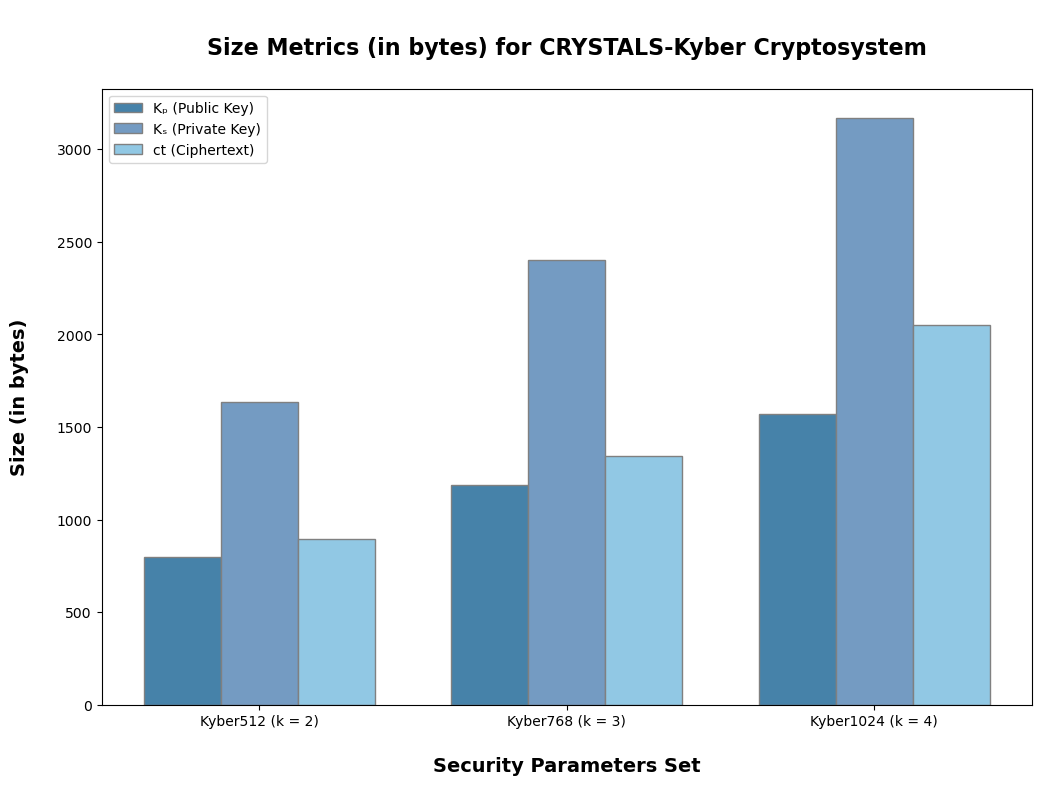

In [5]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Kyber's Cryptosystem.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_kyber_size_metrics = \
    {  "Kyber512": {"num_pub_key_bytes": 800,
                    "num_pub_key_bits": 6400,
                    "num_priv_key_bytes": 1632,
                    "num_priv_key_bits": 13056,
                    "num_ciphertext_bytes": 896,
                    "num_ciphertext_bits": 7168},
       "Kyber768": {"num_pub_key_bytes": 1184,
                    "num_pub_key_bits": 9472,
                    "num_priv_key_bytes": 2400,
                    "num_priv_key_bits": 19200,
                    "num_ciphertext_bytes": 1344,
                    "num_ciphertext_bits": 10752},
      "Kyber1024": {"num_pub_key_bytes": 1568,
                    "num_pub_key_bits": 12544,
                    "num_priv_key_bytes": 3168,
                    "num_priv_key_bits": 25344,
                    "num_ciphertext_bytes": 2048,
                    "num_ciphertext_bits": 16384} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of the asymmetric public keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
num_pub_keys_bytes = [ crystals_kyber_size_metrics["Kyber512"]["num_pub_key_bytes"],
                       crystals_kyber_size_metrics["Kyber768"]["num_pub_key_bytes"],
                       crystals_kyber_size_metrics["Kyber1024"]["num_pub_key_bytes"] ]

# Setting of the individual data for the size of the asymmetric private keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
num_priv_key_bytes = [ crystals_kyber_size_metrics["Kyber512"]["num_priv_key_bytes"],
                       crystals_kyber_size_metrics["Kyber768"]["num_priv_key_bytes"],
                       crystals_kyber_size_metrics["Kyber1024"]["num_priv_key_bytes"] ]

# Setting of the individual data for the size of the ciphertexts for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
num_ciphertext_bytes = [ crystals_kyber_size_metrics["Kyber512"]["num_ciphertext_bytes"],
                         crystals_kyber_size_metrics["Kyber768"]["num_ciphertext_bytes"],
                         crystals_kyber_size_metrics["Kyber1024"]["num_ciphertext_bytes"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.bar( bar_1, num_pub_keys_bytes,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bytes,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_ciphertext_bytes,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "ct (Ciphertext)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.title( "\nSize Metrics (in bytes) for CRYSTALS-Kyber Cryptosystem\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bytes)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Kyber512 (k = 2)", "Kyber768 (k = 3)", "Kyber1024 (k = 4)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.show()

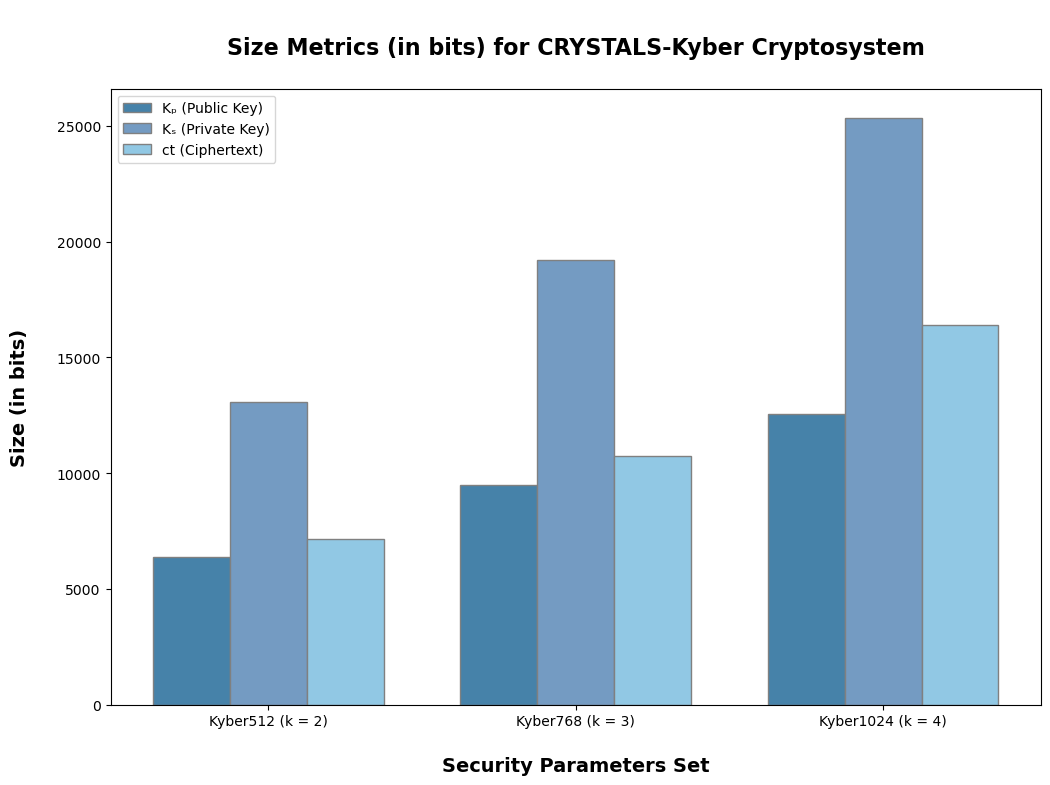

In [6]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Kyber's Cryptosystem.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_kyber_size_metrics = \
    {  "Kyber512": {"num_pub_key_bytes": 800,
                    "num_pub_key_bits": 6400,
                    "num_priv_key_bytes": 1632,
                    "num_priv_key_bits": 13056,
                    "num_ciphertext_bytes": 896,
                    "num_ciphertext_bits": 7168},
       "Kyber768": {"num_pub_key_bytes": 1184,
                    "num_pub_key_bits": 9472,
                    "num_priv_key_bytes": 2400,
                    "num_priv_key_bits": 19200,
                    "num_ciphertext_bytes": 1344,
                    "num_ciphertext_bits": 10752},
      "Kyber1024": {"num_pub_key_bytes": 1568,
                    "num_pub_key_bits": 12544,
                    "num_priv_key_bytes": 3168,
                    "num_priv_key_bits": 25344,
                    "num_ciphertext_bytes": 2048,
                    "num_ciphertext_bits": 16384} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of the asymmetric public keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
num_pub_keys_bits = [ crystals_kyber_size_metrics["Kyber512"]["num_pub_key_bits"],
                      crystals_kyber_size_metrics["Kyber768"]["num_pub_key_bits"],
                      crystals_kyber_size_metrics["Kyber1024"]["num_pub_key_bits"] ]

# Setting of the individual data for the size of the asymmetric private keys for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
num_priv_key_bits = [ crystals_kyber_size_metrics["Kyber512"]["num_priv_key_bits"],
                      crystals_kyber_size_metrics["Kyber768"]["num_priv_key_bits"],
                      crystals_kyber_size_metrics["Kyber1024"]["num_priv_key_bits"] ]

# Setting of the individual data for the size of the ciphertexts for each
# Security Parameter Set used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
num_ciphertext_bits = [ crystals_kyber_size_metrics["Kyber512"]["num_ciphertext_bits"],
                        crystals_kyber_size_metrics["Kyber768"]["num_ciphertext_bits"],
                        crystals_kyber_size_metrics["Kyber1024"]["num_ciphertext_bits"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.bar( bar_1, num_pub_keys_bits,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bits,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_ciphertext_bits,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "ct (Ciphertext)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.title( "\nSize Metrics (in bits) for CRYSTALS-Kyber Cryptosystem\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bits)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xticks( [ ( param_idx + bar_width ) for param_idx in range(3) ],
                [ "Kyber512 (k = 2)", "Kyber768 (k = 3)", "Kyber1024 (k = 4)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.show()

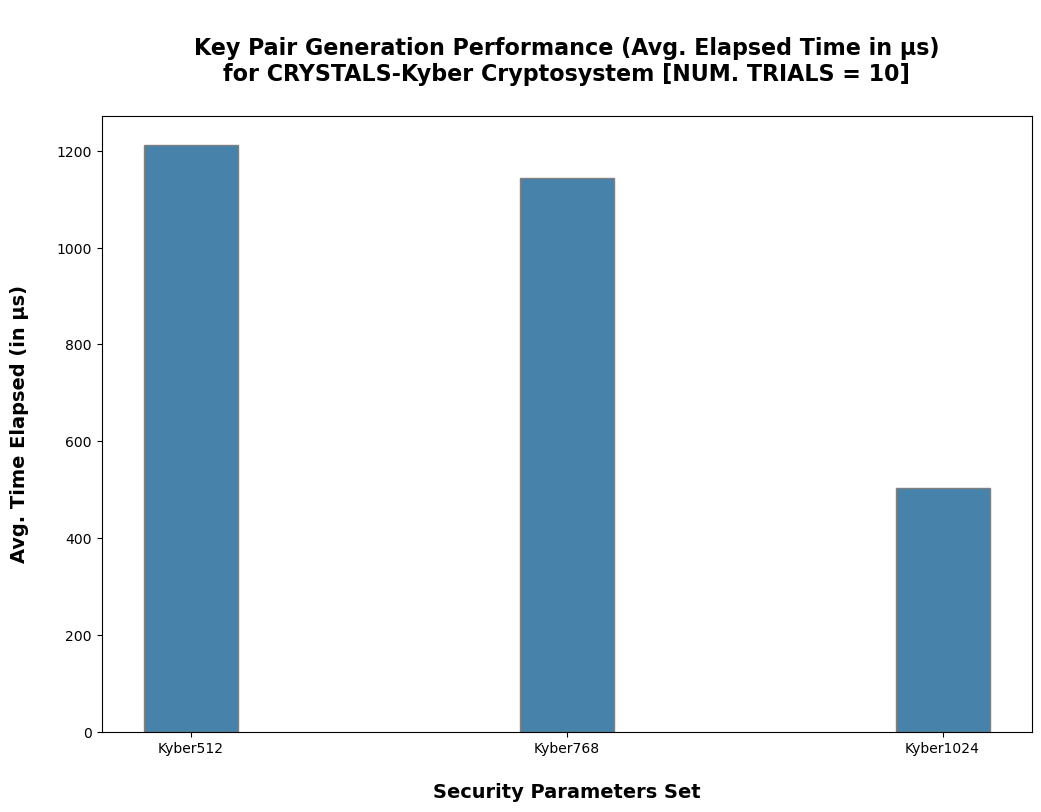

In [7]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Definition of the number of trials used to estimate
# the average times for all the key pair generation
# performance metrics of the CRYSTALS-Kyber's Cryptosystem.
NUM_TRIALS = 10


# Creation of a Python's nested dictionary for all
# the key pair generation performance metrics of
# the CRYSTALS-Kyber's Cryptosystem.
#
# NOTE (IMPORTANT):
# - Copy the values, in microseconds (μs), from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_kyber_key_pair_generation_performance_metrics = \
    {  "Kyber512": 1211.917,
       "Kyber768": 1142.841,
      "Kyber1024": 502.913 }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.bar( crystals_kyber_key_pair_generation_performance_metrics.keys(),
             crystals_kyber_key_pair_generation_performance_metrics.values(),
             color = "#4682A9", edgecolor = "grey",
             width = bar_width )

# Definition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
plot_title = "\nKey Pair Generation Performance (Avg. Elapsed Time in μs)\n"\
             "for CRYSTALS-Kyber Cryptosystem [NUM. TRIALS = {num_trials}]\n"\
             .format(num_trials = NUM_TRIALS)

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.title( plot_title, fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Avg. Time Elapsed (in μs)\n", fontweight = "bold", fontsize = 14 )

# Showing of the bar plots for each Security Parameter Set used by
# used by the CRYSTALS-Kyber's Cryptosystem, in terms of microseconds (μs).
py_plot.show()

***

### Demonstration for the IND-CCA2 KEM<br>using the CRYSTALS-Kyber Cryptosystem

In [8]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.SecretWithEncapsulation;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the use of
// Key Encapsulation Methods/Mechanisms (KEMs).
import org.bouncycastle.jcajce.SecretKeyWithEncapsulation;
import org.bouncycastle.jcajce.spec.KEMExtractSpec;
import org.bouncycastle.jcajce.spec.KEMGenerateSpec;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber
// Public-Key Cryptosystem's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.KyberParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Kyber Cryptosystem.
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberPublicKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKEMGenerator;
import org.bouncycastle.pqc.crypto.crystals.kyber.KyberKEMExtractor;


// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.InvalidAlgorithmParameterException;
import java.security.KeyFactory;
import java.security.NoSuchAlgorithmException;
import java.security.NoSuchProviderException;
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;
import java.security.spec.InvalidKeySpecException;
import java.security.spec.X509EncodedKeySpec;


import org.bouncycastle.util.Arrays;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of class of Public-Key (Asymmetric) Cryptosystem
// CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber),
// which is a (Classical) Post-Quantum Cryptosystem
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsKyberCryptosystem {
    
    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[]
        security_parameters_names = {
    
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        "Kyber512",
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        "Kyber768",
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        "Kyber1024"
    
    };

    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final String[] 
        security_parameters_names_and_descriptions = {
    
        // 1) Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-128).
        "=> Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 64 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 128 bits.\n\n   " +
        "             NOTE: The Kyber512 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).",
        
        // 2) Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-192).
        "=> Kyber768: Security Parameters Set with a factor of k = 3 ( k x n = 3 x 256 = 768 )\n   " +
        "             for the size of the lattice algebraic structure, which provides\n   " +
        "             a (post-quantum) security strength of 96 bits, designed for\n   " +
        "             the distribution of symmetric session keys of 192 bits.\n\n   " +
        "             NOTE: The Kyber768 Cryptosystem has a NIST (Classical)\n   " +
        "                   Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        //    NOTE: The Kyber512 has a NIST (Classical) Post-Quantum
        //          Security Level of 1 (≈ exhaustive search on AES-256).
        "=> Kyber1024: Security Parameters Set with a factor of k = 4 ( k x n = 4 x 256 = 1024 )\n   " +
        "              for the size of the lattice algebraic structure, which provides\n   " +
        "              a (post-quantum) security strength of 128 bits, designed for\n   " +
        "              the distribution of symmetric session keys of 256 bits.\n\n   " +
        "              NOTE: The Kyber1024 Cryptosystem has a NIST (Classical)\n   " +
        "                    Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public final KyberParameterSpec[] 
        security_parameters_specifications = {
        
        // 1) Security Parameters Set with a factor of 2 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 64 bits, designed for
        //    the distribution of symmetric session keys of 128 bits.
        KyberParameterSpec.kyber512,
        
        // 2) Security Parameters Set with a factor of 3 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits, designed for
        //    the distribution of symmetric session keys of 192 bits.
        KyberParameterSpec.kyber768,
        
        // 3) Security Parameters Set with a factor of 4 for
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits, designed for
        //    the distribution of symmetric session keys of 256 bits.
        KyberParameterSpec.kyber1024
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Kyber Public-Key Cryptosystem.
    
    // Definition of the parameter choice index for
    // the generation of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private short parameter_choice_index;
    
    // Definition of the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberParameters parameters;
    
    // Definition of the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the generation of
    // the instance of the Key Pair to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    // Definition of the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the generation of
    // the instance of the KEM (Key Encapsulation Method/Mechanism)
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecureRandom secure_pseudo_random_generator_kem_generation;
    
    // Definition of the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism)
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKEMGenerator key_encapsulation_method_generation;
    
    // Definition of the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism)
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    private KyberKEMExtractor key_encapsulation_method_extraction;
    
    // Definition of the payload of the public key
    // shared by the other party and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of a public key of the cryptosystem.
    private KyberPublicKeyParameters public_key_shared_other_party_payload;
    
    // Definition of the symmetric secret key encapsulated
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    private SecretWithEncapsulation symmetric_secret_key_encapsulated;
    
    // Definition of the encoding of the symmetric
    // secret key exchanged using the CRYSTALS-Kyber
    // Public-Key Cryptosystem, as a byte array.
    private byte[] symmetric_secret_key_exchanged_encoded_bytes;
    
    
    // Constructor of the class of the CRYSTALS-Kyber Public-Key Cryptosystem,
    // and the initialization of the initial required parameters.
    //    Parameters:
    //    @param parameter_choice_index: The parameter choice index for
    //                                   the generation of the pair of
    //                                   asymmetric keys to be used.
    public CrystalsKyberCryptosystem( short parameter_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_choice_index = parameter_choice_index;
        
        // Initialization of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.asymmetric_key_pair = null;
    
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the KEM
        // (Key Encapsulation Method/Mechanism) to be used
        // by the CRYSTALS-Kyber Public-Key Cryptosystem.
        this.secure_pseudo_random_generator_kem_generation = 
            new SecureRandom();
        
        // Initialization of the generation the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_encapsulation_method_generation = null;
        
        // Initialization of the extraction the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
        this.key_encapsulation_method_extraction = null;
        
        // Initialization of the payload of the public key
        // shared by the other party and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of a public key of
        // the cryptosystem, as a null object.
        this.public_key_shared_other_party_payload = null;
    
        // Initialization of the symmetric secret key
        // encapsulated using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a null object.
        this.symmetric_secret_key_encapsulated = null;
    
        // Initialization of the the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a null object.
        this.symmetric_secret_key_exchanged_encoded_bytes = null;
        
    }
    
    
    // Methods of the class of the Public-Key (Asymmetric) Cryptosystem
    // CRYSTALS-Kyber (CRYptographic SuiTe for Algebraic LatticeS - Kyber).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_choice_index() {
        
        // Return of the parameter choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names[ this.parameter_choice_index ];
        
    }
    

    // Method to obtain the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    public String get_security_parameters_name_and_description() {
        
        // Return of the string with the name and description of
        // the CRYSTALS-Kyber Public-Key Cryptosystem's
        // Security Parameters defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Key Encapsulation Method/Mechanism (KEM).
        return security_parameters_names_and_descriptions[ this.parameter_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    public KyberParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Kyber Public-Key
        // Cryptosystem's Security Parameters Specifications.
        return security_parameters_specifications[ this.parameter_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber512' Security Parameter Set.
        if( this.parameter_choice_index == 0 ) {
            
            // Setting the 'Kyber512' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber512;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber768' Security Parameter Set.
        else if( this.parameter_choice_index == 1 ) {
            
            // Setting the 'Kyber768' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber768;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // corresponds to the 'Kyber1024' Security Parameter Set.
        else if( this.parameter_choice_index == 2 ) {
            
            // Setting the 'Kyber1024' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.parameters = KyberParameters.kyber1024;
            
        }
        
    }
    

    // Method to obtain the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberParameters get_parameters() {
        
        // Return of the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.parameters;
        
    }


    // Method to obtain the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bytes_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_session_key_bits_size() / 
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bytes,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }
    
    
    // Method to obtain the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_session_key_bits_size() {
        
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not null (i.e., already initialized).
        if( this.get_parameters() != null ) {
            
            // Return of the size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_parameters().getSessionKeySize();
            
        }
        // If the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is null (i.e., not initialized yet).
        else {
            
            // Return of an invalid size of the symmetric session key, in terms of bits,
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;

        }
        
    }


    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            this.key_generation_parameters = 
                new KyberKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        KyberKeyPairGenerator crystals_kyber_key_pair_generator = 
            new KyberKeyPairGenerator();

        // Initialization of the generator of the pair of asymmetric keys
        // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // using the Security Parameters set defined before.
        crystals_kyber_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.asymmetric_key_pair = 
            crystals_kyber_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the target solution t
    // (i.e. the target solution vector for
    // the mathematical equation A x s + e = t),
    // encoded (and compressed) in bytes,
    // representing a lattice-based problem in
    // the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_target_solution_t_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getT();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from will be expanded and
    // obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes,
    // representing a lattice-based problem in the form of a
    // MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
        
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_public_key_parameters().getRho();
            
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes,
            // representing a lattice-based problem in the form of a
            // MLWE (Module-Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( KyberPublicKeyParameters ) this.get_public_key() ).getEncoded();
            

            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    

    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated Security Parameters.
    public KyberPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build public key payload.

            // Retrieval of the target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 target_solution_t,
                                                 pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem,
    // using the associated encoding in an array of bytes.
    public KyberPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {

            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of the cryptosystem.
            return new KyberPublicKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                 this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of public key of
            // the cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of public key of the cryptosystem.
    public KyberPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of public key of the cryptosystem.
        return this.get_public_key_payload_from_parameters();
        
    }
    

    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( ( KyberPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the random secret s
    // (i.e. the secret vector in the lattice
    // algebraic structure), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_s_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getS();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the hashed public key,
    // denoted as H(pub_key), encoded in bytes,
    // with the IND-CPA (INDistinguishability
    // under Chosen Plaintext Attack) property,
    // retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_hashed_public_key_h_pub_k_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getHPK();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid hashed public key,
            // denoted as H(pub_key), encoded in bytes,
            // with the IND-CPA (INDistinguishability
            // under Chosen Plaintext Attack) property,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    

    // Method to obtain the random secret nonce z
    // (i.e., to avoid practical fault attacks),
    // encoded in bytes, with the IND-CPA
    // (INDistinguishability under Chosen Plaintext
    // Attack) property for the Asymmetric Encryption and
    // with the (INDistinguishability under Chosen Ciphertext
    // Attack) property for the KEM (Key Encapsulation
    // Method/Mechanism), retrieved from the private key
    // parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public byte[] get_random_secret_nonce_z_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_private_key_parameters().getNonce();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret nonce z
            // (i.e., to avoid practical fault attacks),
            // encoded in bytes, with the IND-CPA
            // (INDistinguishability under Chosen Plaintext
            // Attack) property for the Asymmetric Encryption and
            // with the (INDistinguishability under Chosen Ciphertext
            // Attack) property for the KEM (Key Encapsulation
            // Method/Mechanism), retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( KyberPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // is defined by a null object.
        else {
            
            // Return of an invalid private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // being encoded as an array of bytes,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as being encoded as an array of bits.
    public int get_private_key_size_bits() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is not defined as a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bits.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from the pair of
        // asymmetric keys to be used by the CRYSTALS-Kyber
        // Public-Key Cryptosystem, being encoded as
        // an array of bytes, is defined as a null object.
        else {
            
            // Return of an invalid size of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of private key of the cryptosystem.
    public KyberPrivateKeyParameters get_private_key_payload() {
        
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are not defined as a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem.
            KyberParameters crystals_kyber_cryptosystem_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // which will be used to build private key payload.

            // Retrieval of the random secret s
            // (i.e. the secret vector in the lattice
            // algebraic structure), encoded in bytes.
            byte[] random_secret_s = 
                this.get_random_secret_s_from_private_key_parameters();

            // Retrieval of the hashed public key,
            // denoted as H(pub_key), encoded in bytes.
            byte[] hashed_public_key_h_pub_k = 
                this.get_hashed_public_key_h_pub_k_from_private_key_parameters();

            // Retrieval of the random secret
            // nonce z (i.e., to avoid practical
            // fault attacks), encoded in bytes.
            byte[] random_secret_nonce_z = 
                this.get_random_secret_nonce_z_from_private_key_parameters();


            // Retrieval of the target solution t
            // (i.e. the target solution vector for
            // the mathematical equation A x s + e = t),
            // encoded (and compressed) in bytes.
            byte[] target_solution_t = 
                this.get_target_solution_t_from_public_key_parameters();

            // Retrieval of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from will be expanded and
            // obtained the uniformly-random matrix A consisting of
            // polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s + e = t), encoded in bytes.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();


            // Return of the payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of the cryptosystem.
            return new KyberPrivateKeyParameters( crystals_kyber_cryptosystem_parameters,
                                                  random_secret_s,
                                                  hashed_public_key_h_pub_k,
                                                  random_secret_nonce_z,
                                                  target_solution_t,
                                                  pseudo_random_seed_rho );
        
        }
        // If the key generation parameters to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem,
        // are defined as a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of private key of
            // the cryptosystem, as a null object.
            return null;
            
        }
            
    }
    
    
    // Method to receive and set the payload of
    // the public key shared by the other party and
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of a public key of the cryptosystem. 
    public void receive_and_set_public_key_shared_other_party_payload
        ( byte[] public_key_shared_other_party_encoding_bytes ) {
        
        // Retrieval of the cipher parameters from
        // the key generation parameters to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem.
        KyberParameters crystals_kyber_cryptosystem_parameters = 
            this.get_key_generation_parameters().getParameters();

        // Initialization of the payload of the public key
        // shared by the other party and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of a public key of the cryptosystem. 
        this.public_key_shared_other_party_payload = 
            new KyberPublicKeyParameters
                ( crystals_kyber_cryptosystem_parameters,
                  public_key_shared_other_party_encoding_bytes );
        
    }
    
    
    // Method to obtain the payload of the public key
    // shared by the other party and to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem,
    // as a proper object of a public key of the cryptosystem. 
    public KyberPublicKeyParameters get_public_key_shared_other_party_payload() {
        
        // Return of the payload of the public key
        // shared by the other party and to be used by
        // the CRYSTALS-Kyber Public-Key Cryptosystem,
        // as a proper object of a public key of the cryptosystem.
        return this.public_key_shared_other_party_payload;
        
    }
    
    
    // Method to obtain the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the KEM (Key Encapsulation Method/Mechanism) generation to
    // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecureRandom get_secure_pseudo_random_generator_kem_generation() {
            
        // Return of the Java's Secure Random to
        // act as Pseudo-Random Generator (PRG) for
        // the KEM (Key Encapsulation Method/Mechanism) generation to
        // be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
        return this.secure_pseudo_random_generator_kem_generation;
    
    }
    
    
    // Method to initialize the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public void initialize_key_encapsulation_method_generation() {
       
        // Initialization of the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.key_encapsulation_method_generation = 
            new KyberKEMGenerator
                ( this.secure_pseudo_random_generator_kem_generation );
        
    }
        
    
    // Method to obtain the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKEMGenerator get_key_encapsulation_method_generation() {
       
        // Return of the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        return this.key_encapsulation_method_generation;
        
    }
    
    
    // Method to perform the encapsulation of the symmetric
    // secret key to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void encapsulate_symmetric_secret_key() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {

            // If the payload of the public key
            // shared by the other party and to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of a public key of
            // the cryptosystem is not defined by a null object.
            if( this.get_public_key_shared_other_party_payload() != null ) {
            
                // Initialization of the encapsulation of the symmetric
                // secret key to be distributed and shared to the other party,
                // using the CRYSTALS-Kyber Public-Key Cryptosystem.
                this.symmetric_secret_key_encapsulated = 
                        this.get_key_encapsulation_method_generation()
                                .generateEncapsulated
                                ( this.get_public_key_shared_other_party_payload() );
                
                // Initialization of the the encoding of the symmetric
                // secret key exchanged using the CRYSTALS-Kyber
                // Public-Key Cryptosystem, with the respective secret.
                this.initialize_symmetric_secret_key_exchanged_encoded_bytes
                        ( this.get_symmetric_secret_key_encapsulated().getSecret() );
                
            }
            
        }
        
    }
    
    
    // Method to obtain the encapsulation of the symmetric
    // secret key to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public SecretWithEncapsulation get_symmetric_secret_key_encapsulated() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {

            // If the payload of the public key
            // shared by the other party and to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of a public key of
            // the cryptosystem is not defined by a null object.
            if( this.get_public_key_shared_other_party_payload() != null ) {
            
                // Return of the encapsulation of the symmetric
                // secret key to be distributed and shared to the other party,
                // using the CRYSTALS-Kyber Public-Key Cryptosystem.
                return this.symmetric_secret_key_encapsulated;
                
            }
            // If the payload of the public key
            // shared by the other party and to be used by
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a proper object of a public key of
            // the cryptosystem is defined by a null object.
            else {

                // Return of an invalid encapsulation of
                // the symmetric secret key to be distributed
                // and shared to the other party, using
                // the CRYSTALS-Kyber Public-Key Cryptosystem,
                // as a null object.
                return null;

            }
            
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is defined by a null object.
        else {
            
            // Return of an invalid encapsulation of
            // the symmetric secret key to be distributed
            // and shared to the other party, using
            // the CRYSTALS-Kyber Public-Key Cryptosystem,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the symmetric secret key,
    // as a byte array, extracted from the encapsulation of
    // the symmetric secret key to be distributed and shared to
    // the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public byte[] get_symmetric_secret_key_bytes_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the symmetric secret key, as a byte array,
            // extracted from the encapsulation of the symmetric
            // secret key to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return this.get_symmetric_secret_key_encapsulated().getSecret();
            
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of the symmetric secret key, as a byte array,
            // extracted from the encapsulation of the symmetric
            // secret key to be distributed and shared to
            // the other party, using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key
    // to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_symmetric_secret_key_size_bytes_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the size, in terms of bytes,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return this.get_symmetric_secret_key_bytes_from_encapsulation().length;
        
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
            
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key
    // to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public int get_symmetric_secret_key_size_bits_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the size, in terms of bits,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return ( this.get_symmetric_secret_key_size_bytes_from_encapsulation() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key
            // to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return 0;
            
        }
            
    }
    
    
    // Method to obtain the encapsulated symmetric secret key,
    // as a byte array, extracted from the encapsulation of
    // the symmetric secret key to be distributed and shared to
    // the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem. 
    public byte[] get_encapsulated_symmetric_secret_key_bytes_from_encapsulation() {
        
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_generation() != null ) {
        
            // Return of the encapsulated symmetric secret key,
            // as a byte array, extracted from the encapsulation of
            // the symmetric secret key to be distributed and shared to
            // the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.  
            return this.get_symmetric_secret_key_encapsulated()
                       .getEncapsulation();
            
        }
        // If the generation of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is defined by a null object.
        else {
            
            // Return of the encapsulated symmetric secret key,
            // as a byte array, extracted from the encapsulation of
            // the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the encapsulated symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key to be distributed and
    // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_encapsulated_symmetric_secret_key_size_bytes_from_encapsulation() {
        
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is not defined as a null object.
        if( this.get_encapsulated_symmetric_secret_key_bytes_from_encapsulation() != null ) {
        
            // Return of the size, in terms of bytes,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_encapsulated_symmetric_secret_key_bytes_from_encapsulation().length;

        }
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the encapsulated symmetric secret key, extracted from
    // the encapsulation of the symmetric secret key to be distributed and
    // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_encapsulated_symmetric_secret_key_size_bits_from_encapsulation() {
        
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is not defined as a null object.
        if( this.get_encapsulated_symmetric_secret_key_bytes_from_encapsulation() != null ) {
        
            // Return of the size, in terms of bits,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_encapsulated_symmetric_secret_key_size_bytes_from_encapsulation() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the encapsulated symmetric secret key,
        // as a byte array, extracted from the encapsulation of
        // the symmetric secret key to be distributed and shared
        // to the other party, using the CRYSTALS-Kyber Public-Key
        // Cryptosystem, is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the encapsulated symmetric secret key, extracted from
            // the encapsulation of the symmetric secret key to be distributed and
            // shared to the other party, using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
        
    }
    
    
    // Method to initialize the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void initialize_key_encapsulation_method_extraction() {
        
        // Initialization of the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
        this.key_encapsulation_method_extraction = 
            new KyberKEMExtractor( this.get_private_key_parameters() );
        
    }
    
    
    // Method to obtain the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    public KyberKEMExtractor get_key_encapsulation_method_extraction() {
       
        // If the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is not defined as a null object.
        if( this.key_encapsulation_method_extraction != null ) {
        
            // Return of the extraction of the instance of
            // the KEM (Key Encapsulation Method/Mechanism) to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem. 
            return this.key_encapsulation_method_extraction;

        }
        // If the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism) to be
        // used by the CRYSTALS-Kyber Public-Key Cryptosystem
        // is defined as a null object.
        else {
            
            // Return of the extraction of the instance of
            // the KEM (Key Encapsulation Method/Mechanism) to be
            // used by the CRYSTALS-Kyber Public-Key Cryptosystem.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the symmetric secret key, as a byte array,
    // extracted from the decapsulation of the encapsulated symmetric
    // secret key to be distributed and shared to the other party,
    // using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public void decapsulate_encapsulated_symmetric_secret_key_bytes
        ( byte[] encapsulated_symmetric_secret_key_bytes_from_encapsulation_other_party ) {
        
        // If the extraction of the instance of
        // the KEM (Key Encapsulation Method/Mechanism)
        // to be used by the CRYSTALS-Kyber Public-Key
        // Cryptosystem is not defined by a null object.
        if( this.get_key_encapsulation_method_extraction() != null ) {
            
            // Initialization of the encapsulation of the symmetric
            // secret key to be distributed and shared to the other party,
            // using the CRYSTALS-Kyber Public-Key Cryptosystem, as a null object.
            this.symmetric_secret_key_encapsulated = null;
            
            // Initialization of the the encoding of the symmetric
            // secret key exchanged using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, with the respective secret.
            this.initialize_symmetric_secret_key_exchanged_encoded_bytes
                    (  this.get_key_encapsulation_method_extraction().extractSecret
                       ( encapsulated_symmetric_secret_key_bytes_from_encapsulation_other_party )
                    );
            
        }
        
    }
    
    
    // Method to initialize the encoding of the symmetric
    // secret key exchanged using the CRYSTALS-Kyber
    // Public-Key Cryptosystem, as a byte array.
    public void initialize_symmetric_secret_key_exchanged_encoded_bytes
        ( byte[] symmetric_secret_key_exchanged_encoded_bytes ) {
     
        // Initialization of the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array.
        this.symmetric_secret_key_exchanged_encoded_bytes = 
            symmetric_secret_key_exchanged_encoded_bytes; 
        
    }
    
    
    // Method to obtain the encoding of the symmetric
    // secret key exchanged using the CRYSTALS-Kyber
    // Public-Key Cryptosystem, as a byte array.
    public byte[] get_symmetric_secret_key_exchanged_encoded_bytes() {
        
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is not defined as a null object.
        if( this.symmetric_secret_key_exchanged_encoded_bytes != null ) {
            
            // Return of the encoding of the symmetric
            // secret key exchanged using the CRYSTALS-Kyber
            // Public-Key Cryptosystem, as a byte array.
            return this.symmetric_secret_key_exchanged_encoded_bytes;

        }
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is defined as a null object.
        else {
            
            // Return of an invalid of the encoding of the symmetric
            // secret key exchanged usingthe CRYSTALS-Kyber Public-Key
            // Cryptosystem, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the encoding of the symmetric secret key
    // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_symmetric_secret_key_exchanged_encoded_size_bytes() {
        
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is not defined as a null object.
        if( this.symmetric_secret_key_exchanged_encoded_bytes != null ) {
    
            // Return of the size, in terms of bytes,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return this.get_symmetric_secret_key_exchanged_encoded_bytes().length;
            
        }
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bytes,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
    
    }
 
    
    // Method to obtain the size, in terms of bits,
    // of the encoding of the symmetric secret key
    // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
    public int get_symmetric_secret_key_exchanged_encoded_size_bits() {
        
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is not defined as a null object.
        if( this.symmetric_secret_key_exchanged_encoded_bytes != null ) {
    
            // Return of the size, in terms of bits,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return ( this.get_symmetric_secret_key_exchanged_encoded_size_bytes() *
                     BYTE_SIZE_IN_BITS );
            
        }
        // If the encoding of the symmetric
        // secret key exchanged using the CRYSTALS-Kyber
        // Public-Key Cryptosystem, as a byte array,
        // is defined as a null object.
        else {
            
            // Return of an invalid size, in terms of bits,
            // of the encoding of the symmetric secret key
            // exchanged using the CRYSTALS-Kyber Public-Key Cryptosystem.
            return 0;
            
        }
    
    }
    
}


// Setting of the number of parameter choices for
// the generation of the asymmetric key pair to be
// used internally by the CRYSTALS-Kyber Public-Key Cryptosystem.
final short NUM_PARAMETERS_SET_CHOICES = 3;


// For each configuration of the CRYSTALS-Kyber Public-Key Cryptosystem,
// according to the associated parameters set choice (k = 2,3,4).
for( short param_set_choice_idx = 0;
     param_set_choice_idx < NUM_PARAMETERS_SET_CHOICES; 
     param_set_choice_idx++ ) {

    // Creation of a CRYSTALS-Kyber Public-Key Cryptosystem for
    // the sender party/entity, using a set of security parameters pre-defined.
    CrystalsKyberCryptosystem crystals_kyber_cryptosystem_sender = 
        new CrystalsKyberCryptosystem( param_set_choice_idx );

    // Creation of a CRYSTALS-Kyber Public-Key Cryptosystem for
    // the receiver party/entity, using a set of security parameters pre-defined.
    CrystalsKyberCryptosystem crystals_kyber_cryptosystem_receiver = 
        new CrystalsKyberCryptosystem( param_set_choice_idx );


    // Retrieval of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulation Method/Mechanism (KEM).
    String crystals_kyber_security_parameters_name_and_description = 
        crystals_kyber_cryptosystem_sender.get_security_parameters_name_and_description();


    // Retrieval of the CRYSTALS-Kyber Public-Key
    // Cryptosystem's Security Parameters Specifications.
    KyberParameterSpec crystals_kyber_security_parameters_specification =
        crystals_kyber_cryptosystem_sender.get_security_parameters_specifications();

    
    // Print of the relevant information for the use of
    // the IND-CCA2 CRYSTALS-Kyber KEM Public-Key Cryptosystem.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of a possible
    // execution of the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println(" -------------- EXAMPLE OF AN EXECUTION OF THE IND-CCA2 CRYSTALS-KYBER KEM " + 
                                       "PUBLIC-KEY CRYPTOSYSTEM -------------- ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");
    
    
    // Print of the string with the name and
    // description of the CRYSTALS-Kyber Public-Key Cryptosystem's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Key Encapsulion Method/Mechanism (KEM).
    System.out.println( "  NAME AND BASIC DESCRIPTION OF THE SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_kyber_security_parameters_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_parameters();


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_parameters();


    // Retrieval of the size of the symmetric session key, in terms of bytes,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bytes_size = 
        crystals_kyber_cryptosystem_sender.get_session_key_bytes_size();

    // Retrieval of the size of the symmetric session key, in terms of bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    int crystals_kyber_cryptosystem_session_key_bits_size = 
        crystals_kyber_cryptosystem_sender.get_session_key_bits_size();

    // Print of the string with the size of
    // the Symmetric Session Key, in terms of bytes and bits,
    // to be used by the CRYSTALS-Kyber Public-Key Cryptosystem.
    System.out.println( "     * Size of the Symmetric Session Secret Key to be generated and exchanged:\n" +
                        "       - " + crystals_kyber_cryptosystem_session_key_bytes_size + " bytes | " 
                                    + crystals_kyber_cryptosystem_session_key_bits_size + " bits" );


    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Initialization of the key generation parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_key_generation_parameters();
    
    // Initialization of the key generation parameters to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_key_generation_parameters();
    

    // Initialization of the generation of the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_asymmetric_key_pair_generation();
    
    // Initialization of the generation of the pair of asymmetric keys to be used by
    // the CRYSTALS-Kyber Public-Key Cryptosystem for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_asymmetric_key_pair_generation();
    
    
    // Retrieve the asymmetric public key to be used by the CRYSTALS-Kyber
    // Public-Key Cryptosystem for the sender party/entity.
    byte[] public_key_encoded_bytes_sender = 
        crystals_kyber_cryptosystem_sender.get_public_key_encoded_bytes();
    
    
    //
    if( public_key_encoded_bytes_sender == null ) {
    
        //
        System.err.println("The sender party should already " +
                           "possess its asymmetric public key...");
        
        //
        System.exit(1);
    
    }
    
    
    // Retrieve the asymmetric public key to be used by the CRYSTALS-Kyber
    // Public-Key Cryptosystem for the receiver party/entity.
    byte[] public_key_encoded_bytes_receiver = 
        crystals_kyber_cryptosystem_receiver.get_public_key_encoded_bytes();
    
    
    //
    if( public_key_encoded_bytes_receiver == null ) {
    
        //
        System.err.println("The receiver party should already " +
                           "possess its asymmetric public key...");
        
        //
        System.exit(1);
    
    }
  
  
    System.out.println("\n");
    
    // The exchange of a copy of both public keys occurs
    // through a classical communication channel...
  
    System.out.println("The asymmetric public keys are being mutually exchanged...");
    System.out.println("\n");
  
  
    //
    crystals_kyber_cryptosystem_sender
        .receive_and_set_public_key_shared_other_party_payload(public_key_encoded_bytes_receiver);
    
    
    // 
    if( !Arrays.areEqual( crystals_kyber_cryptosystem_sender
                          .get_public_key_shared_other_party_payload().getEncoded(),
                          public_key_encoded_bytes_receiver ) ) {
    
        // 
        System.err.println("The sender party must possess the public key " +
                           "from the receiver party...");
        
        //
        System.exit(1);
    
    }
      
    
    //
    crystals_kyber_cryptosystem_receiver
        .receive_and_set_public_key_shared_other_party_payload(public_key_encoded_bytes_sender);
    
    
    // 
    if( !Arrays.areEqual( crystals_kyber_cryptosystem_receiver
                          .get_public_key_shared_other_party_payload().getEncoded(),
                          public_key_encoded_bytes_sender ) ) {
    
        // 
        System.err.println("The receiver party must possess the public key " +
                           "from the sender party...");
        
        //
        System.exit(1);
    
    }
    

    // Initialization of the generation of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem
    // for the sender party/entity.
    crystals_kyber_cryptosystem_sender.initialize_key_encapsulation_method_generation();

    // Initialization of the extraction of the instance of
    // the KEM (Key Encapsulation Method/Mechanism) to be
    // used by the CRYSTALS-Kyber Public-Key Cryptosystem
    // for the receiver party/entity.
    crystals_kyber_cryptosystem_receiver.initialize_key_encapsulation_method_extraction();
    
    
    //
    crystals_kyber_cryptosystem_sender.encapsulate_symmetric_secret_key();
    
    //
    byte[] symmetric_secret_key_exchanged_encoded_bytes_sender = 
            crystals_kyber_cryptosystem_sender
                    .get_symmetric_secret_key_exchanged_encoded_bytes();
    
    
    // 
    if( symmetric_secret_key_exchanged_encoded_bytes_sender == null ) {
    
        //
        System.err.println("The sender party should already possess its\n" +
                           "symmetric secret key successfully generated...");
        
        //
        System.exit(1);
    
    }
    
    
    //
    byte[] symmetric_secret_key_bytes_from_encapsulation_sender = 
            crystals_kyber_cryptosystem_sender
                    .get_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( symmetric_secret_key_bytes_from_encapsulation_sender == null ) {
    
        //
        System.err.println("The sender party should be capable of extract its\n" +
                           "symmetric secret key from the encapsulated symmetric secret key...");
        
        //
        System.exit(1);
    
    }
    
    
    //
    byte[] encapsulated_symmetric_secret_key_bytes_from_encapsulation_sender = 
            crystals_kyber_cryptosystem_sender
                    .get_encapsulated_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( encapsulated_symmetric_secret_key_bytes_from_encapsulation_sender == null ) {
    
        //
        System.err.println("The sender party should already possess its\n" +
                           "encapsulated symmetric secret key successfully generated...");
        
        //
        System.exit(1);
    
    }
    
    
    System.out.println("The sender party encapsulated the symmetric secret key successfully...");
    System.out.println("\n");
    
    
    
    System.out.println("The encapsulated symmetric secret key is being exchanged\n" +
                       "from the sender party to the receiver party...");
    System.out.println("\n");
    
    
    crystals_kyber_cryptosystem_receiver.decapsulate_encapsulated_symmetric_secret_key_bytes
        ( encapsulated_symmetric_secret_key_bytes_from_encapsulation_sender );
   
   
    //
    byte[] encapsulated_symmetric_secret_key_bytes_from_encapsulation_receiver = 
            crystals_kyber_cryptosystem_receiver
                    .get_encapsulated_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( encapsulated_symmetric_secret_key_bytes_from_encapsulation_receiver != null ) {
    
        //
        System.err.println("The receiver party should not possess its\n" +
                           "encapsulated symmetric secret key successfully\n" +
                           "since it will be directly extracted...");
        
        //
        System.exit(1);
    
    }
   
   
    //
    byte[] symmetric_secret_key_bytes_from_encapsulation_receiver = 
            crystals_kyber_cryptosystem_receiver
                    .get_symmetric_secret_key_bytes_from_encapsulation();
    
    
    // 
    if( symmetric_secret_key_bytes_from_encapsulation_receiver != null ) {
    
        //
        System.err.println("The receiver party should not be capable of extract its\n" +
                           "symmetric secret key from the already decapsulated symmetric secret key...");
        
        //
        System.exit(1);
    
    }
    
    
    //
    byte[] symmetric_secret_key_exchanged_encoded_bytes_receiver = 
            crystals_kyber_cryptosystem_receiver.get_symmetric_secret_key_exchanged_encoded_bytes();
    
    
    // 
    if( symmetric_secret_key_exchanged_encoded_bytes_receiver == null ) {
    
        //
        System.err.println("The receiver party should already possess its\n" +
                           "symmetric secret key successfully extracted...");
        
        //
        System.exit(1);
    
    }
    
    
    System.out.println("The receiver party decapsulated the symmetric secret key successfully...");
    System.out.println("\n");
    
    
    //
    if( !Arrays.areEqual( symmetric_secret_key_exchanged_encoded_bytes_sender,
                          symmetric_secret_key_exchanged_encoded_bytes_receiver ) ) {
    
        //
        System.err.println("The sender and the receiver must possess the same bytes " +
                           "for the exchanged symmetric secret key...");
        
        //
        System.exit(1);
    
    }
    
    
}



 -------------- EXAMPLE OF AN EXECUTION OF THE IND-CCA2 CRYSTALS-KYBER KEM PUBLIC-KEY CRYPTOSYSTEM -------------- 


  NAME AND BASIC DESCRIPTION OF THE SECURITY PARAMETERS ADOPTED:

   => Kyber512: Security Parameters Set with a factor of k = 2 ( k x n = 2 x 256 = 512 )
                for the size of the lattice algebraic structure, which provides
                a (post-quantum) security strength of 64 bits, designed for
                the distribution of symmetric session keys of 128 bits.

                NOTE: The Kyber512 Cryptosystem has a NIST (Classical)
                      Post-Quantum Security Level of 1 (≈ exhaustive search on AES-128).

     * Size of the Symmetric Session Secret Key to be generated and exchanged:
       - 16 bytes | 128 bits



The asymmetric public keys are being mutually exchanged...


The sender party encapsulated the symmetric secret key successfully...


The encapsulated symmetric secret key is being exchanged
from the sender party to the recei

null

***

## Conclusion
***

***In development...***

***

## References
***

***In development...***

***